# Whole data evaluation 

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
#import scipy as sp
from scipy.stats import *
import scipy.special as sp
from scipy.interpolate import*
from scipy import integrate
from ipywidgets import interact, interactive
from ipywidgets import widgets
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib . font_manager as font_manager
from matplotlib import container
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import numpy.polynomial.polynomial as poly
from scipy import optimize
import pandas as pd
#pd.set_option("html",False)
pd.set_option("max_columns",30)
pd.set_option("max_rows",90000)
#import mpld3  ##helps to make zoom in and zoomout 
#mpld3.enable_notebook()
#plt.style.use('bmh')
#from mpld3 import plugins
#from mpld3.utils import get_id
import collections
import seaborn as sns
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from uncertainties import ufloat

In [2]:
Photo_summary=pd.read_excel("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Summary_photosynthesis_Final .xlsx"
                        ,sheet_name=0)

In [3]:
Photo_summary

,d13C_in,Unnamed: 1,d17O_in,Unnamed: 3,d18O_in,Unnamed: 5,D17O_in,Unnamed: 7,d13C_out,Unnamed: 9,d17O_out,Unnamed: 11,d18O_out,Unnamed: 13,D17O_out,...,Unnamed: 23,Area,Pressu,Temp,PFD,CO2_i,CO2_o,w_i,w_o,Airflow,Plant,Enrich,err,E18,E17
EXP2,-10.219,0.006,15.789000,0.030000,30.564,0.021,-0.227,0.017,-7.087000,0.007,19.566,0.0350,37.985,0.039,-0.307,...,NaN,37.30,100.50,21.900,1201,500.20,405.20,1.970,18.040,1.31,S,N,0.023345,0.044294,0.046098
EXP3,-10.232,0.006,15.763219,0.022888,30.485,0.012,-0.215,0.017,-6.926000,0.055,19.356,0.0970,37.571,0.133,-0.303,...,NaN,32.20,99.50,22.500,1190,503.40,401.90,4.510,18.015,0.96,S,N,0.031906,0.133540,0.099664
EXP4,-10.232,0.006,15.763219,0.022888,30.485,0.012,-0.215,0.017,-6.401000,0.029,21.166,0.0170,41.122,0.035,-0.333,...,NaN,30.60,99.50,21.400,292,500.30,406.70,1.800,18.980,0.58,S,N,0.017029,0.037000,0.028511
EXP5,-11.130,0.008,17.081000,0.017000,31.797,0.029,0.409,0.006,-7.435000,0.005,21.177,0.0200,40.280,0.072,0.052,...,NaN,32.10,100.20,21.800,1182,501.70,402.50,1.580,16.900,1.17,S,E1,0.011662,0.077621,0.026249
EXP6,-11.130,0.008,17.081000,0.017000,31.797,0.029,0.409,0.006,-6.817667,0.005,22.682,0.0390,43.343,0.083,-0.059,...,NaN,27.10,101.20,21.200,298,502.70,404.10,1.640,18.990,0.52,S,E1,0.007810,0.087920,0.042544
EXP3_NL,-10.232,0.006,15.763000,0.023000,30.485,0.012,-0.215,0.017,-6.572000,0.015,19.652,0.0000,38.138,0.040,-0.300,...,0.2380,31.00,100.90,21.800,299,498.50,398.20,9.090,19.710,0.49,S,N,0.027019,0.041761,0.023000
EXP3_NH,-10.232,0.006,15.763000,0.023000,30.485,0.012,-0.215,0.017,-6.691667,0.017,19.380,0.0040,37.586,0.023,-0.293,...,0.1250,29.30,101.05,23.100,1193,495.40,402.80,7.170,21.030,0.99,S,N,0.017117,0.025942,0.023345
EXP1_EL_1,-11.130,0.008,17.081000,0.017000,31.797,0.029,0.409,0.006,-6.464000,0.008,22.900,0.0180,43.870,0.035,-0.028,...,0.6390,16.60,101.00,21.800,297,508.00,406.90,6.677,21.257,0.30,S,E1,0.008485,0.045453,0.024759
EXP2_NH,-10.232,0.006,15.763219,0.022888,30.485,0.012,-0.215,0.017,-6.496500,0.009,19.525,0.0140,37.826,0.013,-0.266,...,0.6100,29.30,101.05,23.100,1193,495.40,402.80,8.670,20.460,0.99,S,N,0.026249,0.017692,0.026831
EXP1_NH,-10.232,0.006,15.763219,0.022888,30.482,0.012,-0.215,0.017,-6.902000,0.004,19.306,0.0430,37.434,0.044,-0.299,...,0.6200,28.00,101.05,22.800,1203,497.60,399.10,8.043,21.643,0.81,S,N,0.030232,0.045607,0.048712


In [131]:
Sunflower_raw=Photo_summary.loc[~Photo_summary['Plant'].isin(['I'])&~Photo_summary['Plant'].isin(['M'])]
#######################################
Maize_raw=Photo_summary.loc[~Photo_summary['Plant'].isin(['I'])&~Photo_summary['Plant'].isin(['S'])]
########################################
Ivy_raw=Photo_summary.loc[~Photo_summary['Plant'].isin(['M'])&~Photo_summary['Plant'].isin(['S'])]

In [132]:
mSR,sSR=Sunflower_raw.max(),Sunflower_raw.min()

In [133]:
mSR,sSR

(d13C_in           -3.271
 Unnamed: 1         0.032
 d17O_in           17.081
 Unnamed: 3          0.03
 d18O_in           31.797
 Unnamed: 5         0.029
 D17O_in            0.409
 Unnamed: 7         0.017
 d13C_out           1.053
 Unnamed: 9         0.084
 d17O_out            22.9
 Unnamed: 11        0.158
 d18O_out           43.87
 Unnamed: 13        0.339
 D17O_out           0.163
 Unnamed: 15        0.027
 DD17O         -0.0514852
 Dd18O             12.301
 Dd17O            6.39202
 Dd13C            4.71852
 d18O_iw           -8.673
 Unnamed: 21         2.85
 d18O_ow           -3.128
 Unnamed: 23        0.643
 Area                37.3
 Pressu             101.6
 Temp                23.1
 PFD                 1203
 CO2_i              510.6
 CO2_o              406.9
 w_i                 9.09
 w_o               21.643
 Airflow             1.31
 Plant                  S
 Enrich                 N
 err            0.0319061
 E18             0.339212
 E17             0.159649
 dtype: obje

In [136]:
mmIV,smIV=Ivy_raw.max(),Ivy_raw.min()

In [137]:
mmIV,smIV

(d13C_in           -4.086
 Unnamed: 1         0.013
 d17O_in          15.7632
 Unnamed: 3     0.0228885
 d18O_in           30.482
 Unnamed: 5         0.018
 D17O_in            0.435
 Unnamed: 7         0.017
 d13C_out          -0.606
 Unnamed: 9         0.127
 d17O_out          18.513
 Unnamed: 11        0.055
 d18O_out          35.857
 Unnamed: 13        0.078
 D17O_out           0.327
 Unnamed: 15        0.021
 DD17O         -0.0292816
 Dd18O            5.92933
 Dd17O            2.94108
 Dd13C            3.49428
 d18O_iw           -9.654
 Unnamed: 21         0.53
 d18O_ow           -4.879
 Unnamed: 23          0.6
 Area                35.7
 Pressu            101.75
 Temp                22.6
 PFD                 1203
 CO2_i                520
 CO2_o                409
 w_i               12.656
 w_o                20.01
 Airflow             0.54
 Plant                  I
 Enrich                 N
 err            0.0270185
 E18            0.0789177
 E17            0.0595725
 dtype: obje

In [138]:
mmMZ,ssMZ=Maize_raw.max(),Maize_raw.min()

In [139]:
mmMZ,ssMZ

(d13C_in           -3.271
 Unnamed: 1         0.032
 d17O_in          15.7632
 Unnamed: 3         0.025
 d18O_in           30.482
 Unnamed: 5         0.026
 D17O_in             0.31
 Unnamed: 7         0.017
 d13C_out          -2.607
 Unnamed: 9         0.024
 d17O_out          17.555
 Unnamed: 11        0.039
 d18O_out          34.039
 Unnamed: 13        0.076
 D17O_out           0.296
 Unnamed: 15        0.026
 DD17O         -0.0146555
 Dd18O            3.61253
 Dd17O            1.85095
 Dd13C           0.666179
 d18O_iw          -12.427
 Unnamed: 21        0.104
 d18O_ow           -6.832
 Unnamed: 23        0.123
 Area                38.1
 Pressu             101.9
 Temp                23.2
 PFD                 1203
 CO2_i                511
 CO2_o                407
 w_i               12.328
 w_o                19.07
 Airflow             1.14
 Plant                  M
 Enrich                 N
 err            0.0310644
 E18            0.0803243
 E17            0.0463249
 dtype: obje

# Discription for the above table 
### all delta values are in per mill vs VSMOW 
#### d13C_in,d17O_in, d18O_in, D17O_in are the $\delta^{13}$C, $\delta^{17}$O,$\delta^{18}$O and $\Delta^{17}$CO of the air entering the cuvette
#### d13C_out,d17O_out, d18O_out, D17O_out are the $\delta^{13}$C, $\delta^{17}$O,$\delta^{18}$O and $\Delta^{17}$CO of the air leaving the cuvette
### d18O_iw and d18O_ow is the water vapor $\delta^{18}$O value of the air entering and leaving the cuvette respectively 
#### Incoming and outgoing concentration of CO2 in $\mu$mol mol-1
#### Airflow in mmol mol-1
#### Incoming and outgoing water vapour concentration in mmol mol-1
#### Area is leaf are  in cm$^2$
#### Pressu is the room presssure on kpa 
#### PFD light intensity in µmol m$^{-2}$ s$^{-1}$
#### CO2_i and CO2_o is the CO2  mole fraction of air entering and leaving the leaf cuvette respectively in  µmol mol$^{-1}$
#### w_i and w_o is water  mole fraction of air entering and leaving the leaf cuvette respectively in  mmol mol$^{-1}$

# Section one 

# CO2 exchange calculation 

### We used a similaer calcuation by Caemmerer S and Farquhar, 1981

#### $A=\frac{u_e}{s}\Big(c_e-c_o\frac{(1-w_e)}{(1-w_o)}\Big)$
Where $u_e$ is molar air flow entering the cuvette, $s$ is leaf area,$c_e$ is the concentration of $CO_2$ entering the cuvette,$c_o$ is the concentration of $CO_2$ leaving the cuvette, $w_e$ is the concentration of $H_2O$ entering the cuvette and $w_o$ is the concentration of $H_2O$ leaving the cuvette
#### $E=\frac{u_e}{s}\Big(\frac{w_o-w_e}{1-w_o}\Big)$
#### $g_t^{H_2O}=E\Big(\frac{(1-\frac{w_i+w_a}{2})}{w_i-w_a}\Big)$

Where $w_i$ is water vapour mole fraction in the intercellular air space and $w_a$ is water vapour mole fraction in the surrounding air, in these case $w_o$. Water vapour mole fraction in the intecellular air space is calculated assuming the water vapour is saturated in the intercellular air space. 
Assuming water vapour in the intercellular airspaces is saturated, for temperature range of -20 degree centigrade to 50 degree cenigrade saturated vapour pressure is expressed as follow: 
### $W_i=611.21*e^{\Big(\frac{17.502*T_{leaf}}{240.97+T_{leaf}}\Big)}$ in Pa, Buck, 1981
where $T_{leaf}$ is leaf temperature in degree centigrade
#### $g_s^{H_2O}=\frac{g_t^{H_2O}g_b^{H_2O}}{g_b^{H_2O}-g_t^{H_2O}}$
### $g_s^{CO_2}=\frac{g_s^{H_2O}}{1.6}$
###  $g_b^{CO_2}=\frac{g_b^{H_2O}}{1.37}$
#### $g_t{CO2}=\frac{g_b^{CO_2}g_s^{CO_2}}{g_s^{CO_2}+g_b^{CO_2}}$
#### $c_i=\frac{C_a(g_t{CO2}-\frac{E}{2})-A}{g_t{CO2}+\frac{E}{2}}$

Where $c_a$ is the $CO_2$ concentration in the surrounding air, in these case it is equal to $c_o$


In [4]:
W_inside_leaf= 611.21*np.exp((17.502*Photo_summary["Temp"])/(240.97+Photo_summary["Temp"])) # water vapour inside the leaf in pascal
W_i=((W_inside_leaf)/(Photo_summary["Pressu"]*1000))  # mole fraction water vapor inside the leafd in mol mol-1, 
gb_H2O=12.39-(2.254*np.log(Photo_summary["Area"]/10000)) #mol m-2 s-1 #boundary layer conductance of water 
gb_CO2=gb_H2O/1.37  


In [5]:
Gas_exchange=pd.DataFrame()
Gas_exchange["A"]=((Photo_summary["Airflow"]/1000)/(Photo_summary["Area"]/10000))*(((Photo_summary["CO2_i"]/1000000)-(Photo_summary["CO2_o"]/1000000)*((1-Photo_summary["w_i"]/1000)/(1-Photo_summary["w_o"]/1000))))#mol m-2s-1
# air flow in mmol s-1, area in cm-2
# Water in mmol, CO2 in micro mol 
Gas_exchange["E"]=((Photo_summary["Airflow"]/1000)/(Photo_summary["Area"]/10000))*(Photo_summary["w_o"]/1000-Photo_summary["w_i"]/1000)/(1-Photo_summary["w_o"]/1000)#mol m-2 s-1

Gas_exchange["gt(H2O)"]=(((Gas_exchange["E"]*(1-(W_i+Photo_summary["w_o"]/1000)/2)))/((W_i-Photo_summary["w_o"]/1000))) #mol m-2s-1 ## Total water conductance

Gas_exchange["gs(H2O)"]=(Gas_exchange["gt(H2O)"]*gb_H2O)/(gb_H2O-Gas_exchange["gt(H2O)"])#mol m-2s-1 ## water stomatal conductance

Gas_exchange["gs(CO2)"]=Gas_exchange["gs(H2O)"]/1.6 #mol m-2s-1 ## stomatal conductance of CO2

Gas_exchange["gt(CO2)"]=1/(1.6*(1/Gas_exchange["gs(H2O)"])+1.37*(1/(gb_H2O)))#mol m-2 s-1 # total conductance of CO2

Gas_exchange["C_s"]=(Photo_summary["CO2_o"]/1000000)-(Gas_exchange["A"]/gb_CO2) ## #mol mol-1

Gas_exchange["C_i"]=(((((Photo_summary["CO2_o"]/1000000)*(Gas_exchange["gt(CO2)"]-Gas_exchange["E"]/2))-Gas_exchange["A"]))/(Gas_exchange["gt(CO2)"]+Gas_exchange["E"]/2)) #mol mol-1


In [6]:
Gas_exchange["C_i"].max()

0.00036849457758452575

In [7]:
C_a_C_i=(Photo_summary["CO2_o"]/1000000)-Gas_exchange["C_i"]

In [8]:
Gas_exchange

,A,E,gt(H2O),gs(H2O),gs(CO2),gt(CO2),C_s,C_i
EXP2,0.000031,0.005748,0.694065,0.713890,0.446181,0.435529,0.000403,0.000329
EXP3,0.000029,0.004100,0.427735,0.435084,0.271928,0.267985,0.000400,0.000290
EXP4,0.000016,0.003319,0.489803,0.499418,0.312136,0.306976,0.000406,0.000349
EXP5,0.000034,0.005680,0.606973,0.621874,0.388671,0.380669,0.000401,0.000308
EXP6,0.000018,0.003394,0.564596,0.577272,0.360795,0.353990,0.000403,0.000351
EXP3_NL,0.000015,0.001712,0.271385,0.274315,0.171447,0.169877,0.000397,0.000305
EXP3_NH,0.000029,0.004784,0.673187,0.691414,0.432134,0.422342,0.000401,0.000329
EXP1_EL_1,0.000017,0.002692,0.572290,0.584769,0.365481,0.358782,0.000406,0.000356
EXP2_NH,0.000030,0.004067,0.528983,0.540172,0.337608,0.331602,0.000401,0.000309
EXP1_NH,0.000027,0.004021,0.674495,0.692718,0.432949,0.423159,0.000398,0.000332


# Section two

# Calculating $\delta^{17}$O,$\delta^{18}$O and $\delta^{13}$C discrimination

### Using the approach presented by Evans et al (1986)

# $\Delta_{obs}=\frac{\zeta(\delta_o-\delta_e)}{1000+\delta_o-\zeta(\delta_o-\delta_e)}$
#### $\zeta=\frac{c_{in}}{(c_{in}-c_o)}$
##### C_i and C_o is mole fraction of CO2 entering and leaving the cuvette 
###### $\Delta_{obs}$ is observed dicrimination 
###### $\delta_o$ is the isotopic omposition of CO2 leaving the cuvette 
###### $\delta_e$ is the isotopic omposition of CO2 entering the cuvette 



In [9]:
zeta=Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"])

DD17O=Photo_summary["D17O_out"]- Photo_summary["D17O_in "]

In [10]:
Observed_discrimination=pd.DataFrame()
Observed_discrimination["D13C_obs"]=round((((Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d13C_out"]-Photo_summary["d13C_in"])))/((1000+Photo_summary["d13C_out"]-(Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d13C_out"]-Photo_summary["d13C_in"])))))*1000,3)
Observed_discrimination["D17O_obs"]=round(((zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "]))/(1000+Photo_summary["d17O_out "]-zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "])))*1000,3)
Observed_discrimination["D18O_obs"]=round((((Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))/((1000+Photo_summary["d18O_out"]-(Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))))*1000,3)
Observed_discrimination["Ci/Ca"]=Gas_exchange["C_i"]/(Photo_summary["CO2_o"]/1000000)
Observed_discrimination["PFD"]=Photo_summary['PFD']
Observed_discrimination["Plant"]=Photo_summary['Plant']
Observed_discrimination["DD17O"]=DD17O
Observed_discrimination["D17O_diff_err"]=Photo_summary["err"]
Observed_discrimination["d17O_diff_err"]=Photo_summary["E17"]
Observed_discrimination["d18O_diff_err"]=Photo_summary["E18"]
Observed_discrimination["Enrich"]=Photo_summary["Enrich"]
Observed_discrimination["Dd17O"]=Photo_summary["Dd17O"]
Observed_discrimination["Dd18O"]=Photo_summary["Dd18O"]
Observed_discrimination["Dd13C"]=Photo_summary["Dd13C"]
Observed_discrimination["A"]=Gas_exchange["A"]
Observed_discrimination["gs(CO2)"]=Gas_exchange["gs(CO2)"]
Observed_discrimination["ACi_Ca"]=Observed_discrimination["A"]*Observed_discrimination["Ci/Ca"]
Observed_discrimination["DDD17O_obs"]=1000*np.log(Observed_discrimination["D17O_obs"]/1000+1)-0.528*1000*np.log(Observed_discrimination["D18O_obs"]/1000+1)
Observed_discrimination["c_i"]=Gas_exchange["C_i"]
Observed_discrimination["gt_CO2"]=Gas_exchange["gt(CO2)"]
Observed_discrimination["Ass"]=Gas_exchange["A"]
Observed_discrimination["c_o"]=Photo_summary["CO2_o"]/1000000
#Observed_discrimination["BigDD17O"]=Photo_summary["D17O_out"]-Photo_summary["D17O_in "]
#Observed_discrimination["D17O_excess"]=round(1000*np.log(((zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "]))/(1000+Photo_summary["d17O_out "]-zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "])))+1)-0.528*1000*np.log((((Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))/((1000+Photo_summary["d18O_out"]-(Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))))+1),3)
Observed_discrimination["D17O_excess"]=1000*np.log((Observed_discrimination["D17O_obs"]/1000)+1)-0.528*1000*np.log((Observed_discrimination["D17O_obs"]/1000)+1)

In [11]:
Observed_discrimination["D17O_excess"]

EXP2          9.297324
EXP3          8.323528
EXP4         13.540523
EXP5          9.673425
EXP6         13.367121
EXP3_NL       9.032995
EXP3_NH       9.045960
EXP1_EL_1    13.688186
EXP2_NH       9.410232
EXP1_NH       8.361090
EXP2_NL      12.970993
EXP1_NL      15.085483
EXP1_ELS     12.237531
EXP2_ELS     12.689416
EXP3_ELS     12.537303
EXP2_EHS      8.119434
EXP3_EHS      7.004173
EXP1_NLM      4.009553
EXP2_NHM      3.555836
EXP3_NHM      2.500159
EXP1_EHM      2.961927
EXP2_EHM      3.254053
EXP1_NLM      3.109654
EXP2_NLM      4.053076
EXP3_NLM      4.151338
EXP1_ELM      4.624115
EXP2_ELM      4.235547
EXP3_ELM      3.623289
EXP1_NLI      5.340093
EXP2_NLI      5.149179
EXP3_NLI      4.854953
EXP1_NHI      5.398426
EXP2_NHI      5.264017
EXP3_NHI      6.486757
EXP1_ELI      5.217338
EXP2_ELI      5.461417
EXP3_ELI      5.296223
EXP1_EHI      4.717585
EXP2_EHI      5.360627
EXP3_EHI      6.824631
EXP4_EHI      5.765523
Name: D17O_excess, dtype: float64

In [12]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Comparison_with_inlet.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Observed_discrimination["DD17O"].to_excel(writer, sheet_name='Sheet1')


# Close the Pandas Excel writer and output the Excel file.
writer.save()

# New way to calculate the discrimnation in 17O-excess

$\Delta^{17}O-excess=1000*ln\Big[\frac{\zeta(\delta^{17}O_o-\delta^{17}O_e)}{1000(1000+\delta^{17}O_o-\zeta(\delta^{17}O_o-\delta^{17}O_e))}+1\Big]-0.528*1000*ln\Big[\frac{\zeta(\delta^{18}O_o-\delta^{18}O_e)}{1000(1000+\delta^{18}O_o-\zeta(\delta^{18}O_o-\delta^{18}O_e))}+1\Big]$

In [13]:
Observed_discrimination["D17O_excess"]=round(1000*np.log(((zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "]))/(1000+Photo_summary["d17O_out "]-zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "])))+1)-0.528*1000*np.log((((Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))/((1000+Photo_summary["d18O_out"]-(Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))))+1),3)

In [14]:
Observed_discrimination["DDD17O_obs"]

EXP2        -0.561826
EXP3        -0.559458
EXP4        -0.963976
EXP5        -1.742470
EXP6        -2.343191
EXP3_NL     -0.570751
EXP3_NH     -0.529548
EXP1_EL_1   -2.611704
EXP2_NH     -0.431341
EXP1_NH     -0.469675
EXP2_NL     -0.832148
EXP1_NL     -0.811285
EXP1_ELS    -1.607345
EXP2_ELS    -1.759892
EXP3_ELS    -1.790013
EXP2_EHS    -0.820434
EXP3_EHS    -0.841510
EXP1_NLM    -0.236463
EXP2_NHM    -0.224627
EXP3_NHM    -0.143425
EXP1_EHM    -0.188903
EXP2_EHM    -0.091831
EXP1_NLM    -0.296666
EXP2_NLM    -0.288092
EXP3_NLM    -0.315573
EXP1_ELM    -0.328053
EXP2_ELM    -0.258589
EXP3_ELM    -0.361044
EXP1_NLI    -0.286342
EXP2_NLI    -0.185418
EXP3_NLI    -0.345840
EXP1_NHI    -0.320273
EXP2_NHI    -0.317340
EXP3_NHI    -0.292962
EXP1_ELI    -0.618209
EXP2_ELI    -1.025771
EXP3_ELI    -0.734539
EXP1_EHI    -0.995362
EXP2_EHI    -0.757564
EXP3_EHI    -1.000428
EXP4_EHI    -0.859181
Name: DDD17O_obs, dtype: float64

In [15]:
Observed_discrimination["D17O_in"]=Photo_summary["D17O_in "]

In [16]:
Observed_discrimination["D17O_o"]=Photo_summary["D17O_out"]

In [17]:
Observed_discrimination

,D13C_obs,D17O_obs,D18O_obs,Ci/Ca,PFD,Plant,DD17O,D17O_diff_err,d17O_diff_err,d18O_diff_err,Enrich,Dd17O,Dd18O,Dd13C,A,gs(CO2),ACi_Ca,DDD17O_obs,c_i,gt_CO2,Ass,c_o,D17O_excess,D17O_in,D17O_o
EXP2,16.889,19.893,39.116,0.812179,1201,S,-0.080,0.023345,0.046098,0.044294,N,3.718292,7.200911,3.164336,0.000031,0.446181,0.000025,-0.561826,0.000329,0.435529,0.000031,0.000405,-0.562,-0.227,-0.307
EXP3,16.788,17.791,35.059,0.721168,1190,S,-0.088,0.031906,0.099664,0.133540,N,3.537026,6.876374,3.340177,0.000029,0.271928,0.000021,-0.559458,0.000290,0.267985,0.000029,0.000402,-0.559,-0.215,-0.303
EXP4,21.043,29.103,57.765,0.858661,292,S,-0.118,0.017029,0.028511,0.037000,N,5.318937,10.322324,3.870604,0.000016,0.312136,0.000014,-0.963976,0.000349,0.306976,0.000016,0.000407,-0.964,-0.215,-0.333
EXP5,19.189,20.706,43.015,0.765765,1182,S,-0.357,0.011662,0.026249,0.077621,E1,4.027211,8.221578,3.736588,0.000034,0.388671,0.000026,-1.742470,0.000308,0.380669,0.000034,0.000403,-1.743,0.409,0.052
EXP6,22.638,28.725,59.794,0.868370,298,S,-0.468,0.007810,0.042544,0.087920,E1,5.506936,11.190186,4.360870,0.000018,0.360795,0.000015,-2.343191,0.000351,0.353990,0.000018,0.000404,-2.343,0.409,-0.059
EXP3_NL,18.652,19.322,38.032,0.766806,299,S,-0.085,0.027019,0.023000,0.041761,N,3.828649,7.426600,3.697836,0.000015,0.171447,0.000012,-0.570751,0.000305,0.169877,0.000015,0.000398,-0.570,-0.215,-0.300
EXP3_NH,19.439,19.350,38.005,0.817118,1193,S,-0.078,0.017117,0.023345,0.025942,N,3.560870,6.890930,3.576933,0.000029,0.432134,0.000024,-0.529548,0.000329,0.422342,0.000029,0.000403,-0.530,-0.215,-0.293
EXP1_EL_1,24.168,29.425,61.700,0.875313,297,S,-0.437,0.008485,0.024759,0.045453,E1,5.721275,11.700945,4.718517,0.000017,0.365481,0.000015,-2.611704,0.000356,0.358782,0.000017,0.000407,-2.611,0.409,-0.028
EXP2_NH,20.528,20.137,39.330,0.767182,1193,S,-0.051,0.026249,0.026831,0.017692,N,3.703403,7.123830,3.774117,0.000030,0.337608,0.000023,-0.431341,0.000309,0.331602,0.000030,0.000403,-0.431,-0.215,-0.266
EXP1_NH,17.231,17.872,35.039,0.832074,1203,S,-0.084,0.030232,0.048712,0.045607,N,3.487802,6.746358,3.364425,0.000027,0.432949,0.000022,-0.469675,0.000332,0.423159,0.000027,0.000399,-0.469,-0.215,-0.299


In [18]:
#Classifying only based enrichment 

In [19]:
Sunflower=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['M'])]
#######################################
Maize=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['S'])]
########################################
Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])&~Observed_discrimination['Plant'].isin(['S'])]

In [20]:
Sunflower_Normal=Sunflower.loc[~Sunflower["Enrich"].isin(["E"])&~Sunflower["Enrich"].isin(["E1"])&~Sunflower["Enrich"].isin(["E2"])&~Sunflower["Enrich"].isin(["E3"])]
Sunflower_enriched=Sunflower.loc[~Sunflower["Enrich"].isin(["N"])]   
###############
Maize_enriched=Maize.loc[~Maize["Enrich"].isin(["N"])] 
Maize_Normal=Maize.loc[~Maize["Enrich"].isin(["E"])] 
#########################
Ivy_enriched=Ivy.loc[~Ivy["Enrich"].isin(["N"])] 
Ivy_Normal=Ivy.loc[~Ivy["Enrich"].isin(["E2"])] 

In [21]:
Ivy


,D13C_obs,D17O_obs,D18O_obs,Ci/Ca,PFD,Plant,DD17O,D17O_diff_err,d17O_diff_err,d18O_diff_err,Enrich,Dd17O,Dd18O,Dd13C,A,gs(CO2),ACi_Ca,DDD17O_obs,c_i,gt_CO2,Ass,c_o,D17O_excess,D17O_in,D17O_o
EXP1_NLI,13.937,11.378,22.213,0.681455,295,I,-0.042,0.027019,0.056814,0.060208,N,2.241448,4.338746,2.740036,0.000012,0.093107,0.000008,-0.286342,0.000273,0.092644,0.000012,0.000401,-0.287,-0.215,-0.257
EXP2_NLI,14.168,10.969,21.235,0.689560,302,I,-0.028,0.021401,0.029118,0.016279,N,2.259169,4.338746,2.910783,0.000012,0.100684,0.000008,-0.185418,0.000275,0.100143,0.000012,0.000398,-0.186,-0.215,-0.243
EXP3_NLI,13.292,10.339,20.340,0.700157,301,I,-0.061,0.022023,0.059572,0.078918,N,2.132171,4.162130,2.734984,0.000011,0.092642,0.000008,-0.345840,0.000280,0.092177,0.000011,0.000400,-0.346,-0.215,-0.276
EXP1_NHI,12.345,11.503,22.518,0.742539,1199,I,-0.058,0.022672,0.036944,0.028636,N,2.542700,4.935554,2.726902,0.000014,0.143774,0.000011,-0.320273,0.000298,0.142670,0.000014,0.000402,-0.320,-0.215,-0.273
EXP2_NHI,12.298,11.215,21.961,0.697986,1203,I,-0.054,0.017263,0.022910,0.012649,N,2.304455,4.474605,2.524834,0.000017,0.144452,0.000012,-0.317340,0.000281,0.143339,0.000017,0.000402,-0.317,-0.215,-0.269
EXP3_NHI,13.873,13.838,26.940,0.706630,1201,I,-0.042,0.022672,0.024594,0.017692,N,2.707108,5.216006,2.713767,0.000012,0.102386,0.000008,-0.292962,0.000288,0.101827,0.000012,0.000408,-0.293,-0.215,-0.257
EXP1_ELI,17.263,11.115,22.352,0.690762,297,I,-0.108,0.008062,0.038013,0.069376,E2,2.126520,4.238153,3.286428,0.000012,0.095634,0.000008,-0.618209,0.000278,0.095146,0.000012,0.000403,-0.618,0.435,0.327
EXP2_ELI,17.570,11.638,24.144,0.757341,301,I,-0.193,0.010630,0.040719,0.061685,E2,2.325481,4.776918,3.494278,0.000013,0.138613,0.000010,-1.025771,0.000305,0.137589,0.000013,0.000402,-1.025,0.435,0.242
EXP3_ELI,16.804,11.284,22.901,0.724876,303,I,-0.132,0.008944,0.034482,0.052202,E2,2.178722,4.381111,3.230199,0.000012,0.112318,0.000009,-0.734539,0.000294,0.111643,0.000012,0.000405,-0.735,0.435,0.303
EXP1_EHI,13.229,10.045,21.033,0.761478,1182,I,-0.178,0.012806,0.043463,0.036715,E2,2.183647,4.533793,2.868722,0.000014,0.151766,0.000011,-0.995362,0.000306,0.150537,0.000014,0.000402,-0.996,0.435,0.257


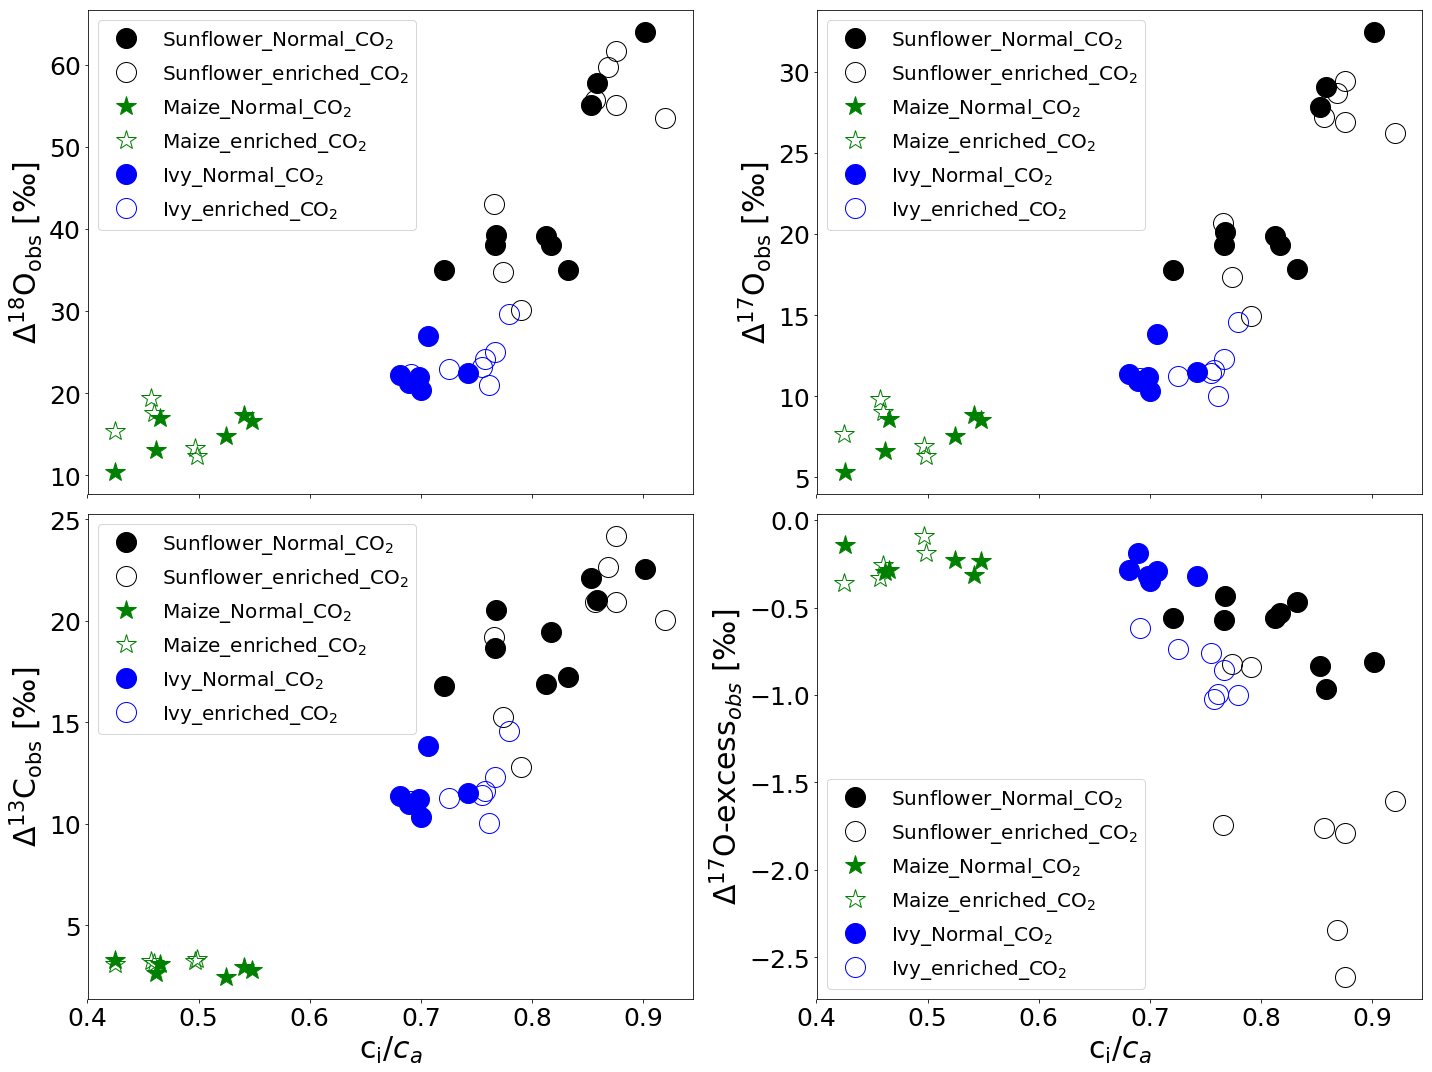

In [22]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")



ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_excess"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_excess"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_excess"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_excess"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_excess"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_excess"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")


######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant.eps")
plt.show()





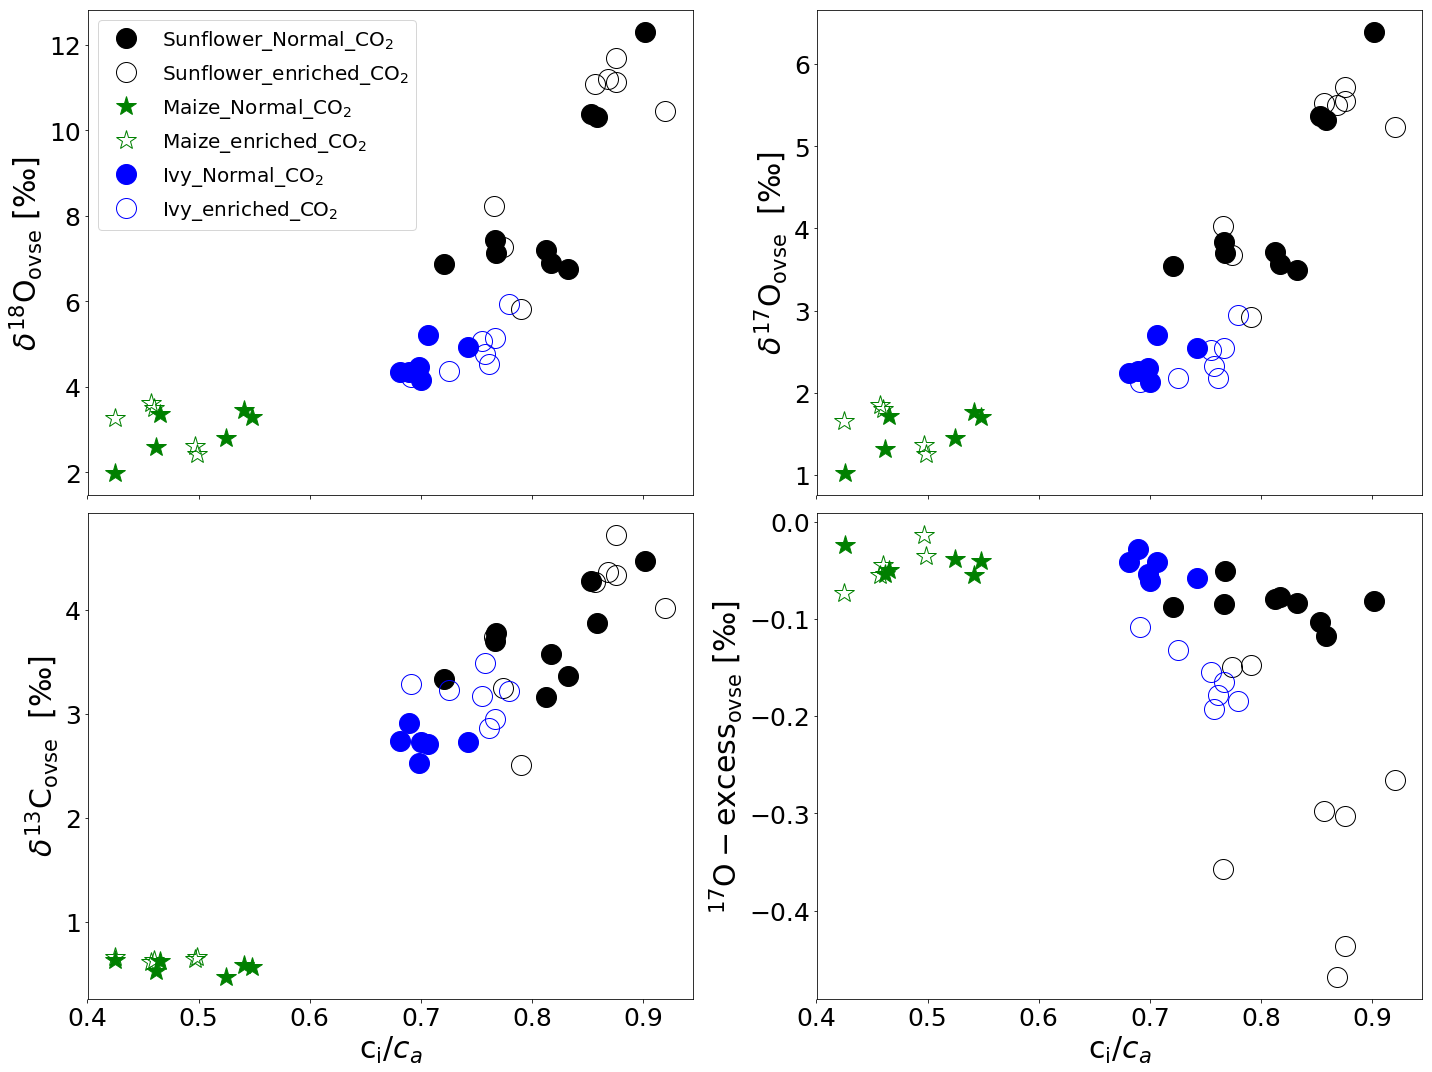

In [23]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight###
ax1.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["Dd18O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd18O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["Dd18O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["Dd18O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["Dd18O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["Dd18O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")



#########################



#/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{ovse}}$ "+u"[\u2030]",fontsize=30)
#####maize####
##################################
ax2.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["Dd17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["Dd17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["Dd17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["Dd17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["Dd17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")






#######Low light Maize
#####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################
#### Low light sunflower
######################


#######################


#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{ovse}}$ "+u" [\u2030]",fontsize=30)
################################################
#################################################

################################################
#################################################


ax3.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["Dd13C"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd13C"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["Dd13C"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["Dd13C"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["Dd13C"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["Dd13C"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")




#######Low light Maize
####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################


#ax3.legend(fontsize=20)

#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{ovse}}$ "+u" [\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################
################################################
#################################################

#####################
######################
##################################
ax4.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["DD17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["DD17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["DD17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["DD17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["DD17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["DD17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")





#######Low light Maize

#########################



######################


ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O-excess_{ovse}}$"+ u" [\u2030]",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference_Only_plant_CO2.eps")
plt.show()






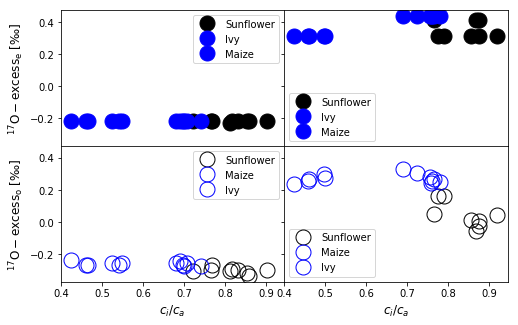

In [24]:
fig,((ax,ax1),(ax2,ax3))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(8,5))
ax.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_in"],marker="o",color="k",markersize=15,ls="none",label="Sunflower")
ax.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_in"],marker="o",color="b",markersize=15,ls="none",label="Ivy")
ax.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_in"],marker="o",color="b",markersize=15,ls="none",label="Maize")
ax.set_ylabel("$^{17}\mathregular{O-excess_{e}}$" + u" [\u2030]",fontsize=12)
ax.tick_params(labelsize=10)
ax.set_xlabel("$c_i/c_a$")
ax.legend()
ax1.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_in"],marker="o",color="k",markersize=15,ls="none",label="Sunflower")
ax1.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_in"],marker="o",color="b",markersize=15,ls="none",label="Ivy")
ax1.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_in"],marker="o",color="b",markersize=15,ls="none",label="Maize")
#ax1.errorbar(Enriched_ci_ca["Ci/Ca"],Enriched_e["D17O_in "],marker="o",color="g",markersize=15,ls="none",label="$^{17}\mathregular{O-excess_{e}(enriched)}$")
ax1.tick_params(labelsize=10)
ax1.set_xlabel("$c_i/c_a$")
ax1.legend()

ax2.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_o"],marker="o",color="k",mfc="none",markersize=15,ls="none",label="Sunflower")
ax2.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_o"],marker="o",color="b",mfc="none",markersize=15,ls="none",label="Maize")
ax2.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_o"],marker="o",color="b",mfc="none",markersize=15,ls="none",label="Ivy")
#ax2.errorbar(normal_ci_ca["Ci/Ca"],Norma_e["D17O_out"],marker="o",mfc='None',color="b",markersize=15,ls="none",label="$^{17}\mathregular{O_-excess_{o}(normal)}$")
ax2.set_ylabel("$^{17}\mathregular{O-excess_{o}}$" + u" [\u2030]",fontsize=12)
ax2.tick_params(labelsize=10)
ax2.set_xlabel("$c_i/c_a$",fontsize=12)


ax2.legend()

ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_o"],marker="o",color="k",mfc="none",markersize=15,ls="none",label="Sunflower")
ax3.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_o"],marker="o",color="b",mfc="none",markersize=15,ls="none",label="Maize")
ax3.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_o"],marker="o",color="b",mfc="none",markersize=15,ls="none",label="Ivy")
#ax3.errorbar(Enriched_ci_ca["Ci/Ca"],Enriched_e["D17O_out"],marker="o",mfc='None',color="g",markersize=15,ls="none",label="$^{17}\mathregular{O-excess_{o}(enriched)}$")
ax3.tick_params(labelsize=10)
ax3.set_xlabel("$c_i/c_a$",fontsize=12)
ax3.legend()
#ax1.errorbar(Observed_discrimination["Ci/Ca"],Photo_summary["D17O_out"],marker="o",color="r",markersize=15,ls="none")

plt.subplots_adjust(wspace=0, hspace=0)# to remove space between subplots 
#plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/17O-excess.eps")
plt.show()

In [25]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Discrimination.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Observed_discrimination["D13C_obs"].to_excel(writer, sheet_name='Sheet1')
Observed_discrimination["D17O_obs"].to_excel(writer, sheet_name='Sheet2')
Observed_discrimination["D18O_obs"].to_excel(writer, sheet_name='Sheet3')
Observed_discrimination["D17O_excess"].to_excel(writer, sheet_name='Sheet4')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Classifying for light intensity 

In [26]:
Observed_discrimination_high=Observed_discrimination[(Observed_discrimination['PFD'] >= 500)]
Observed_discrimination_low=Observed_discrimination[(Observed_discrimination['PFD'] <500)]


In [27]:
Maize=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['S'])&~Observed_discrimination['Plant'].isin(['I'])] 
Maize_high=Maize[(Maize['PFD'] >= 500)]
Maize_low=Maize[(Maize['PFD'] < 500)]

In [28]:
Sunflower=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])&~Observed_discrimination['Plant'].isin(['I'])] 
Sunflower_high=Sunflower[(Sunflower['PFD'] >= 500)]
Sunflower_low=Sunflower[(Sunflower['PFD'] < 500)]

In [29]:
Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['S'])&~Observed_discrimination['Plant'].isin(['M'])] 
Ivy_high=Ivy[(Ivy['PFD'] >= 500)]
Ivy_low=Ivy[(Ivy['PFD'] < 500)]

In [30]:
Sunflower

,D13C_obs,D17O_obs,D18O_obs,Ci/Ca,PFD,Plant,DD17O,D17O_diff_err,d17O_diff_err,d18O_diff_err,Enrich,Dd17O,Dd18O,Dd13C,A,gs(CO2),ACi_Ca,DDD17O_obs,c_i,gt_CO2,Ass,c_o,D17O_excess,D17O_in,D17O_o
EXP2,16.889,19.893,39.116,0.812179,1201,S,-0.080,0.023345,0.046098,0.044294,N,3.718292,7.200911,3.164336,0.000031,0.446181,0.000025,-0.561826,0.000329,0.435529,0.000031,0.000405,-0.562,-0.227,-0.307
EXP3,16.788,17.791,35.059,0.721168,1190,S,-0.088,0.031906,0.099664,0.133540,N,3.537026,6.876374,3.340177,0.000029,0.271928,0.000021,-0.559458,0.000290,0.267985,0.000029,0.000402,-0.559,-0.215,-0.303
EXP4,21.043,29.103,57.765,0.858661,292,S,-0.118,0.017029,0.028511,0.037000,N,5.318937,10.322324,3.870604,0.000016,0.312136,0.000014,-0.963976,0.000349,0.306976,0.000016,0.000407,-0.964,-0.215,-0.333
EXP5,19.189,20.706,43.015,0.765765,1182,S,-0.357,0.011662,0.026249,0.077621,E1,4.027211,8.221578,3.736588,0.000034,0.388671,0.000026,-1.742470,0.000308,0.380669,0.000034,0.000403,-1.743,0.409,0.052
EXP6,22.638,28.725,59.794,0.868370,298,S,-0.468,0.007810,0.042544,0.087920,E1,5.506936,11.190186,4.360870,0.000018,0.360795,0.000015,-2.343191,0.000351,0.353990,0.000018,0.000404,-2.343,0.409,-0.059
EXP3_NL,18.652,19.322,38.032,0.766806,299,S,-0.085,0.027019,0.023000,0.041761,N,3.828649,7.426600,3.697836,0.000015,0.171447,0.000012,-0.570751,0.000305,0.169877,0.000015,0.000398,-0.570,-0.215,-0.300
EXP3_NH,19.439,19.350,38.005,0.817118,1193,S,-0.078,0.017117,0.023345,0.025942,N,3.560870,6.890930,3.576933,0.000029,0.432134,0.000024,-0.529548,0.000329,0.422342,0.000029,0.000403,-0.530,-0.215,-0.293
EXP1_EL_1,24.168,29.425,61.700,0.875313,297,S,-0.437,0.008485,0.024759,0.045453,E1,5.721275,11.700945,4.718517,0.000017,0.365481,0.000015,-2.611704,0.000356,0.358782,0.000017,0.000407,-2.611,0.409,-0.028
EXP2_NH,20.528,20.137,39.330,0.767182,1193,S,-0.051,0.026249,0.026831,0.017692,N,3.703403,7.123830,3.774117,0.000030,0.337608,0.000023,-0.431341,0.000309,0.331602,0.000030,0.000403,-0.431,-0.215,-0.266
EXP1_NH,17.231,17.872,35.039,0.832074,1203,S,-0.084,0.030232,0.048712,0.045607,N,3.487802,6.746358,3.364425,0.000027,0.432949,0.000022,-0.469675,0.000332,0.423159,0.000027,0.000399,-0.469,-0.215,-0.299


In [31]:
maxSun,minsun=Sunflower.max(),Sunflower.min()

In [32]:
maxSun,minsun

(D13C_obs              24.168
 D17O_obs              32.477
 D18O_obs              64.035
 Ci/Ca               0.920086
 PFD                     1203
 Plant                      S
 DD17O                 -0.051
 D17O_diff_err      0.0319061
 d17O_diff_err       0.159649
 d18O_diff_err       0.339212
 Enrich                     N
 Dd17O                6.39202
 Dd18O                 12.301
 Dd13C                4.71852
 A                3.38708e-05
 gs(CO2)             0.619448
 ACi_Ca           2.59371e-05
 DDD17O_obs         -0.431341
 c_i              0.000368495
 gt_CO2               0.59956
 Ass              3.38708e-05
 c_o                0.0004069
 D17O_excess           -0.431
 D17O_in                0.409
 D17O_o                 0.163
 dtype: object, D13C_obs              12.827
 D17O_obs               14.95
 D18O_obs              30.144
 Ci/Ca               0.721168
 PFD                      292
 Plant                      S
 DD17O                 -0.468
 D17O_diff_err     0.0078

In [33]:
Ivy

,D13C_obs,D17O_obs,D18O_obs,Ci/Ca,PFD,Plant,DD17O,D17O_diff_err,d17O_diff_err,d18O_diff_err,Enrich,Dd17O,Dd18O,Dd13C,A,gs(CO2),ACi_Ca,DDD17O_obs,c_i,gt_CO2,Ass,c_o,D17O_excess,D17O_in,D17O_o
EXP1_NLI,13.937,11.378,22.213,0.681455,295,I,-0.042,0.027019,0.056814,0.060208,N,2.241448,4.338746,2.740036,0.000012,0.093107,0.000008,-0.286342,0.000273,0.092644,0.000012,0.000401,-0.287,-0.215,-0.257
EXP2_NLI,14.168,10.969,21.235,0.689560,302,I,-0.028,0.021401,0.029118,0.016279,N,2.259169,4.338746,2.910783,0.000012,0.100684,0.000008,-0.185418,0.000275,0.100143,0.000012,0.000398,-0.186,-0.215,-0.243
EXP3_NLI,13.292,10.339,20.340,0.700157,301,I,-0.061,0.022023,0.059572,0.078918,N,2.132171,4.162130,2.734984,0.000011,0.092642,0.000008,-0.345840,0.000280,0.092177,0.000011,0.000400,-0.346,-0.215,-0.276
EXP1_NHI,12.345,11.503,22.518,0.742539,1199,I,-0.058,0.022672,0.036944,0.028636,N,2.542700,4.935554,2.726902,0.000014,0.143774,0.000011,-0.320273,0.000298,0.142670,0.000014,0.000402,-0.320,-0.215,-0.273
EXP2_NHI,12.298,11.215,21.961,0.697986,1203,I,-0.054,0.017263,0.022910,0.012649,N,2.304455,4.474605,2.524834,0.000017,0.144452,0.000012,-0.317340,0.000281,0.143339,0.000017,0.000402,-0.317,-0.215,-0.269
EXP3_NHI,13.873,13.838,26.940,0.706630,1201,I,-0.042,0.022672,0.024594,0.017692,N,2.707108,5.216006,2.713767,0.000012,0.102386,0.000008,-0.292962,0.000288,0.101827,0.000012,0.000408,-0.293,-0.215,-0.257
EXP1_ELI,17.263,11.115,22.352,0.690762,297,I,-0.108,0.008062,0.038013,0.069376,E2,2.126520,4.238153,3.286428,0.000012,0.095634,0.000008,-0.618209,0.000278,0.095146,0.000012,0.000403,-0.618,0.435,0.327
EXP2_ELI,17.570,11.638,24.144,0.757341,301,I,-0.193,0.010630,0.040719,0.061685,E2,2.325481,4.776918,3.494278,0.000013,0.138613,0.000010,-1.025771,0.000305,0.137589,0.000013,0.000402,-1.025,0.435,0.242
EXP3_ELI,16.804,11.284,22.901,0.724876,303,I,-0.132,0.008944,0.034482,0.052202,E2,2.178722,4.381111,3.230199,0.000012,0.112318,0.000009,-0.734539,0.000294,0.111643,0.000012,0.000405,-0.735,0.435,0.303
EXP1_EHI,13.229,10.045,21.033,0.761478,1182,I,-0.178,0.012806,0.043463,0.036715,E2,2.183647,4.533793,2.868722,0.000014,0.151766,0.000011,-0.995362,0.000306,0.150537,0.000014,0.000402,-0.996,0.435,0.257


In [34]:
maxIvy,minIvy=Ivy.max(),Ivy.min()

In [35]:
maxIvy,minIvy

(D13C_obs               17.57
 D17O_obs              14.564
 D18O_obs              29.712
 Ci/Ca               0.779126
 PFD                     1203
 Plant                      I
 DD17O                 -0.028
 D17O_diff_err      0.0270185
 d17O_diff_err      0.0595725
 d18O_diff_err      0.0789177
 Enrich                     N
 Dd17O                2.94108
 Dd18O                5.92933
 Dd13C                3.49428
 A                1.67335e-05
 gs(CO2)             0.186102
 ACi_Ca           1.26517e-05
 DDD17O_obs         -0.185418
 c_i              0.000318662
 gt_CO2               0.18428
 Ass              1.67335e-05
 c_o                 0.000409
 D17O_excess           -0.186
 D17O_in                0.435
 D17O_o                 0.327
 dtype: object, D13C_obs              12.298
 D17O_obs              10.045
 D18O_obs               20.34
 Ci/Ca               0.681455
 PFD                      295
 Plant                      I
 DD17O                 -0.193
 D17O_diff_err     0.0080

In [36]:
mMaize,sMaize=Maize.max(),Maize.min()

In [37]:
mMaize,sMaize

(D13C_obs                3.34
 D17O_obs               9.845
 D18O_obs              19.361
 Ci/Ca                0.54811
 PFD                     1203
 Plant                      M
 DD17O                 -0.014
 D17O_diff_err      0.0310644
 d17O_diff_err      0.0463249
 d18O_diff_err      0.0803243
 Enrich                     N
 Dd17O                1.85095
 Dd18O                3.61253
 Dd13C               0.666179
 A                3.49778e-05
 gs(CO2)             0.178025
 ACi_Ca           1.74342e-05
 DDD17O_obs        -0.0918308
 c_i              0.000221765
 gt_CO2              0.176327
 Ass              3.49778e-05
 c_o                 0.000407
 D17O_excess           -0.092
 D17O_in                 0.31
 D17O_o                 0.296
 dtype: object, D13C_obs               2.478
 D17O_obs               5.311
 D18O_obs              10.357
 Ci/Ca               0.425006
 PFD                      299
 Plant                      M
 DD17O                 -0.073
 D17O_diff_err          0

In [38]:
m_Sunflower,std_Sunflower=Sunflower.mean(),Sunflower.std()

In [39]:
m_Sunflower,std_Sunflower

(D13C_obs          19.486176
 D17O_obs          23.258647
 D18O_obs          46.781765
 Ci/Ca              0.826834
 PFD              718.705882
 DD17O             -0.187882
 D17O_diff_err      0.019904
 d17O_diff_err      0.055450
 d18O_diff_err      0.092669
 Dd17O              4.534914
 Dd18O              8.949371
 Dd13C              3.808388
 A                  0.000023
 gs(CO2)            0.375749
 ACi_Ca             0.000019
 DDD17O_obs        -1.132151
 c_i                0.000333
 gt_CO2             0.367902
 Ass                0.000023
 c_o                0.000402
 D17O_excess       -1.131941
 D17O_in            0.048824
 D17O_o            -0.139059
 dtype: float64, D13C_obs           2.937442
 D17O_obs           5.407149
 D18O_obs          11.333099
 Ci/Ca              0.055785
 PFD              460.955769
 DD17O              0.137134
 D17O_diff_err      0.007428
 d17O_diff_err      0.037267
 d18O_diff_err      0.080049
 Dd17O              1.063815
 Dd18O              2.15814

# Calssifying based on CO2 type 

In [40]:
######sunflower
SHN=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["E"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E1=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E2=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E3=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E"])]
#######################
##########################

SLN=Sunflower_low.loc[~Sunflower_low["Enrich"].isin(["E"])&~Sunflower_low["Enrich"].isin(["E1"])]
SLE_E1=Sunflower_low.loc[~Sunflower_low["Enrich"].isin(["N"])&~Sunflower_low["Enrich"].isin(["E"])]
SLE_E=Sunflower_low.loc[~Sunflower_low["Enrich"].isin(["N"])&~Sunflower_low["Enrich"].isin(["E1"])]
########## Maize
MHN=Maize_high.loc[~Maize_high["Enrich"].isin(["E"])]
MHE=Maize_high.loc[~Maize_high["Enrich"].isin(["N"])]
MLN=Maize_low.loc[~Maize_low["Enrich"].isin(["E"])]
MLE=Maize_low.loc[~Maize_low["Enrich"].isin(["N"])]
######################################
###############################
######IVY
IHN=Ivy_high.loc[~Ivy_high["Enrich"].isin(["E2"])]
IHE=Ivy_high.loc[~Ivy_high["Enrich"].isin(["N"])]
ILN=Ivy_low.loc[~Ivy_low["Enrich"].isin(["E2"])]
ILE=Ivy_low.loc[~Ivy_low["Enrich"].isin(["N"])]

In [41]:
SLE_E

,D13C_obs,D17O_obs,D18O_obs,Ci/Ca,PFD,Plant,DD17O,D17O_diff_err,d17O_diff_err,d18O_diff_err,Enrich,Dd17O,Dd18O,Dd13C,A,gs(CO2),ACi_Ca,DDD17O_obs,c_i,gt_CO2,Ass,c_o,D17O_excess,D17O_in,D17O_o
EXP1_ELS,20.054,26.266,53.532,0.920086,298,S,-0.266,0.016553,0.031401,0.034713,E,5.234493,10.446246,4.016137,0.000018,0.619448,0.000016,-1.607345,0.000368,0.599560,0.000018,0.000400,-1.608,0.31,0.044
EXP2_ELS,20.929,27.249,55.749,0.856561,295,S,-0.298,0.015133,0.102108,0.195735,E,5.532142,11.073157,4.269967,0.000016,0.305532,0.000014,-1.759892,0.000347,0.300618,0.000016,0.000405,-1.759,0.31,0.012
EXP3_ELS,20.937,26.918,55.165,0.875733,297,S,-0.303,0.023431,0.068710,0.091761,E,5.551854,11.134485,4.338190,0.000018,0.382005,0.000015,-1.790013,0.000351,0.374363,0.000018,0.000401,-1.789,0.31,0.007


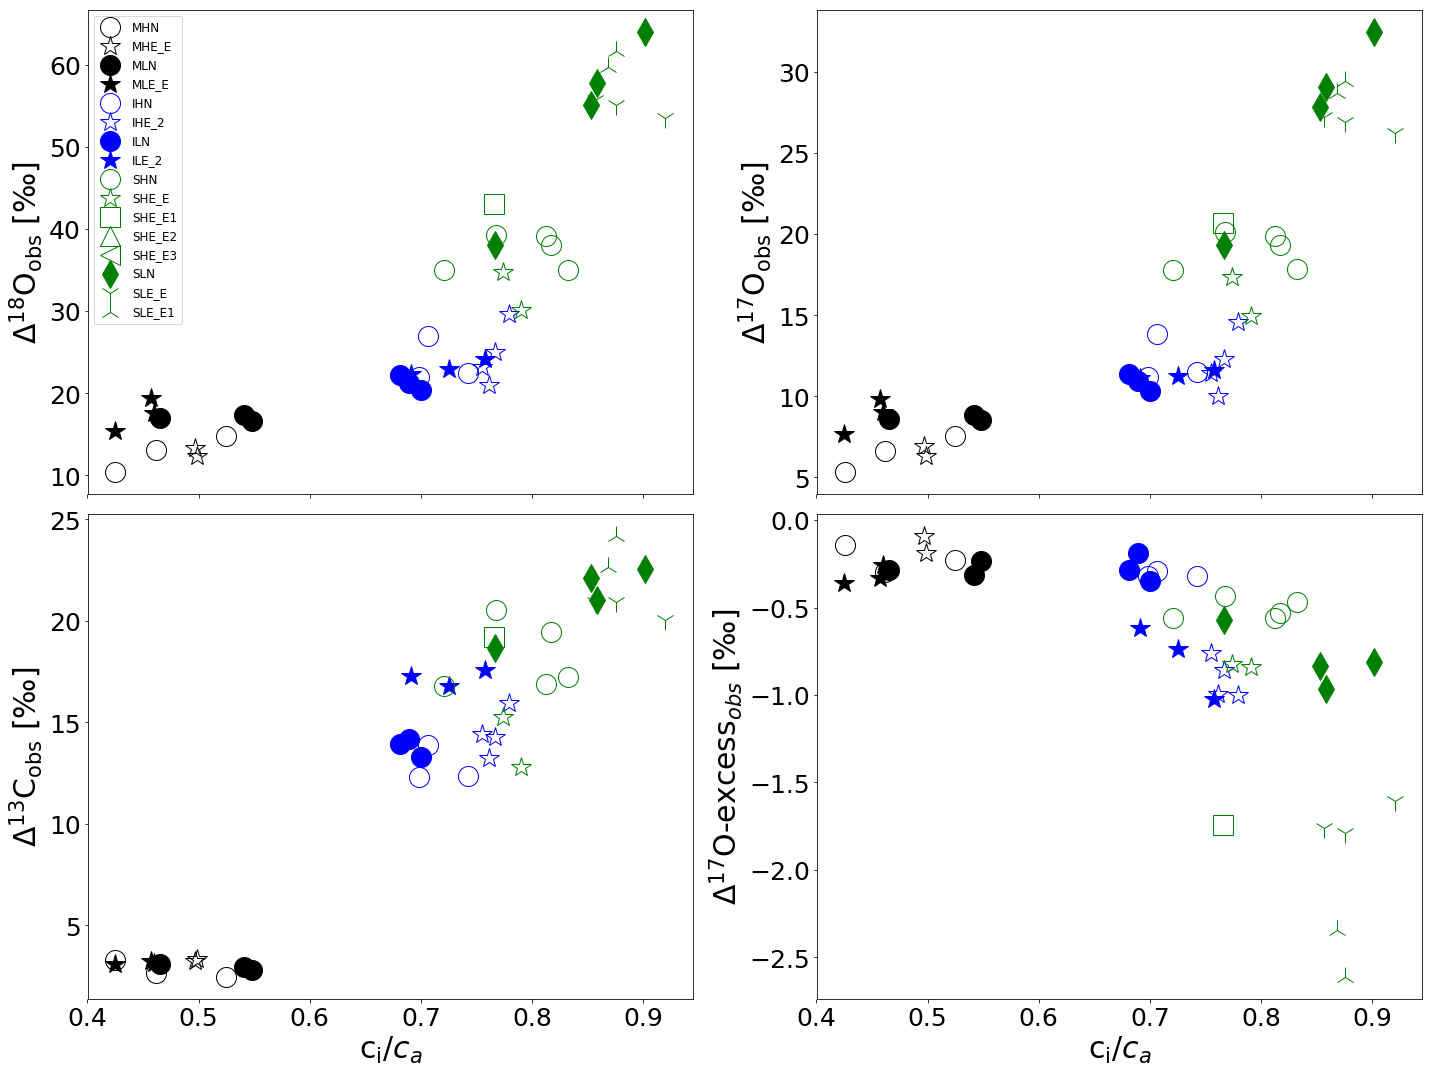

In [42]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(MHN["Ci/Ca"],MHN["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax1.errorbar(MHE["Ci/Ca"],MHE["D18O_obs"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax1.errorbar(MLN["Ci/Ca"],MLN["D18O_obs"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax1.errorbar(MLE["Ci/Ca"],MLE["D18O_obs"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax1.errorbar(IHN["Ci/Ca"],IHN["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax1.errorbar(IHE["Ci/Ca"],IHE["D18O_obs"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax1.errorbar(ILN["Ci/Ca"],ILN["D18O_obs"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax1.errorbar(ILE["Ci/Ca"],ILE["D18O_obs"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax1.errorbar(SHN["Ci/Ca"],SHN["D18O_obs"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax1.errorbar(SHE_E["Ci/Ca"],SHE_E["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax1.errorbar(SHE_E1["Ci/Ca"],SHE_E1["D18O_obs"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax1.errorbar(SHE_E2["Ci/Ca"],SHE_E2["D18O_obs"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax1.errorbar(SHE_E3["Ci/Ca"],SHE_E3["D18O_obs"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax1.errorbar(SLN["Ci/Ca"],SLN["D18O_obs"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax1.errorbar(SLE_E["Ci/Ca"],SLE_E["D18O_obs"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax1.errorbar(SLE_E1["Ci/Ca"],SLE_E1["D18O_obs"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")



####sunflower#####
#ax1.errorbar(Sunflower_high["Ci/Ca"],Sunflower_high["D18O_obs"],marker="o",markersize=20,color="g",label="Sunflower_High light",ls="none")
#ax1.errorbar(Sunflower_low["Ci/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####
ax2.errorbar(MHN["Ci/Ca"],MHN["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax2.errorbar(MHE["Ci/Ca"],MHE["D17O_obs"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax2.errorbar(MLN["Ci/Ca"],MLN["D17O_obs"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax2.errorbar(MLE["Ci/Ca"],MLE["D17O_obs"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax2.errorbar(IHN["Ci/Ca"],IHN["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax2.errorbar(IHE["Ci/Ca"],IHE["D17O_obs"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax2.errorbar(ILN["Ci/Ca"],ILN["D17O_obs"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax2.errorbar(ILE["Ci/Ca"],ILE["D17O_obs"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax2.errorbar(SHN["Ci/Ca"],SHN["D17O_obs"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax2.errorbar(SHE_E["Ci/Ca"],SHE_E["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax2.errorbar(SHE_E1["Ci/Ca"],SHE_E1["D17O_obs"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax2.errorbar(SHE_E2["Ci/Ca"],SHE_E2["D17O_obs"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax2.errorbar(SHE_E3["Ci/Ca"],SHE_E3["D17O_obs"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax2.errorbar(SLN["Ci/Ca"],SLN["D17O_obs"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax2.errorbar(SLE_E["Ci/Ca"],SLE_E["D17O_obs"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax2.errorbar(SLE_E1["Ci/Ca"],SLE_E1["D17O_obs"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")


#######################
######################
#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################

ax3.errorbar(MHN["Ci/Ca"],MHN["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax3.errorbar(MHE["Ci/Ca"],MHE["D13C_obs"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax3.errorbar(MLN["Ci/Ca"],MLN["D13C_obs"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax3.errorbar(MLE["Ci/Ca"],MLE["D13C_obs"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax3.errorbar(IHN["Ci/Ca"],IHN["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax3.errorbar(IHE["Ci/Ca"],IHE["D13C_obs"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax3.errorbar(ILN["Ci/Ca"],ILN["D13C_obs"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax3.errorbar(ILE["Ci/Ca"],ILE["D13C_obs"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax3.errorbar(SHN["Ci/Ca"],SHN["D13C_obs"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax3.errorbar(SHE_E["Ci/Ca"],SHE_E["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax3.errorbar(SHE_E1["Ci/Ca"],SHE_E1["D13C_obs"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax3.errorbar(SHE_E2["Ci/Ca"],SHE_E2["D13C_obs"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax3.errorbar(SHE_E3["Ci/Ca"],SHE_E3["D13C_obs"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax3.errorbar(SLN["Ci/Ca"],SLN["D13C_obs"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax3.errorbar(SLE_E["Ci/Ca"],SLE_E["D13C_obs"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax3.errorbar(SLE_E1["Ci/Ca"],SLE_E1["D13C_obs"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")


#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################
ax4.errorbar(MHN["Ci/Ca"],MHN["D17O_excess"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax4.errorbar(MHE["Ci/Ca"],MHE["D17O_excess"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax4.errorbar(MLN["Ci/Ca"],MLN["D17O_excess"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax4.errorbar(MLE["Ci/Ca"],MLE["D17O_excess"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax4.errorbar(IHN["Ci/Ca"],IHN["D17O_excess"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax4.errorbar(IHE["Ci/Ca"],IHE["D17O_excess"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax4.errorbar(ILN["Ci/Ca"],ILN["D17O_excess"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax4.errorbar(ILE["Ci/Ca"],ILE["D17O_excess"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax4.errorbar(SHN["Ci/Ca"],SHN["D17O_excess"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax4.errorbar(SHE_E["Ci/Ca"],SHE_E["D17O_excess"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax4.errorbar(SHE_E1["Ci/Ca"],SHE_E1["D17O_excess"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax4.errorbar(SHE_E2["Ci/Ca"],SHE_E2["D17O_excess"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax4.errorbar(SHE_E3["Ci/Ca"],SHE_E3["D17O_excess"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax4.errorbar(SLN["Ci/Ca"],SLN["D17O_excess"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax4.errorbar(SLE_E["Ci/Ca"],SLE_E["D17O_excess"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax4.errorbar(SLE_E1["Ci/Ca"],SLE_E1["D17O_excess"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")


######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_VS_Ci.eps")
plt.show()




### In the above figure M stands for maiz and S stands for sunflower, H for highlight, L for low light, E enriched CO2 and N normal CO2 

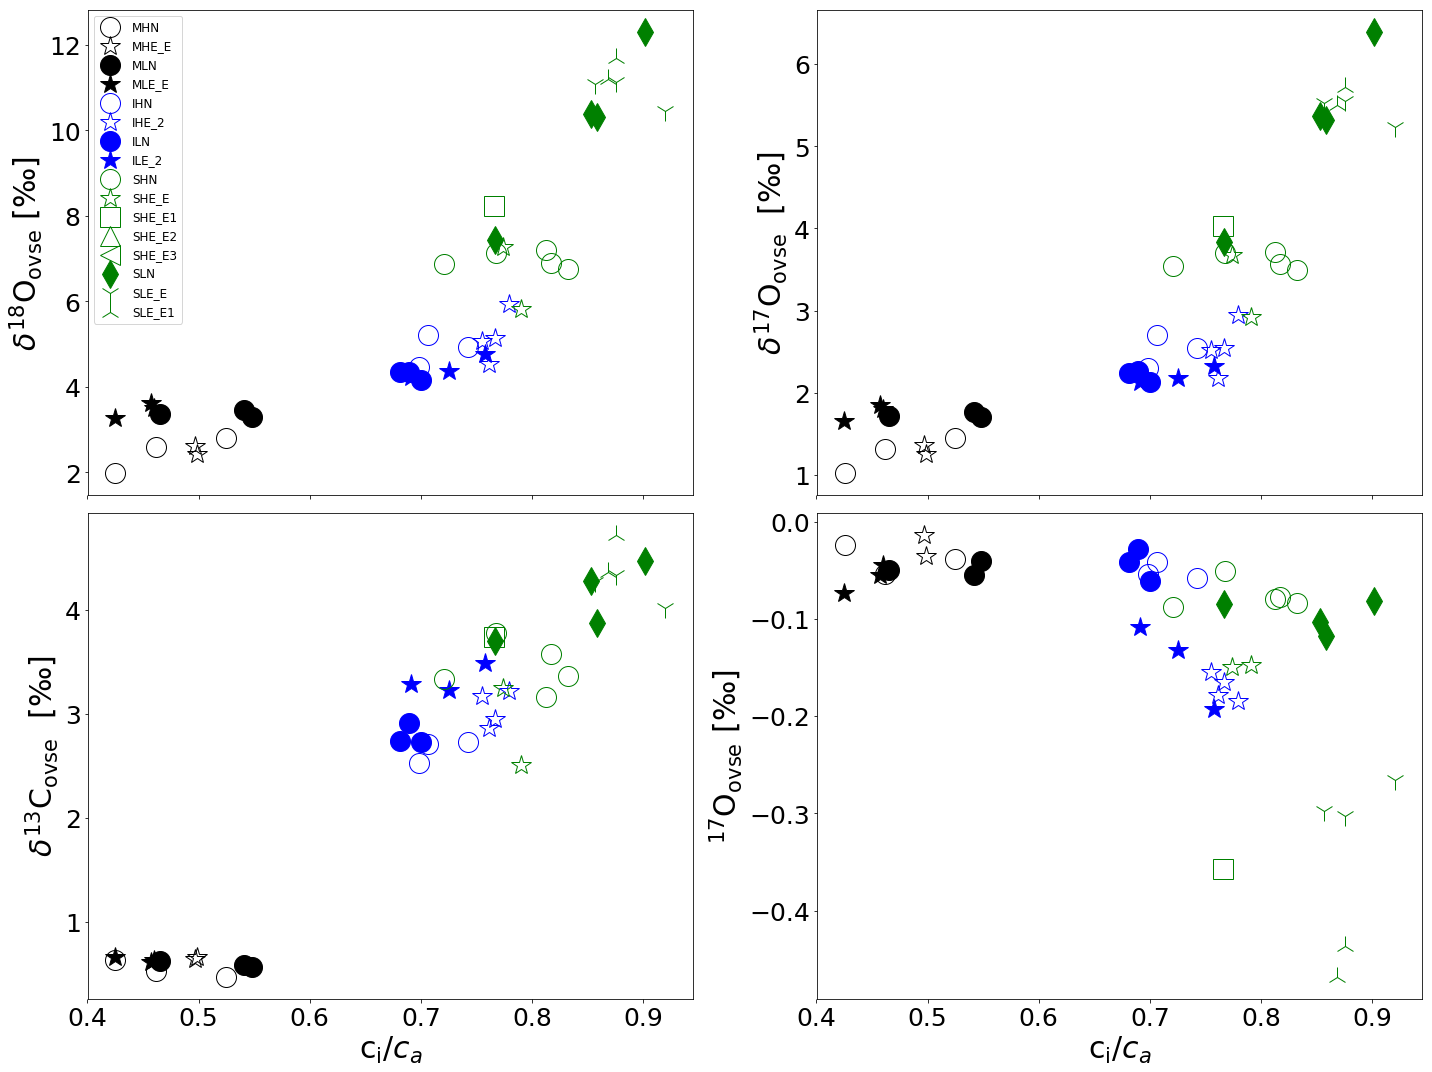

In [43]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight###
ax1.errorbar(MHN["Ci/Ca"],MHN["Dd18O"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax1.errorbar(MHE["Ci/Ca"],MHE["Dd18O"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax1.errorbar(MLN["Ci/Ca"],MLN["Dd18O"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax1.errorbar(MLE["Ci/Ca"],MLE["Dd18O"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax1.errorbar(IHN["Ci/Ca"],IHN["Dd18O"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax1.errorbar(IHE["Ci/Ca"],IHE["Dd18O"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax1.errorbar(ILN["Ci/Ca"],ILN["Dd18O"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax1.errorbar(ILE["Ci/Ca"],ILE["Dd18O"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax1.errorbar(SHN["Ci/Ca"],SHN["Dd18O"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax1.errorbar(SHE_E["Ci/Ca"],SHE_E["Dd18O"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax1.errorbar(SHE_E1["Ci/Ca"],SHE_E1["Dd18O"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax1.errorbar(SHE_E2["Ci/Ca"],SHE_E2["Dd18O"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax1.errorbar(SHE_E3["Ci/Ca"],SHE_E3["Dd18O"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax1.errorbar(SLN["Ci/Ca"],SLN["Dd18O"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax1.errorbar(SLE_E["Ci/Ca"],SLE_E["Dd18O"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax1.errorbar(SLE_E1["Ci/Ca"],SLE_E1["Dd18O"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")



####sunflower#####
#ax1.errorbar(Sunflower_high["Ci/Ca"],Sunflower_high["D18O_obs"],marker="o",markersize=20,color="g",label="Sunflower_High light",ls="none")
#ax1.errorbar(Sunflower_low["Ci/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",lab



####sunflower#####
#ax1.errorbar(Sunflower_high["Ci/Ca"],Sunflower_high["D18O_obs"],marker="o",markersize=20,color="g",label="Sunflower_High light",ls="none")
#ax1.errorbar(Sunflower_low["Ci/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{ovse}}$ "+u"[\u2030]",fontsize=30)
#####maize####
ax2.errorbar(MHN["Ci/Ca"],MHN["Dd17O"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax2.errorbar(MHE["Ci/Ca"],MHE["Dd17O"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax2.errorbar(MLN["Ci/Ca"],MLN["Dd17O"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax2.errorbar(MLE["Ci/Ca"],MLE["Dd17O"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax2.errorbar(IHN["Ci/Ca"],IHN["Dd17O"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax2.errorbar(IHE["Ci/Ca"],IHE["Dd17O"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax2.errorbar(ILN["Ci/Ca"],ILN["Dd17O"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax2.errorbar(ILE["Ci/Ca"],ILE["Dd17O"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax2.errorbar(SHN["Ci/Ca"],SHN["Dd17O"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax2.errorbar(SHE_E["Ci/Ca"],SHE_E["Dd17O"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax2.errorbar(SHE_E1["Ci/Ca"],SHE_E1["Dd17O"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax2.errorbar(SHE_E2["Ci/Ca"],SHE_E2["Dd17O"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax2.errorbar(SHE_E3["Ci/Ca"],SHE_E3["Dd17O"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax2.errorbar(SLN["Ci/Ca"],SLN["Dd17O"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax2.errorbar(SLE_E["Ci/Ca"],SLE_E["Dd17O"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax2.errorbar(SLE_E1["Ci/Ca"],SLE_E1["Dd17O"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")


#######################


#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{ovse}}$ "+u" [\u2030]",fontsize=30)
################################################
#################################################

################################################
#################################################

ax3.errorbar(MHN["Ci/Ca"],MHN["Dd13C"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax3.errorbar(MHE["Ci/Ca"],MHE["Dd13C"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax3.errorbar(MLN["Ci/Ca"],MLN["Dd13C"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax3.errorbar(MLE["Ci/Ca"],MLE["Dd13C"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax3.errorbar(IHN["Ci/Ca"],IHN["Dd13C"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax3.errorbar(IHE["Ci/Ca"],IHE["Dd13C"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax3.errorbar(ILN["Ci/Ca"],ILN["Dd13C"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax3.errorbar(ILE["Ci/Ca"],ILE["Dd13C"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax3.errorbar(SHN["Ci/Ca"],SHN["Dd13C"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax3.errorbar(SHE_E["Ci/Ca"],SHE_E["Dd13C"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax3.errorbar(SHE_E1["Ci/Ca"],SHE_E1["Dd13C"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax3.errorbar(SHE_E2["Ci/Ca"],SHE_E2["Dd13C"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax3.errorbar(SHE_E3["Ci/Ca"],SHE_E3["Dd13C"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax3.errorbar(SLN["Ci/Ca"],SLN["Dd13C"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax3.errorbar(SLE_E["Ci/Ca"],SLE_E["Dd13C"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax3.errorbar(SLE_E1["Ci/Ca"],SLE_E1["Dd13C"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")


#ax3.legend(fontsize=20)

#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{ovse}}$ "+u" [\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################
################################################
#################################################

#####################
######################
ax4.errorbar(MHN["Ci/Ca"],MHN["DD17O"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax4.errorbar(MHE["Ci/Ca"],MHE["DD17O"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax4.errorbar(MLN["Ci/Ca"],MLN["DD17O"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax4.errorbar(MLE["Ci/Ca"],MLE["DD17O"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax4.errorbar(IHN["Ci/Ca"],IHN["DD17O"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax4.errorbar(IHE["Ci/Ca"],IHE["DD17O"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax4.errorbar(ILN["Ci/Ca"],ILN["DD17O"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax4.errorbar(ILE["Ci/Ca"],ILE["DD17O"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax4.errorbar(SHN["Ci/Ca"],SHN["DD17O"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax4.errorbar(SHE_E["Ci/Ca"],SHE_E["DD17O"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax4.errorbar(SHE_E1["Ci/Ca"],SHE_E1["DD17O"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax4.errorbar(SHE_E2["Ci/Ca"],SHE_E2["DD17O"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax4.errorbar(SHE_E3["Ci/Ca"],SHE_E3["DD17O"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax4.errorbar(SLN["Ci/Ca"],SLN["DD17O"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax4.errorbar(SLE_E["Ci/Ca"],SLE_E["DD17O"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax4.errorbar(SLE_E1["Ci/Ca"],SLE_E1["DD17O"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")


######################


ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O_{ovse}}$"+ u" [\u2030]",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference_VS_Ci.eps")
plt.show()





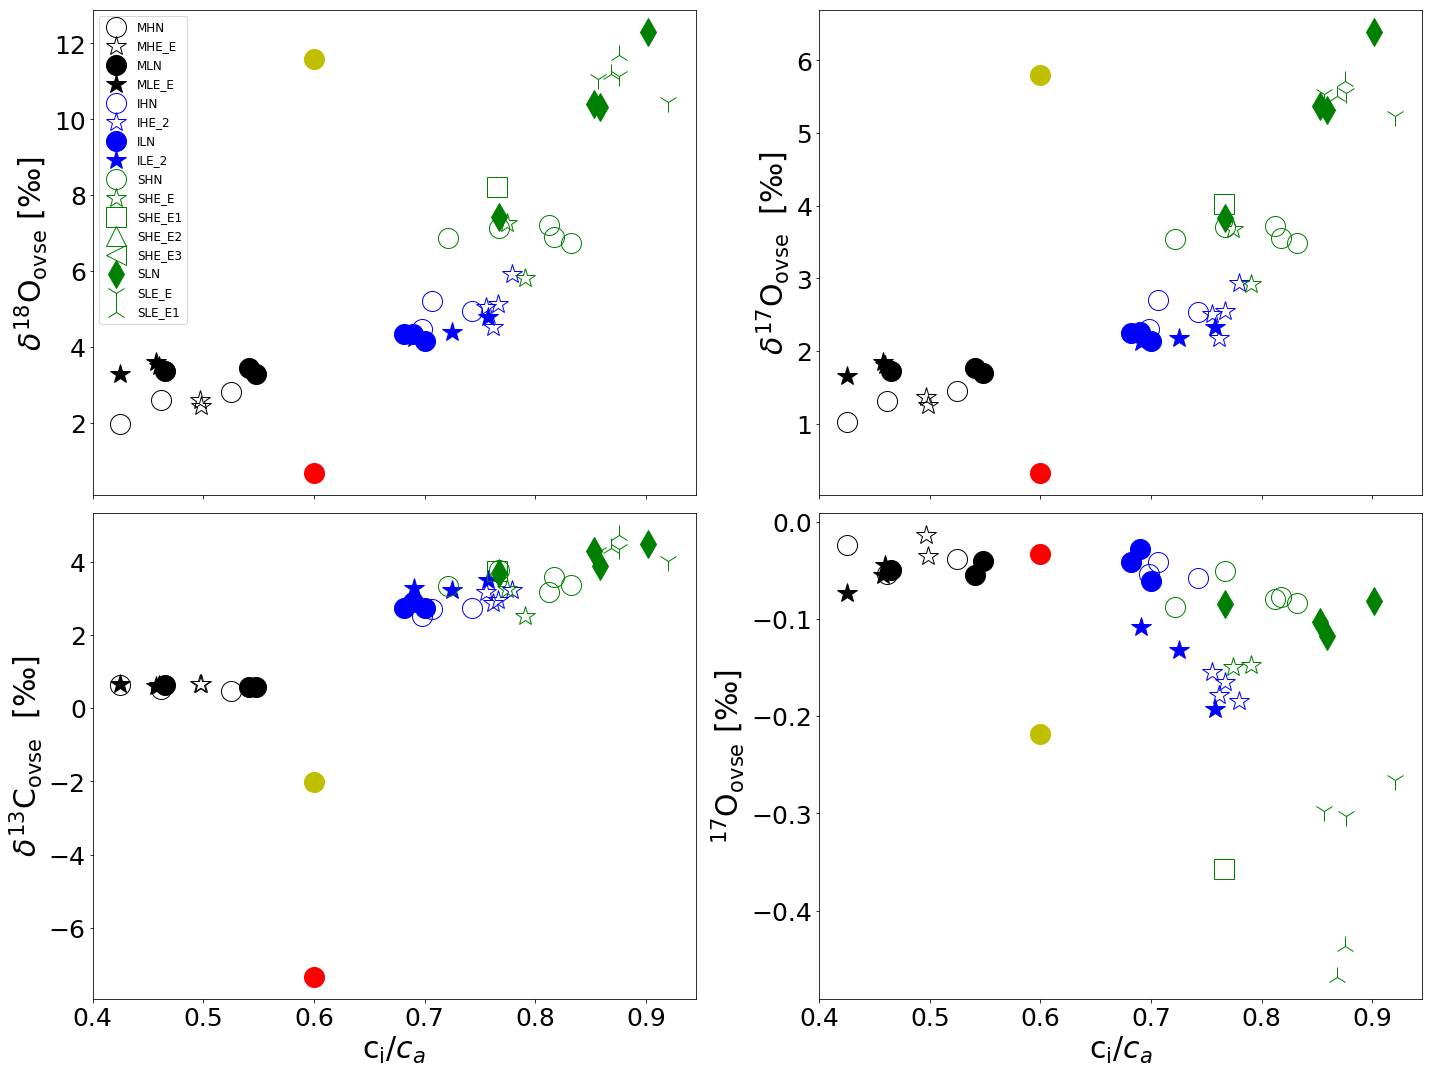

In [44]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight###
ax1.errorbar(MHN["Ci/Ca"],MHN["Dd18O"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax1.errorbar(MHE["Ci/Ca"],MHE["Dd18O"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax1.errorbar(MLN["Ci/Ca"],MLN["Dd18O"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax1.errorbar(MLE["Ci/Ca"],MLE["Dd18O"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax1.errorbar(IHN["Ci/Ca"],IHN["Dd18O"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax1.errorbar(IHE["Ci/Ca"],IHE["Dd18O"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax1.errorbar(ILN["Ci/Ca"],ILN["Dd18O"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax1.errorbar(ILE["Ci/Ca"],ILE["Dd18O"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax1.errorbar(SHN["Ci/Ca"],SHN["Dd18O"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax1.errorbar(SHE_E["Ci/Ca"],SHE_E["Dd18O"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax1.errorbar(SHE_E1["Ci/Ca"],SHE_E1["Dd18O"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax1.errorbar(SHE_E2["Ci/Ca"],SHE_E2["Dd18O"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax1.errorbar(SHE_E3["Ci/Ca"],SHE_E3["Dd18O"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax1.errorbar(SLN["Ci/Ca"],SLN["Dd18O"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax1.errorbar(SLE_E["Ci/Ca"],SLE_E["Dd18O"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax1.errorbar(SLE_E1["Ci/Ca"],SLE_E1["Dd18O"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")
ax1.errorbar([0.6],0.6693,marker="o",color="r",markersize=20,ls="None")
ax1.errorbar([0.6],11.588,marker="o",color="y",markersize=20,ls="None")



####sunflower#####
#ax1.errorbar(Sunflower_high["Ci/Ca"],Sunflower_high["D18O_obs"],marker="o",markersize=20,color="g",label="Sunflower_High light",ls="none")
#ax1.errorbar(Sunflower_low["Ci/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",lab



####sunflower#####
#ax1.errorbar(Sunflower_high["Ci/Ca"],Sunflower_high["D18O_obs"],marker="o",markersize=20,color="g",label="Sunflower_High light",ls="none")
#ax1.errorbar(Sunflower_low["Ci/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{ovse}}$ "+u"[\u2030]",fontsize=30)
#####maize####
ax2.errorbar(MHN["Ci/Ca"],MHN["Dd17O"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax2.errorbar(MHE["Ci/Ca"],MHE["Dd17O"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax2.errorbar(MLN["Ci/Ca"],MLN["Dd17O"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax2.errorbar(MLE["Ci/Ca"],MLE["Dd17O"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax2.errorbar(IHN["Ci/Ca"],IHN["Dd17O"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax2.errorbar(IHE["Ci/Ca"],IHE["Dd17O"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax2.errorbar(ILN["Ci/Ca"],ILN["Dd17O"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax2.errorbar(ILE["Ci/Ca"],ILE["Dd17O"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax2.errorbar(SHN["Ci/Ca"],SHN["Dd17O"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax2.errorbar(SHE_E["Ci/Ca"],SHE_E["Dd17O"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax2.errorbar(SHE_E1["Ci/Ca"],SHE_E1["Dd17O"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax2.errorbar(SHE_E2["Ci/Ca"],SHE_E2["Dd17O"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax2.errorbar(SHE_E3["Ci/Ca"],SHE_E3["Dd17O"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax2.errorbar(SLN["Ci/Ca"],SLN["Dd17O"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax2.errorbar(SLE_E["Ci/Ca"],SLE_E["Dd17O"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax2.errorbar(SLE_E1["Ci/Ca"],SLE_E1["Dd17O"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")

ax2.errorbar([0.6],0.3148,marker="o",color="r",markersize=20,ls="None")
ax2.errorbar([0.6],5.8044,marker="o",color="y",markersize=20,ls="None")


#######################


#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{ovse}}$ "+u" [\u2030]",fontsize=30)
################################################
#################################################

################################################
#################################################

ax3.errorbar(MHN["Ci/Ca"],MHN["Dd13C"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax3.errorbar(MHE["Ci/Ca"],MHE["Dd13C"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax3.errorbar(MLN["Ci/Ca"],MLN["Dd13C"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax3.errorbar(MLE["Ci/Ca"],MLE["Dd13C"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax3.errorbar(IHN["Ci/Ca"],IHN["Dd13C"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax3.errorbar(IHE["Ci/Ca"],IHE["Dd13C"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax3.errorbar(ILN["Ci/Ca"],ILN["Dd13C"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax3.errorbar(ILE["Ci/Ca"],ILE["Dd13C"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax3.errorbar(SHN["Ci/Ca"],SHN["Dd13C"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax3.errorbar(SHE_E["Ci/Ca"],SHE_E["Dd13C"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax3.errorbar(SHE_E1["Ci/Ca"],SHE_E1["Dd13C"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax3.errorbar(SHE_E2["Ci/Ca"],SHE_E2["Dd13C"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax3.errorbar(SHE_E3["Ci/Ca"],SHE_E3["Dd13C"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax3.errorbar(SLN["Ci/Ca"],SLN["Dd13C"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax3.errorbar(SLE_E["Ci/Ca"],SLE_E["Dd13C"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax3.errorbar(SLE_E1["Ci/Ca"],SLE_E1["Dd13C"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")
ax3.errorbar([0.6],-7.328,marker="o",color="r",markersize=20,ls="None")
ax3.errorbar([0.6],-2.018,marker="o",color="y",markersize=20,ls="None")



#ax3.legend(fontsize=20)

#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{ovse}}$ "+u" [\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################
################################################
#################################################

#####################
######################
ax4.errorbar(MHN["Ci/Ca"],MHN["DD17O"],marker="o",markersize=20,color="k",mfc='None',label="MHN",ls="none")
ax4.errorbar(MHE["Ci/Ca"],MHE["DD17O"],marker="*",markersize=20,color="k",mfc='None',label="MHE_E",ls="none")
###################################
#######Low light Maize
ax4.errorbar(MLN["Ci/Ca"],MLN["DD17O"],marker="o",markersize=20,color="k",label="MLN",ls="none")
ax4.errorbar(MLE["Ci/Ca"],MLE["DD17O"],marker="*",markersize=20,color="k",label="MLE_E",ls="none")
######################

#########Ivy d18O
#####################################

ax4.errorbar(IHN["Ci/Ca"],IHN["DD17O"],marker="o",markersize=20,color="b",mfc='None',label="IHN",ls="none")
ax4.errorbar(IHE["Ci/Ca"],IHE["DD17O"],marker="*",markersize=20,color="b",mfc='None',label="IHE_2",ls="none")
###Low light IVY
#########################
ax4.errorbar(ILN["Ci/Ca"],ILN["DD17O"],marker="o",markersize=20,color="b",label="ILN",ls="none")
ax4.errorbar(ILE["Ci/Ca"],ILE["DD17O"],marker="*",markersize=20,color="b",label="ILE_2",ls="none")
#######################
#################################
#######Sunflower_d18O
#############################
ax4.errorbar(SHN["Ci/Ca"],SHN["DD17O"],marker="o",markersize=20,color="g",mfc='None',label="SHN",ls="none")
ax4.errorbar(SHE_E["Ci/Ca"],SHE_E["DD17O"],marker="*",markersize=20,color="g",mfc='None',label="SHE_E",ls="none")
ax4.errorbar(SHE_E1["Ci/Ca"],SHE_E1["DD17O"],marker="s",markersize=20,color="g",mfc='None',label="SHE_E1",ls="none")
ax4.errorbar(SHE_E2["Ci/Ca"],SHE_E2["DD17O"],marker="^",markersize=20,color="g",mfc='None',label="SHE_E2",ls="none")
ax4.errorbar(SHE_E3["Ci/Ca"],SHE_E3["DD17O"],marker="<",markersize=20,color="g",mfc='None',label="SHE_E3",ls="none")
######## Low light sunflower
######################
ax4.errorbar(SLN["Ci/Ca"],SLN["DD17O"],marker="d",markersize=20,color="g",label="SLN",ls="none")
ax4.errorbar(SLE_E["Ci/Ca"],SLE_E["DD17O"],marker="1",markersize=20,color="g",label="SLE_E",ls="none")
ax4.errorbar(SLE_E1["Ci/Ca"],SLE_E1["DD17O"],marker="2",markersize=20,color="g",mfc='None',label="SLE_E1",ls="none")
ax4.errorbar([0.6],-0.033,marker="o",color="r",markersize=20,ls="None")
ax4.errorbar([0.6],-0.218,marker="o",color="y",markersize=20,ls="None")



######################


ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O_{ovse}}$"+ u" [\u2030]",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Dark_respiration.eps")
plt.show()






# Out going and engoing $\Delta^{17}{O_{CO_2}}$

In [45]:
Enriched_e=Photo_summary.loc[~Photo_summary['Enrich'].isin(['N'])]
Enriched_ci_ca=Observed_discrimination.loc[~Observed_discrimination['Enrich'].isin(['N'])]
Norma_e=Photo_summary.loc[~Photo_summary["Enrich"].isin(["E"])&~Photo_summary["Enrich"].isin(["E1"])&~Photo_summary["Enrich"].isin(["E2"])&~Photo_summary["Enrich"].isin(["E3"])]
normal_ci_ca=Observed_discrimination.loc[~Observed_discrimination["Enrich"].isin(["E"])&~Observed_discrimination["Enrich"].isin(["E1"])&~Observed_discrimination["Enrich"].isin(["E2"])&~Observed_discrimination["Enrich"].isin(["E3"])]

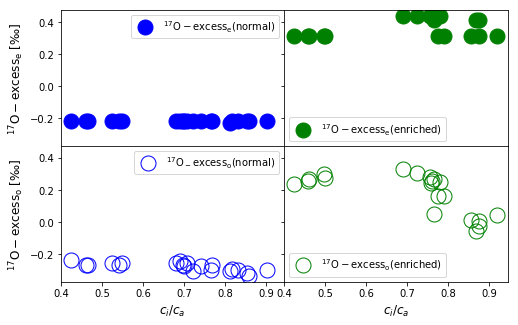

In [46]:
fig,((ax,ax1),(ax2,ax3))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(8,5))
ax.errorbar(normal_ci_ca["Ci/Ca"],Norma_e["D17O_in "],marker="o",color="b",markersize=15,ls="none",label="$^{17}\mathregular{O-excess_{e}(normal)}$")
ax.set_ylabel("$^{17}\mathregular{O-excess_{e}}$" + u" [\u2030]",fontsize=12)
ax.tick_params(labelsize=10)
ax.set_xlabel("$c_i/c_a$")
ax.legend()
ax1.errorbar(Enriched_ci_ca["Ci/Ca"],Enriched_e["D17O_in "],marker="o",color="g",markersize=15,ls="none",label="$^{17}\mathregular{O-excess_{e}(enriched)}$")
ax1.tick_params(labelsize=10)
ax1.set_xlabel("$c_i/c_a$")
ax1.legend()
ax2.errorbar(normal_ci_ca["Ci/Ca"],Norma_e["D17O_out"],marker="o",mfc='None',color="b",markersize=15,ls="none",label="$^{17}\mathregular{O_-excess_{o}(normal)}$")
ax2.set_ylabel("$^{17}\mathregular{O-excess_{o}}$" + u" [\u2030]",fontsize=12)
ax2.tick_params(labelsize=10)
ax2.set_xlabel("$c_i/c_a$",fontsize=12)
ax2.legend()
ax3.errorbar(Enriched_ci_ca["Ci/Ca"],Enriched_e["D17O_out"],marker="o",mfc='None',color="g",markersize=15,ls="none",label="$^{17}\mathregular{O-excess_{o}(enriched)}$")
ax3.tick_params(labelsize=10)
ax3.set_xlabel("$c_i/c_a$",fontsize=12)
ax3.legend()
#ax1.errorbar(Observed_discrimination["Ci/Ca"],Photo_summary["D17O_out"],marker="o",color="r",markersize=15,ls="none")

plt.subplots_adjust(wspace=0, hspace=0)# to remove space between subplots 
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/17O-excess.eps")
plt.show()

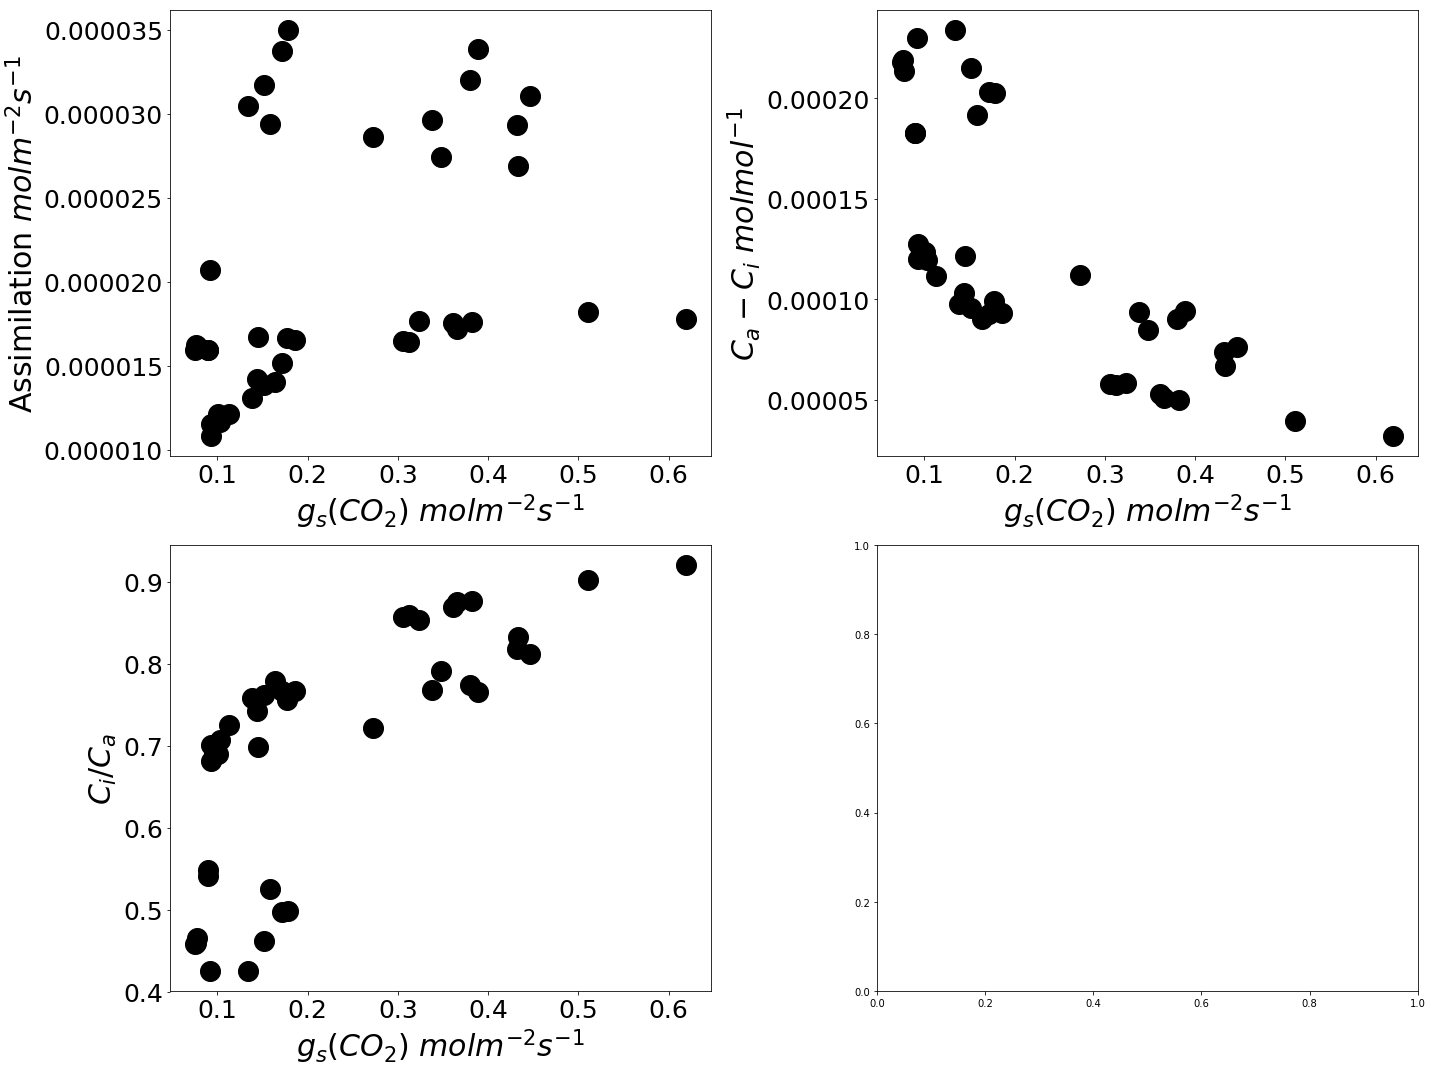

In [47]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=False, figsize=(20,15))
########highlight###

ax1.errorbar(Observed_discrimination["gs(CO2)"],Observed_discrimination["A"],marker="o",markersize=20,color="k",ls="none")
ax1.set_xlabel("$g_s(CO_2)$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax1.set_ylabel("Assimilation"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax1.tick_params(labelsize=25)
ax2.errorbar(Observed_discrimination["gs(CO2)"],C_a_C_i,marker="o",markersize=20,color="k",ls="none")
ax2.set_xlabel("$g_s(CO_2)$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax2.set_ylabel("$C_a-C_i$"+  " $mol mol^{-1}$" ,fontsize=30)
ax2.tick_params(labelsize=25)
ax3.errorbar(Observed_discrimination["gs(CO2)"],Observed_discrimination["Ci/Ca"],marker="o",markersize=20,color="k",ls="none")
ax3.set_xlabel("$g_s(CO_2)$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax3.set_ylabel("$C_i/C_a$" ,fontsize=30)
ax3.tick_params(labelsize=25)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Assimilation.eps")
plt.show()





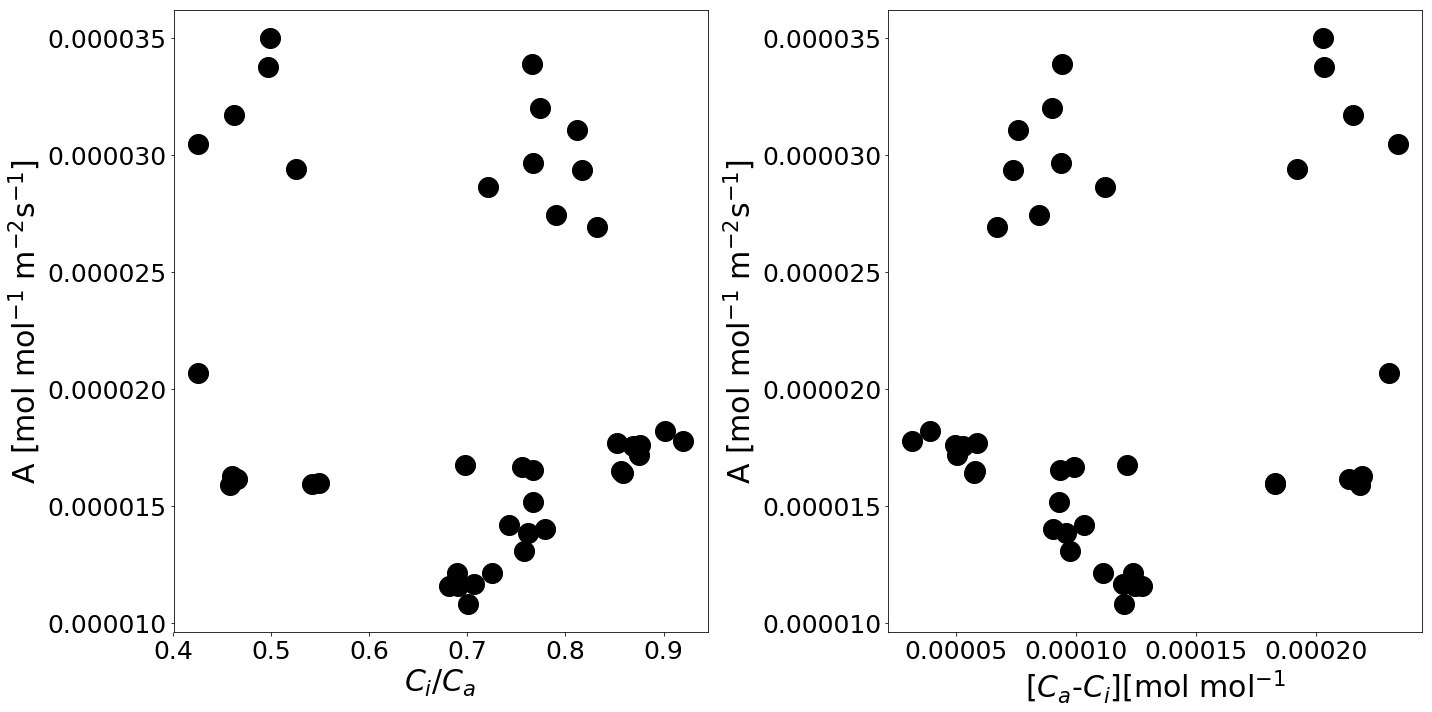

In [48]:
fig,(ax,ax1)=plt.subplots(1,2,figsize=(20,10))
ax.errorbar(Observed_discrimination["Ci/Ca"],Gas_exchange["A"],marker="o",markersize=20,color="k",ls="none")
ax.tick_params(labelsize=25)
ax.set_ylabel("A"+" [$\mathregular{mol}$"+" mol$^{-1}$"+ " m$^{-2}$"+"s$^{-1}$]",fontsize=30)
ax.set_xlabel("$C_i/C_a$",fontsize=30)
ax1.errorbar(C_a_C_i,Gas_exchange["A"],marker="o",markersize=20,color="k",ls="none")
ax1.tick_params(labelsize=25)
ax1.set_ylabel("A"+" [$\mathregular{mol}$"+" mol$^{-1}$"+ " m$^{-2}$"+"s$^{-1}$]",fontsize=30)
ax1.set_xlabel("[$C_a$"+"-"+"$C_i$]"+"[$\mathregular{mol}$"+" mol$^{-1}$",fontsize=30)
fig.tight_layout()
plt.show()



# Section three
## Water isotopic composition of leaf water 

# Isotopic composition of water at the evaporating site 
## $\delta^{18}O_{trans}=\Big(\delta^{18}O_{o}(1-w_{e})-\delta^{18}O_{e}\frac{w_{e}}{w_{o}}(1-w_{o})\Big)\frac{w_{o}}{w_{o}-w_{e}}$, Barbour, 2016
where $\delta^{18}O_{trans}$ is isotopic composition of transpired water vapour,$\delta^{18}O_{o}$ is the isotopic composition of water vapour leaving the cuvette, $\delta^{18}O_{o}$ is the isotopic composition of water vapour enetring the cuvette , $w_e$ and $w_o$ is mole fraction of water vapour enetering and leaving the cuvette
## $\delta^{18}O_e=\delta^{18}_{trans}+\epsilon_{equ}+\epsilon_k+ \frac{w_o}{w_{i}}(\delta^{18}O_o-\epsilon_k+\delta^{18}_{trans})$
where $\epsilon_{equ}$ the equilibrum fractionation during evaporation from liquid to vapour and $\epsilon_k$ is kinetic fractionation during diffusion of vapour from the leaf to the atmosphere, $w_i$ is water vapour mole fraction in the inetercelular airspace 

$\delta^{18}O_e$ is water vapour isotopic composition at the evaporating site, $\epsilon_k$ is kenetic fractionation during diffusion of vapour from the leaf to the atmosphere which is dependent on stomatal and boundary layer conductance. According to Cappa et al 2003, $H_2^{18}O$ diffuces 1.032 times slower than $H_2^{16}O$  through stomata and according to Polhausen analysis, Farquhar et al, 1989, $H_2^{18}O$ diffuces 1.021 times slower than $H_2^{16}O$  through boundary layer. According to Merlivat, 1978 the values are 1.028 and 1.019 for stomatal and boundary layer diffusion, respectively. Recent papers tend to use the values of Merlivat after Luz et al(2003) got a similar value with Merlivat, 1978.Barkan and Luz, 2007 reported a kintetic fractionation during diffusion of vapour through stomata 1.0146$\pm$0.0002 and 1.0283$\pm$0.0003 for $H_2^{17}O$  and $H_2^{18}O$ respectively.This crossponds the ratio $ln(^{17}\alpha_{diff})/ln(^{18}\alpha_{diff})=0.5185\pm 0.0002$
## $\epsilon_{k_{H_2^{18}O}}=\frac{28g_s^{-1}+19g_b^{-1}}{g_s^{-1}+g_b^{-1}}=\frac{28g_b+19g_s}{g_s+g_b}$
## $\epsilon_{k_{H_2^{17}O}}=\frac{14.6g_s^{-1}+9.852g_b^{-1}}{g_s^{-1}+g_b^{-1}}=\frac{14.6g_b+9.852g_s}{g_s+g_b}$
##### $\epsilon_{eq}$ is equilibrum fractionation during evaporation from liquid to vapou and it is temeprature dependent (Bottinga and Craig, 1969)
## $\epsilon_{eq_{H_2^{18}O}}=2.644-3.206\Big(\frac{1000}{T}\Big)+1.534\Big(\frac{1000000}{T^2}\Big)$
## $(\epsilon_{eq_{H_2^{17}O}}+1)=(\epsilon_{eq_{H_2^{18}O}}+1)^{0.529}$ , Barkan and luz, 2007
## $(\epsilon_{eq_{H_2^{17}O}})=(\epsilon_{eq_{H_2^{18}O}}-1)^{0.529}-1$ 

# ${H_2^{18}O}$

In [49]:
Ek=(28*gb_H2O+19*Gas_exchange["gs(H2O)"])/(Gas_exchange["gs(H2O)"]+gb_H2O)
Eeq=2.644-3.206*(1000/(Photo_summary["Temp"]+273.5))+1.534*(1000000/((Photo_summary["Temp"]+273.5)**2))
zetaaa=Photo_summary["w_o"]/(Photo_summary["w_o"]-Photo_summary["w_i"])

In [50]:
Eeq

EXP2         9.370333
EXP3         9.321137
EXP4         9.411593
EXP5         9.378566
EXP6         9.428165
EXP3_NL      9.378566
EXP3_NH      9.272283
EXP1_EL_1    9.378566
EXP2_NH      9.272283
EXP1_NH      9.296667
EXP2_NL      9.395060
EXP1_NL      9.428165
EXP1_ELS     9.419875
EXP2_ELS     9.386808
EXP3_ELS     9.403322
EXP2_EHS     9.304814
EXP3_EHS     9.296667
EXP1_NLM     9.386808
EXP2_NHM     9.272283
EXP3_NHM     9.280402
EXP1_EHM     9.288530
EXP2_EHM     9.264174
EXP1_NLM     9.280402
EXP2_NLM     9.419875
EXP3_NLM     9.419875
EXP1_ELM     9.370333
EXP2_ELM     9.411593
EXP3_ELM     9.411593
EXP1_NLI     9.450349
EXP2_NLI     9.444776
EXP3_NLI     9.453096
EXP1_NHI     9.362109
EXP2_NHI     9.337497
EXP3_NHI     9.312971
EXP1_ELI     9.436466
EXP2_ELI     9.444776
EXP3_ELI     9.444776
EXP1_EHI     9.337497
EXP2_EHI     9.337497
EXP3_EHI     9.329312
EXP4_EHI     9.378566
Name: Temp, dtype: float64

# ${H_2^{17}O}$

In [51]:
#Eeq_17=Eeq^0.529
Ek_17=(14.6*gb_H2O+9.852*Gas_exchange["gs(H2O)"])/(Gas_exchange["gs(H2O)"]+gb_H2O)
Eeq_17=(Eeq/1000+1)**(0.529)-1
humidity=(Photo_summary["w_o"]/1000)/W_i

In [52]:
Eeq_17

EXP2         0.004946
EXP3         0.004920
EXP4         0.004968
EXP5         0.004950
EXP6         0.004976
EXP3_NL      0.004950
EXP3_NH      0.004894
EXP1_EL_1    0.004950
EXP2_NH      0.004894
EXP1_NH      0.004907
EXP2_NL      0.004959
EXP1_NL      0.004976
EXP1_ELS     0.004972
EXP2_ELS     0.004955
EXP3_ELS     0.004963
EXP2_EHS     0.004912
EXP3_EHS     0.004907
EXP1_NLM     0.004955
EXP2_NHM     0.004894
EXP3_NHM     0.004899
EXP1_EHM     0.004903
EXP2_EHM     0.004890
EXP1_NLM     0.004899
EXP2_NLM     0.004972
EXP3_NLM     0.004972
EXP1_ELM     0.004946
EXP2_ELM     0.004968
EXP3_ELM     0.004968
EXP1_NLI     0.004988
EXP2_NLI     0.004985
EXP3_NLI     0.004990
EXP1_NHI     0.004942
EXP2_NHI     0.004929
EXP3_NHI     0.004916
EXP1_ELI     0.004981
EXP2_ELI     0.004985
EXP3_ELI     0.004985
EXP1_EHI     0.004929
EXP2_EHI     0.004929
EXP3_EHI     0.004924
EXP4_EHI     0.004950
Name: Temp, dtype: float64

# Transpiration process 

#### Landais et al, 2006 
#### $\lambda_{trans}=0.522-0.008h$
### where h is relative humidity 

#### $\delta^{17}O=1000[e^{\lambda_{trans}*ln(\frac{\delta^{18}O}{1000}+1)}-1]$

In [53]:
Water_evaporation_site=pd.DataFrame()
## isotopic composition of transpired water vapor
#Water_evaporation_site["d18O_trans"]=zetaaa*(Photo_summary["d18O_ow"]-Photo_summary["d18O_iw"])+Photo_summary["d18O_iw"]
Water_evaporation_site["d18O_trans"]=round(((Photo_summary["d18O_ow"]*(1-(Photo_summary["w_i"]/1000))-Photo_summary["d18O_iw"]*((Photo_summary["w_i"])/(Photo_summary["w_o"])*(1-(Photo_summary["w_o"]/1000)))))*zetaaa,3)
# water isotopic composition at the evaporating site d18O_e
Water_evaporation_site["d18O_e"]=round(Water_evaporation_site["d18O_trans"]+Eeq+Ek+humidity*(Photo_summary["d18O_ow"]-Ek-Water_evaporation_site["d18O_trans"]),3)

In [54]:
Water_evaporation_site["d18O_e"]

EXP2            NaN
EXP3            NaN
EXP4            NaN
EXP5            NaN
EXP6            NaN
EXP3_NL       8.985
EXP3_NH       9.041
EXP1_EL_1     9.864
EXP2_NH      10.770
EXP1_NH      10.210
EXP2_NL       8.955
EXP1_NL      11.434
EXP1_ELS      8.867
EXP2_ELS     10.064
EXP3_ELS      9.039
EXP2_EHS     11.864
EXP3_EHS     11.693
EXP1_NLM     10.057
EXP2_NHM     14.366
EXP3_NHM     12.408
EXP1_EHM     12.622
EXP2_EHM     11.428
EXP1_NLM     15.028
EXP2_NLM      9.796
EXP3_NLM     10.104
EXP1_ELM     10.900
EXP2_ELM     11.060
EXP3_ELM     10.702
EXP1_NLI      4.127
EXP2_NLI      4.793
EXP3_NLI      3.662
EXP1_NHI      7.696
EXP2_NHI      8.665
EXP3_NHI      9.061
EXP1_ELI      4.365
EXP2_ELI      4.359
EXP3_ELI      5.107
EXP1_EHI      7.935
EXP2_EHI      9.016
EXP3_EHI     12.699
EXP4_EHI      7.851
Name: d18O_e, dtype: float64

In [55]:
Ek

EXP2         27.750066
EXP3         27.847987
EXP4         27.826715
EXP5         27.784348
EXP6         27.802381
EXP3_NL      27.903877
EXP3_NH      27.762749
EXP1_EL_1    27.807940
EXP2_NH      27.813571
EXP1_NH      27.763237
EXP2_NL      27.823170
EXP1_NL      27.722218
EXP1_ELS     27.664341
EXP2_ELS     27.831406
EXP3_ELS     27.790447
EXP2_EHS     27.796715
EXP3_EHS     27.813927
EXP1_NLM     27.948896
EXP2_NHM     27.911057
EXP3_NHM     27.924857
EXP1_EHM     27.899952
EXP2_EHM     27.903444
EXP1_NLM     27.914991
EXP2_NLM     27.956084
EXP3_NLM     27.948788
EXP1_ELM     27.957844
EXP2_ELM     27.956452
EXP3_ELM     27.948195
EXP1_NLI     27.947803
EXP2_NLI     27.943564
EXP3_NLI     27.947239
EXP1_NHI     27.919415
EXP2_NHI     27.919109
EXP3_NHI     27.942599
EXP1_ELI     27.946420
EXP2_ELI     27.922488
EXP3_ELI     27.936868
EXP1_EHI     27.914978
EXP2_EHI     27.899515
EXP3_EHI     27.909324
EXP4_EHI     27.897237
dtype: float64

In [56]:
lambda_trans=0.522-0.008*humidity
d17O_H2O_trans=round(1000*(np.exp(lambda_trans*np.log((Water_evaporation_site["d18O_trans"]/1000)+1))-1),3)

In [57]:
d17O_H2O_trans

EXP2           NaN
EXP3           NaN
EXP4           NaN
EXP5           NaN
EXP6           NaN
EXP3_NL     -2.438
EXP3_NH     -2.847
EXP1_EL_1   -1.528
EXP2_NH     -1.819
EXP1_NH     -1.308
EXP2_NL     -2.163
EXP1_NL     -1.307
EXP1_ELS    -2.245
EXP2_ELS    -2.004
EXP3_ELS    -2.205
EXP2_EHS    -1.779
EXP3_EHS    -1.931
EXP1_NLM    -0.979
EXP2_NHM     1.779
EXP3_NHM    -0.642
EXP1_EHM     0.290
EXP2_EHM    -0.933
EXP1_NLM     2.326
EXP2_NLM    -1.393
EXP3_NLM    -0.873
EXP1_ELM    -1.067
EXP2_ELM    -0.503
EXP3_ELM    -0.279
EXP1_NLI    -4.146
EXP2_NLI    -3.331
EXP3_NLI    -4.393
EXP1_NHI    -4.494
EXP2_NHI    -4.558
EXP3_NHI    -4.597
EXP1_ELI    -4.258
EXP2_ELI    -3.062
EXP3_ELI    -2.826
EXP1_EHI    -4.406
EXP2_EHI    -3.646
EXP3_EHI    -0.982
EXP4_EHI    -3.868
dtype: float64

In [59]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('d18O_H2O_trans.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Water_evaporation_site["d18O_trans"].to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## $\delta^{17}O$ of Water at the evaporating site 

In [60]:
lambda_es=0.529
d17O_H2O_es=round(1000*(np.exp(lambda_es*np.log((Water_evaporation_site["d18O_e"]/1000)+1))-1),3)

In [61]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('d17O_H2O_es.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
d17O_H2O_es.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## $^{17}O$-excess of water at the evaporating site 

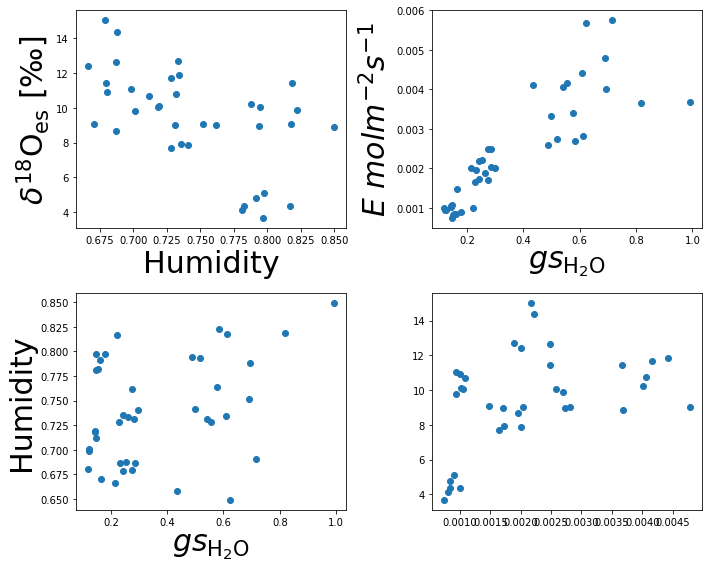

In [62]:
humidity=(Photo_summary["w_o"]/1000)/W_i
fig,((ax,ax1),(ax3,ax4))=plt.subplots(2,2,figsize=(10,8))
ax.plot(humidity,Water_evaporation_site["d18O_e"],marker="o",ls="none")
ax.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax.set_xlabel("Humidity",fontsize=30)
ax1.plot(Gas_exchange["gs(H2O)"],Gas_exchange["E"],marker="o",ls="none")
ax1.set_ylabel("$E$"+  " $mol m^{-2}s^{-1}$",fontsize=30)
ax1.set_xlabel("$gs_{\mathregular{H_{2}O}}$",fontsize=30)
ax3.plot(Gas_exchange["gs(H2O)"],humidity,marker="o",ls="none")
ax3.set_ylabel("Humidity",fontsize=30)
ax3.set_xlabel("$gs_{\mathregular{H_{2}O}}$",fontsize=30)
ax4.plot(Gas_exchange["E"],Water_evaporation_site["d18O_e"],marker="o",ls="none")
fig.tight_layout()
plt.show()

### Relation ship between stomatal conductance for water and ci/ca

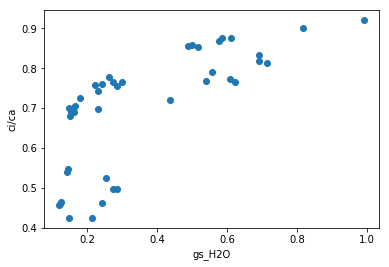

In [63]:
fig,ax=plt.subplots()
ax.plot(Gas_exchange["gs(H2O)"],Observed_discrimination["Ci/Ca"],marker="o",ls="none")
ax.set_ylabel("ci/ca")
ax.set_xlabel("gs_H2O")
plt.show()

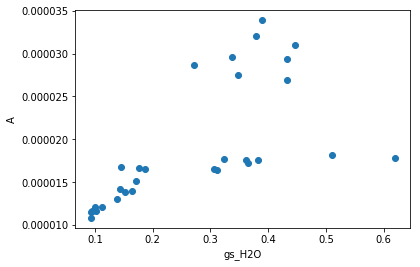

In [64]:
C3_plant=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])]

#######################################
fig,ax=plt.subplots()
ax.plot(C3_plant["gs(CO2)"],C3_plant["A"],marker="o",ls="none")
ax.set_ylabel("A")
ax.set_xlabel("gs_H2O")
plt.show()

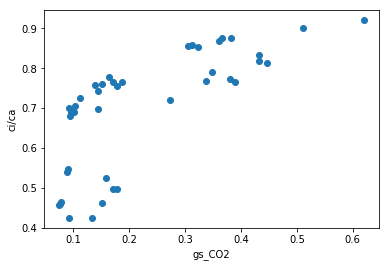

In [65]:
fig,ax=plt.subplots()
ax.plot(Gas_exchange["gs(CO2)"],Observed_discrimination["Ci/Ca"],marker="o",ls="none")
ax.set_ylabel("ci/ca")
ax.set_xlabel("gs_CO2")
plt.show()
#Gas_exchange["gs(CO2)"]

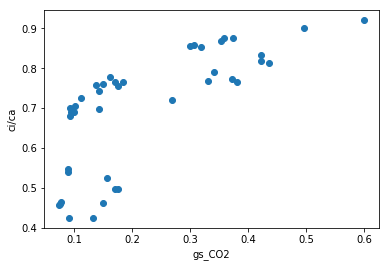

In [66]:
# calculating ci/ca from gtco2, A and E
CI_CA=Gas_exchange["A"] /Gas_exchange["gt(CO2)"]+2*Gas_exchange["A"]/Gas_exchange["E"]+1
fig,ax=plt.subplots()
ax.plot(Gas_exchange["gt(CO2)"],Observed_discrimination["Ci/Ca"],marker="o",ls="none")
ax.set_ylabel("ci/ca")
ax.set_xlabel("gs_CO2")
#ax.plot(Gas_exchange["gt(CO2)"],CI_CA)
plt.show()
#Gas_exchange["gs(CO2)"]

# Farquhar etal (2007)
Transpiration effeciency is the leaf contribution to water use efficiency at the plant, crop or ecosytem lavel.1) vapour pressure of heavy water is less than the light 2) the binary diffusitivity of heavier isotopes is lower than the light once.\\\

As stomata resistance increases, its fractionation tends to dominate and $\epsilon_k$ increases. That is the leaf water should become more enriched as stomata close and as E is reduced. Seondly, stomata closure and reduced transpiration causes heating of the leaf, so that saturated vapour pressure in the intercellular air spaces increases resulting a decrease in the humidity (w_a/w_i). This should also cause an enrichment. \\\

When the source of varation in transpiration rate  is stomatal conductnce, transpiration rate  and $\delta^{18}$O enrichment have negative relationship . This also reasults less enrichment in leaf water compared to at the site of evaporation since mass flow from the xylem of unenriched wter will oppose the back diffusion of enriched water from the site of evaporation.\\

$$P=\frac{vl}{D}$$, where v is velocity, l is distance from the sites and D is diffusivitivity of heavy water in water. Velocity is proportional to transpiration rate. \\


Peclet number (P) is proportional to E , as E increases, average leaf enrichemnet becomes increasingly depleted compared to the isotopic composition at the evaporating site. This repersents one of the reasns as stomata conductance increases leaf water enrichmenet decreases. \\



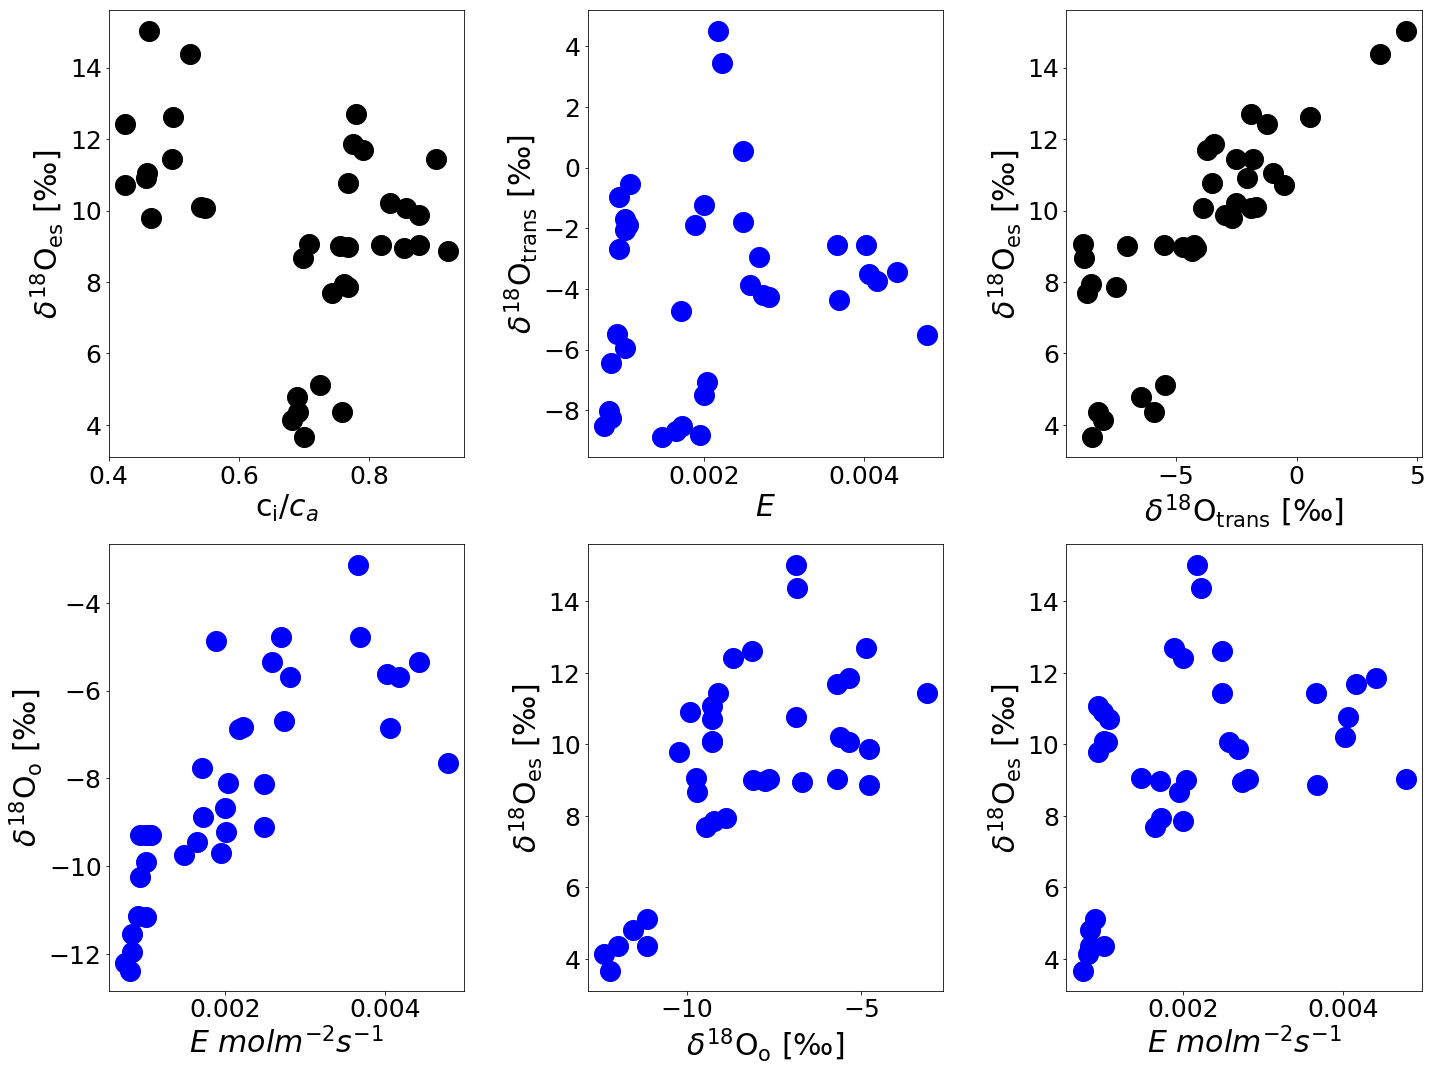

In [67]:
fig,((ax,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(2,3,sharex=False, figsize=(20,15))
#fig,((ax,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(3,3, figsize=(10,20))
ax.errorbar(Observed_discrimination["Ci/Ca"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="k",ls="none")
ax.tick_params(labelsize=25)
ax.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax1.errorbar(Gas_exchange["E"],Water_evaporation_site["d18O_trans"],marker="o",markersize=20,color="b",ls="none")
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{trans}}$ "+u"[\u2030]",fontsize=30)
ax1.set_xlabel("$E$",fontsize=30)
ax2.errorbar(Water_evaporation_site["d18O_trans"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="k",ls="none")
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax2.set_xlabel("$\delta^{18}\mathregular{O_{trans}}$ "+u"[\u2030]",fontsize=30)
ax3.errorbar(Gas_exchange["E"],Photo_summary["d18O_ow"],marker="o",markersize=20,color="b",ls="none")
ax3.tick_params(labelsize=25)
ax3.set_ylabel("$\delta^{18}\mathregular{O_{o}}$ "+u"[\u2030]",fontsize=30)
ax3.set_xlabel("$E$"+  " $mol m^{-2}s^{-1}$",fontsize=30)
ax4.errorbar(Photo_summary["d18O_ow"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="b",ls="none")
ax4.tick_params(labelsize=25)
ax4.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax4.set_xlabel("$\delta^{18}\mathregular{O_{o}}$ "+u"[\u2030]",fontsize=30)
ax5.errorbar(Gas_exchange["E"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="b",ls="none")
ax5.tick_params(labelsize=25)
ax5.set_xlabel("$E$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax5.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
#ax5.set_xlabel(",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Water_isotope_composition_es.eps")
plt.show()

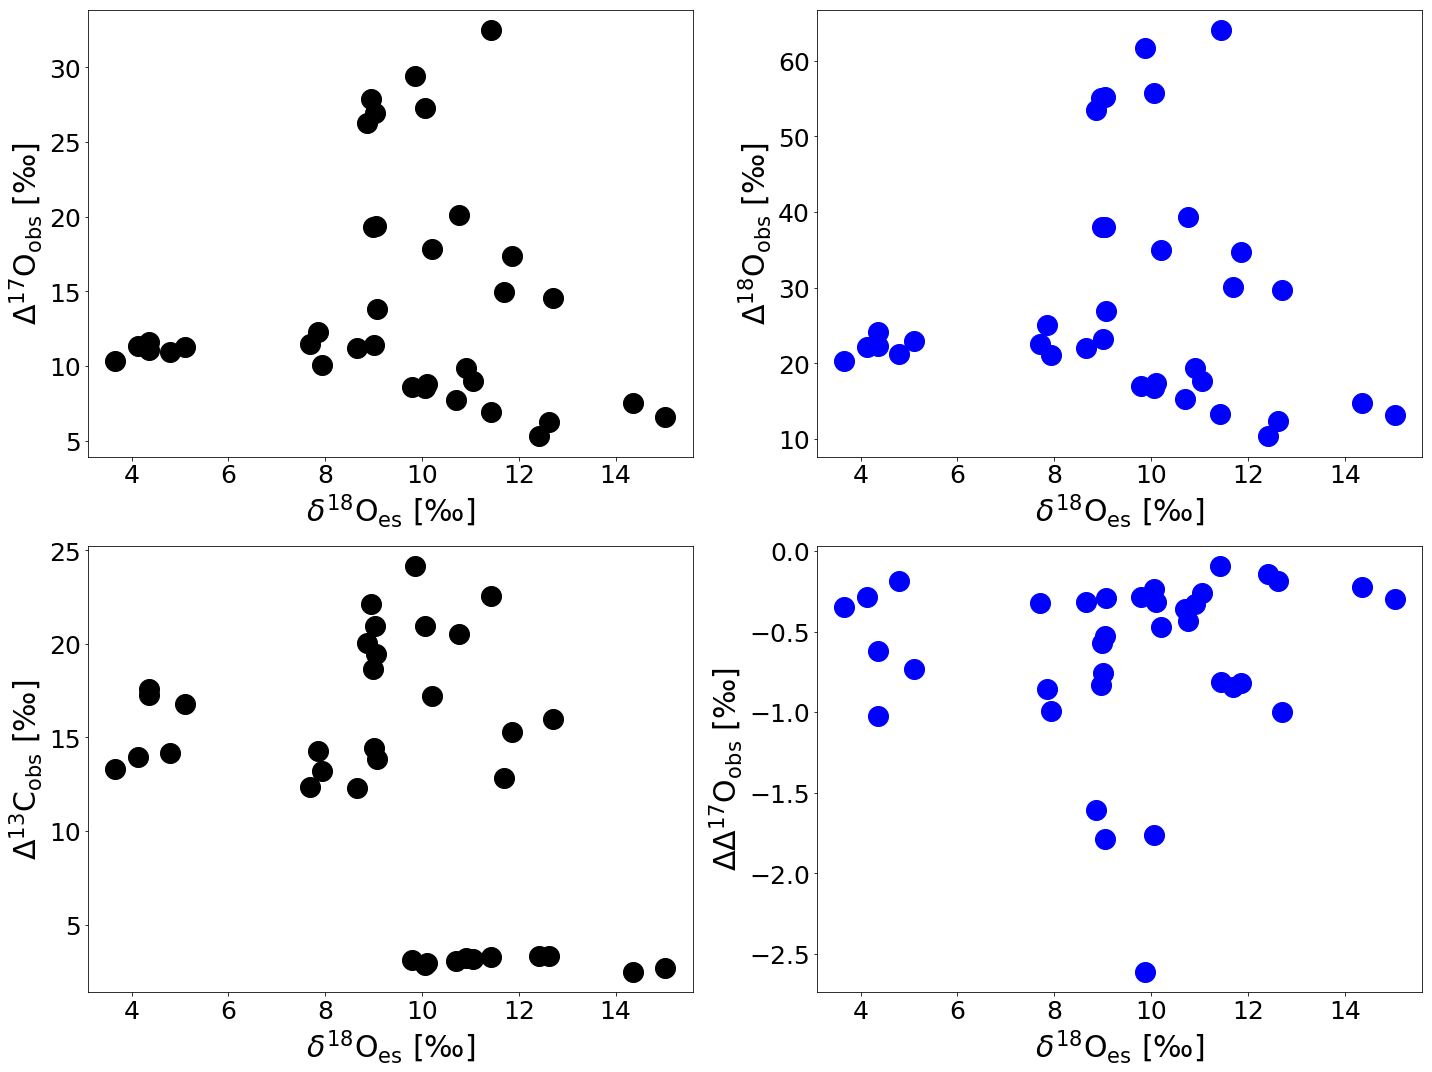

In [68]:
fig,((ax,ax1),(ax2,ax3))=plt.subplots(2,2,sharex=False, figsize=(20,15))
#fig,((ax,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(3,3, figsize=(10,20))
ax.errorbar(Water_evaporation_site["d18O_e"][4:],Observed_discrimination["D17O_obs"][4:],marker="o",markersize=20,color="k",ls="none")
ax.tick_params(labelsize=25)
ax.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
ax.set_xlabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax1.errorbar(Water_evaporation_site["d18O_e"][4:],Observed_discrimination["D18O_obs"][4:],marker="o",markersize=20,color="b",ls="none")
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
ax1.set_xlabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax2.errorbar(Water_evaporation_site["d18O_e"][4:],Observed_discrimination["D13C_obs"][4:],marker="o",markersize=20,color="k",ls="none")
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax2.set_xlabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax3.errorbar(Water_evaporation_site["d18O_e"],Observed_discrimination["DDD17O_obs"],marker="o",markersize=20,color="b",ls="none")
ax3.tick_params(labelsize=25)
ax3.set_ylabel("$\Delta\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.set_xlabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
# ax4.errorbar(Photo_summary["d18O_ow"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="b",ls="none")
# ax4.tick_params(labelsize=25)
# ax4.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
# ax4.set_xlabel("$\delta^{18}\mathregular{O_{o}}$ "+u"[\u2030]",fontsize=30)
# ax5.errorbar(Gas_exchange["E"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="b",ls="none")
# ax5.tick_params(labelsize=25)
# ax5.set_xlabel("$E$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
# ax5.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
# #ax5.set_xlabel(",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_VS_es.eps")
plt.show()

# Isotopic composition of bulk leaf water and water at the evaporating site 
The difference in the isotopic composition of bulk leaf water and water at the evaporating site depends on the transpiration rate. According to Gillon and Yakir,2000, at steady state the isotopic composition of bulk leaf water and water the evaportating site has only small difference. The isotopic composition of water at the evaporating site will be significantly higher relative to the bulk leaf water when the transpiration rate is higher which prevents the back diffusion of the heavy iostopes away from the evaporating site to the bulk leaf water. 

# Section four 

# Mesophyly conductance calculation 

#### $g_m$ is the difference between the obsrved isotope discrimination ($\Delta^{13}\mathrm{C_{obs}}$) and the calculated isotope discrimination assuming infinite $g_m$ (i.e no resistnace). Farquhar and Cernusak, 2012
($\Delta^{13}\mathrm{C_i}$)

## $\Delta^{13}C_{i}=\frac{1}{1-t}\Big[a_b\frac{c_a-c_s}{c_a}+a_s\frac{c_s-c_i}{c_a}\Big]+\frac{1+t}{1-t}\Big[b\frac{c_i}{c_a}-\frac{\alpha_b}{\alpha_{e}}e\frac{R_d}{A+R_d}\frac{c_i-\Gamma^*}{c_a}-\frac{\alpha_b}{\alpha_f}f\frac{\Gamma^*}{c_a}\Big]$


## $\Delta^{13}C_{obs}=\frac{1}{1+t}\Big[a_b\frac{C_a-C_s}{C_a}+a_s\frac{C_s-C_i}{C_a}\Big]+\frac{1+t}{1-t}\Big[a_m\frac{C_i-C_c}{C_a}+b\frac{C_c}{C_a}-\frac{\alpha_b}{\alpha_{e}}e\frac{R_d}{A+R_d}\frac{C_c-\Gamma^*}{C_a}-\frac{\alpha_b}{\alpha_f}f\frac{\Gamma^*}{C_a}\Big]$
Take the difference of the two equations 
## $\Delta^{13}C_{obs}=\Delta^{13}C_{i}-\frac{1+t}{1-t}[-a_m\frac{c_i-c_c}{c_a}+b\frac{c_i-c_c}{c_a}-\frac{\alpha_b}{\alpha_e}e\frac{R_d}{A+R_d}\frac{c_i-c_c}{c_a}]$
## $C_c=C_i-\frac{Ar_m}{P}$
substitute $C_i-C_c$ with $\frac{Ar_m}{P}$
## $\Delta^{13}C_{obs}=\Delta^{13}C_{i}-\frac{1+t}{1-t}\frac{Ar_m}{pc_a}[-a_m+b-\frac{\alpha_b}{\alpha_e}e\frac{R_d}{A+R_d}]$
Rearange the equation for $r_m$
## $r_m=\frac{1-t}{1+t}(\Delta^{13}C_i-\Delta^{13}C_{obs} )\frac{pc_a}{A(b-a_m-\frac{\alpha_b}{\alpha_{e}}e\frac{R_d}{A+R_d})}$

## $t=\frac{\alpha_{ac}E}{2g_{ac}}$
where $\alpha_{ac}$ is the fractionation for the isotopologues of $CO_2$ diffusing in air 
## $\alpha_{ac}=1+\overline a$
where :
## $\overline a=\frac{\alpha_b(c_a-c_s)+\alpha_s(c_s-c_i)}{c_a-c_i}$
## $\Delta^{13}C_{gm}=\frac{1}{r_m}$
## $C_c=C_i-\frac{A}{\Delta^{13}C_{gm}}$

# Oxygen isotope composition of $CO_2$
The isotopic composition of $CO_2$ being assimilated is calculated as:
## $\delta^{18}O_A=\frac{\delta^{18}O_o-\Delta^{18}O_{obs}}{1+\Delta^{18}O_{obs}}$

Assuming $CO_2$ is in full equilibrum with water in cytosolic water, Cernusak et al, 2004, the isotopic composition of $CO_2$ inside the leaf is calculated as 
## $\delta^{18}O_{ce}=\delta^{18}O_e+ \epsilon_w$
Where $\delta^{18}O_e$ is the isotopic composition of water at the evaporating site and $\epsilon_w$ is the isotopic equilibration between $CO_2$ and $H_2O$ which is calculated as:

## $\epsilon_w=\frac{17604}{T}-17.93$ , Brenninkmeijer et al., 1983
where $T$ is temperature in K.
If The cytosolic $CO_2$ is not be fully equilbrated with cytosolic water, the isotopic composition of $CO_2$ in cytosol is given as : 
## $\delta^{18}O_{co}=\delta^{18}O_o-\overline \alpha_{18}\Big(1-\frac{C_c}{C_a}\Big)$
Where $\alpha_{18}$ is the weighted fractionation of $\delta^{18}$O of $CO_2$ accross boundary layer,stomata,cell wall and plasma membrane and is given as:
## $\overline \alpha_{18}=\frac{(C_i-C_c)\alpha_{18w}+(C_s-C_i)\alpha_{18}+(C_a-C_s)\alpha_{18b}}{C_a-C_c}$
Where $\alpha_{18w}$ is the summed discrimination against $\delta^{18}$O during liquid diffusion and dissolution (0.8$\permil$, $\alpha_{18}$ and $\alpha_{18b}$ are discrimination of $\delta^{18}$O during diffusion through the stomata and the boundary layer (8.8$\permil$ and 5.4$\permil$), respectively. 

The Oxygen isotopic comnposition of $CO_2$ in the cytosol($\delta^{18}O_c$)is:
## $\delta^{18}O_c=\theta\delta^{18}O_{ce}+(1-\theta)\delta^{18}O_{co}) $ , Cernusak et al, 2004
The oxygen isotopic composition of $CO_2$ in the intercellular air spaces, ignoring ternary correction:

## $\delta^{18}O_{io}=\delta^{18}O_{A}(1-\frac{C_a}{C_i})(1+\alpha_{18a})\frac{C_a}{C_i}(\delta^{18}O_{out}-\alpha_{18a})+\alpha_{18a}$ , Farquhar and Cernusak, 2012
where $\alpha_{18a}$ is the summed $\delta^{18}O$ discrimination during diffusion through stomata and boundary layer. Including ternary corrcetion, it can be expressed as:

## $\delta^{18}O_{i}=\frac{\delta^{18}O_{io}+t[\delta^{18}O_{A}(\frac{C_a}{C_i}+1)-\delta^{18}O_{a}\frac{C_a}{C_i}]}{1+t}$, Farquhar and Cernusak, 2012
The CO2 partial pressure at the site of CO2-H2O exchange ($c_{CH}$)may be calculated from the oxygen isotope composition of $CO_2$ in the intercellular airspaces ($\delta^{18}O_i$ and the oxygen isotopic composition of $CO_2$ at the site of $CO_2-H_2O$ exchange ($\delta^{18}O_c$) by:
## $c_{CH}=c_i(\frac{\delta^{18}O_i-\alpha_{18w}-\delta^{18}O_{A}(1+\alpha_{18w})}{\delta^{18}O_c-\alpha_{18w}-\delta^{18}O_{A}(1+\alpha_{18w})})$ Barbour, 2016
## $g_m(\Delta^{18}O)=\frac{A}{c_i-c_{CH}}$


# Parameters for $\Delta^{13}C$

In [69]:
a_s=4.4# fractionation during diffusion through stomata 
a_b=2.9# fractionation during diffusion through boundary layer
b=29 ## carbon isotope fractionation during carboxylation in C3 plants, Farquhar et al, 1989
f=16## fractionation during photorespiration (decarboxylation), Lanigan et al 2008
## from barbour et al,2007
p=(Photo_summary["CO2_o"]-Photo_summary["CO2_i"])/Photo_summary["CO2_o"]# Bickford et al, 2009
d13C_res=(Photo_summary["d13C_out"]-Photo_summary["d13C_in"]*(1-p))/p ## Bickford et al., 2009 # isotopic composition of respired CO2
## Barbour et al. (2007)

eRd=-0.8 ## dark respiration, average value (measured) ([0 to -5􏰀],Farquhar and Cernusak, 2012)
d13C_substrate=1000*((Photo_summary["d13C_out"]-Observed_discrimination["D13C_obs"])/(Observed_discrimination["D13C_obs"]+1000))
el=Photo_summary["d13C_out"]-Observed_discrimination["D13C_obs"]-d13C_substrate ## Bickford et al.,2009
####Winget et al,2007
## for R.communis
#e=eRd+el##fractionation during day respiration (decarboxylation)[0 to -5􏰀],Farquhar and Cernusak, 2012
el_2=Photo_summary["d13C_out"]-Observed_discrimination["D13C_obs"]-d13C_res
e=eRd+el # Winget et al,2007 
alpha_b= 1+b/1000#fractionation factor for C3 carboxylation (1+b)
alpha_e=1+e/1000##fractionation factor for day respiration (decarboxylation) with respect to net assimilation

alpha_f=1+f/1000##αf fractionation factor for photorespiration (decarboxylation) with respect to net assimilation
#the chloroplastic CO2 partial pressure at which rates of Rubisco carboxylation equal rates
#of CO2 loss from photorespiration
#tawu=(42.7+1.68*(Photo_summary["Temp"]-25)+0.0012*((Photo_summary["Temp"]-25)**2)) ##CO2 photo-compensation point (mol mol-1),
## temperature in degree centigrade (Brooks and Farquhar, 1985)
tawu=45 #tawu=45 Bernacchi et al, 2002 micro mol m-2s-1
c_s=(Photo_summary["CO2_o"]/1000000)-(Gas_exchange["A"]/gb_CO2)## mol mol-1
a_m=1.8#d13C fractionation across rm including dissolution (entering to water) (0.7􏰀)and diffusion in liquid (1.1􏰀)((1.8􏰀),Lisa Winget et al, 2007),Farquhar et al, 1989
g_ac=Gas_exchange["gt(CO2)"]# Conductance for diffusion of CO2 in the air (stomata and boundary layer, total conductance)
## mol m-2 s-1
Rd=1.5 #day respiration rate (micomol m−2s−1)cerunusak et a, 2004
##a_bar is the weighted fractionation for diffusion across boundary layer and stomata
a_bar=(((a_b/1000)*((Photo_summary["CO2_o"]/1000000)-c_s)+(a_s/1000)*(c_s-Gas_exchange["C_i"]))/((Photo_summary["CO2_o"]/1000000)-Gas_exchange["C_i"]))*1000 # permil

alpha_ac=1+(a_bar)/1000
t=(alpha_ac*Gas_exchange["E"])/(2*g_ac)# ternary correction, unit less 


In [70]:
d13C_substrate

EXP2        -23.577795
EXP3        -23.322462
EXP4        -26.878398
EXP5        -26.122731
EXP6        -28.803611
EXP3_NL     -24.762137
EXP3_NH     -25.632398
EXP1_EL_1   -29.909156
EXP2_NH     -26.480900
EXP1_NH     -23.724208
EXP2_NL     -27.497094
EXP1_NL     -27.735835
EXP1_ELS    -18.942134
EXP2_ELS    -19.535149
EXP3_ELS    -19.476226
EXP2_EHS    -15.091299
EXP3_EHS    -13.419863
EXP1_NLM    -12.466719
EXP2_NHM    -12.209744
EXP3_NHM    -12.871383
EXP1_EHM     -5.927203
EXP2_EHM     -5.876783
EXP1_NLM    -12.344004
EXP2_NLM    -12.692412
EXP3_NLM    -12.544233
EXP1_ELM     -5.879961
EXP2_ELM     -5.768851
EXP3_ELM     -5.671526
EXP1_NLI    -21.162064
EXP2_NLI    -21.218378
EXP3_NLI    -20.543930
EXP1_NHI    -19.635599
EXP2_NHI    -19.787651
EXP3_NHI    -21.125920
EXP1_ELI    -17.769249
EXP2_ELI    -17.862162
EXP3_ELI    -17.380931
EXP1_EHI    -14.269232
EXP2_EHI    -15.145362
EXP3_EHI    -16.578343
EXP4_EHI    -15.207817
dtype: float64

In [71]:

t
#tawu1=(42.7+1.68*(Photo_summary["Temp"]-25)+0.0012*((Photo_summary["Temp"]-25)**2))

EXP2         0.006627
EXP3         0.007684
EXP4         0.005430
EXP5         0.007493
EXP6         0.004814
EXP3_NL      0.005062
EXP3_NH      0.005688
EXP1_EL_1    0.003768
EXP2_NH      0.006159
EXP1_NH      0.004772
EXP2_NL      0.004316
EXP1_NL      0.003702
EXP1_ELS     0.003084
EXP2_ELS     0.004310
EXP3_ELS     0.003771
EXP2_EHS     0.005961
EXP3_EHS     0.006133
EXP1_NLM     0.005920
EXP2_NHM     0.007114
EXP3_NHM     0.007558
EXP1_EHM     0.007074
EXP2_EHM     0.007367
EXP1_NLM     0.007271
EXP2_NLM     0.006117
EXP3_NLM     0.005739
EXP1_ELM     0.006793
EXP2_ELM     0.006206
EXP3_ELM     0.005939
EXP1_NLI     0.004376
EXP2_NLI     0.004194
EXP3_NLI     0.004053
EXP1_NHI     0.005812
EXP2_NHI     0.006827
EXP3_NHI     0.007290
EXP1_ELI     0.004404
EXP2_ELI     0.003679
EXP3_ELI     0.004069
EXP1_EHI     0.005751
EXP2_EHI     0.005834
EXP3_EHI     0.005837
EXP4_EHI     0.005463
dtype: float64

In [72]:
d13C_res

EXP2        -23.577804
EXP3        -23.322457
EXP4        -26.878022
EXP5        -26.122314
EXP6        -28.803569
EXP3_NL     -24.762528
EXP3_NH     -25.632068
EXP1_EL_1   -29.909381
EXP2_NH     -26.481022
EXP1_NH     -23.724416
EXP2_NL     -27.496770
EXP1_NL     -27.735953
EXP1_ELS    -18.942569
EXP2_ELS    -19.535431
EXP3_ELS    -19.475897
EXP2_EHS    -15.090978
EXP3_EHS    -13.420300
EXP1_NLM    -12.466477
EXP2_NHM    -12.209917
EXP3_NHM    -12.871206
EXP1_EHM     -5.927000
EXP2_EHM     -5.876800
EXP1_NLM    -12.344000
EXP2_NLM    -12.692602
EXP3_NLM    -12.544333
EXP1_ELM     -5.879723
EXP2_ELM     -5.768808
EXP3_ELM     -5.671228
EXP1_NLI    -21.161851
EXP2_NLI    -21.218397
EXP3_NLI    -20.544381
EXP1_NHI    -19.635194
EXP2_NHI    -19.788119
EXP3_NHI    -21.125519
EXP1_ELI    -17.768770
EXP2_ELI    -17.862142
EXP3_ELI    -17.380745
EXP1_EHI    -14.269141
EXP2_EHI    -15.145835
EXP3_EHI    -16.578029
EXP4_EHI    -15.207788
dtype: float64

In [73]:
Mesophyl_coductance=pd.DataFrame()
Mesophyl_coductance["D13_i"]=(1/(1-t))*(a_b*(Photo_summary["CO2_o"]-c_s*1000000)/(Photo_summary["CO2_o"])+ a_s*(c_s*1000000-Gas_exchange["C_i"]*1000000)/(Photo_summary["CO2_o"]))+((1+t)/(1-t))*(b*(Gas_exchange["C_i"]*1000000/Photo_summary["CO2_o"])-(alpha_b/alpha_e)*e*(Rd/(Gas_exchange["A"]*1000000+Rd)*(Gas_exchange["C_i"]*1000000-tawu)/Photo_summary["CO2_o"])-(alpha_b/alpha_f)*f*(tawu/Photo_summary["CO2_o"]))
Mesophyl_coductance["rm"]=((1-t)/(1+t))*(Mesophyl_coductance["D13_i"]-Observed_discrimination["D13C_obs"])*((Photo_summary["CO2_o"])*Photo_summary["Pressu"]*0.01)/(Gas_exchange["A"]*1000000*(b-a_m-(alpha_b/alpha_e)*(Rd/(Gas_exchange["A"]*1000000+Rd)))) ## in bar
# in m2 s mol-1 Pa 
Mesophyl_coductance["D13C_gm"]=1/Mesophyl_coductance["rm"]
Mesophyl_coductance["C_c"]=(Gas_exchange["C_i"]-(Gas_exchange["A"]/Mesophyl_coductance["D13C_gm"]))
Mesophyl_coductance["d17O_trans"]=d17O_H2O_trans
Mesophyl_coductance["d18O_trans"]=Water_evaporation_site["d18O_trans"]
Mesophyl_coductance["d18O_es"]=Water_evaporation_site["d18O_e"]
Mesophyl_coductance["d17O_es"]=d17O_H2O_es



In [74]:
Mesophyl_coductance["C_c"]

EXP2         0.000240
EXP3         0.000234
EXP4         0.000305
EXP5         0.000270
EXP6         0.000326
EXP3_NL      0.000260
EXP3_NH      0.000277
EXP1_EL_1    0.000352
EXP2_NH      0.000291
EXP1_NH      0.000243
EXP2_NL      0.000315
EXP1_NL      0.000324
EXP1_ELS     0.000289
EXP2_ELS     0.000301
EXP3_ELS     0.000300
EXP2_EHS     0.000212
EXP3_EHS     0.000179
EXP1_NLM     0.000020
EXP2_NHM     0.000014
EXP3_NHM     0.000023
EXP1_EHM     0.000027
EXP2_EHM     0.000026
EXP1_NLM     0.000015
EXP2_NLM     0.000022
EXP3_NLM     0.000022
EXP1_ELM     0.000024
EXP2_ELM     0.000022
EXP3_ELM     0.000021
EXP1_NLI     0.000189
EXP2_NLI     0.000192
EXP3_NLI     0.000180
EXP1_NHI     0.000167
EXP2_NHI     0.000165
EXP3_NHI     0.000190
EXP1_ELI     0.000240
EXP2_ELI     0.000247
EXP3_ELI     0.000235
EXP1_EHI     0.000181
EXP2_EHI     0.000200
EXP3_EHI     0.000225
EXP4_EHI     0.000196
Name: C_c, dtype: float64

In [75]:
Mesophyl_coductance["rm"]

EXP2          2.871209
EXP3          1.964689
EXP4          2.727990
EXP5          1.116027
EXP6          1.391507
EXP3_NL       2.966241
EXP3_NH       1.790737
EXP1_EL_1     0.216324
EXP2_NH       0.615425
EXP1_NH       3.322184
EXP2_NL       1.440055
EXP1_NL       2.000401
EXP1_ELS      4.495621
EXP2_ELS      2.749909
EXP3_ELS      2.914441
EXP2_EHS      3.033746
EXP3_EHS      5.154789
EXP1_NLM     12.614309
EXP2_NHM      6.734621
EXP3_NHM      4.909049
EXP1_EHM      4.987807
EXP2_EHM      5.185523
EXP1_NLM      5.343874
EXP2_NLM     10.140147
EXP3_NLM     12.196269
EXP1_ELM     10.071023
EXP2_ELM     10.091404
EXP3_ELM      7.235679
EXP1_NLI      7.270694
EXP2_NLI      6.842279
EXP3_NLI      9.283871
EXP1_NHI      9.227491
EXP2_NHI      6.883799
EXP3_NHI      8.384549
EXP1_ELI      3.313815
EXP2_ELI      4.433074
EXP3_ELI      4.797226
EXP1_EHI      9.055845
EXP2_EHI      6.338802
EXP3_EHI      6.655779
EXP4_EHI      6.691185
Name: rm, dtype: float64

In [76]:

c_s.max()

0.0004082560807449862

# Parameters for $\Delta^{18}O$

In [77]:
a_18s=8.8 # fractionation of C18OO due to diffusion through stomata in per mill 
a_18b=5.8 # fractionation of C18OO due to diffusion through boundary layer in per mill
a_18w=0.8 #summed discrimination againist c18OO during liquid phase diffusion and dissolution in per mill 
#a18w_w is the waited fractionation of c18OO across boundary layer, stomata, cell wall and plasma membrane in series
a18w_w=((Gas_exchange["C_i"]-Mesophyl_coductance["C_c"])*a_18w+(c_s-Gas_exchange["C_i"])*a_18s+(Photo_summary["CO2_o"]/1000000-c_s)*a_18b)/(Photo_summary["CO2_o"]/1000000-Mesophyl_coductance["C_c"]) 
e_w=(17604/(Photo_summary["Temp"]+273.5))-17.93 # isotopic equilibrum between CO2 and water 



In [78]:
# fractionation of C18OO as it diffuses through the boundary layer and stomata in series 
a18_bar=((((Photo_summary["CO2_o"]/1000000)-c_s)*a_18b+(c_s-Gas_exchange["C_i"])*a_18s)/(Photo_summary["CO2_o"]-Gas_exchange["C_i"]))*1000000  # weighted fractionation as  C18OO  diffusion through stomata and the boundary layer in series
alpha_ac_18=1+a18_bar/1000

In [79]:
a18w_w

EXP2         4.454244
EXP3         6.099895
EXP4         5.273806
EXP5         6.468827
EXP6         6.246819
EXP3_NL      6.170665
EXP3_NH      5.430702
EXP1_EL_1    8.205767
EXP2_NH      7.454333
EXP1_NH      4.201586
EXP2_NL      6.347275
EXP1_NL      4.920286
EXP1_ELS     3.062447
EXP2_ELS     5.266888
EXP3_ELS     4.714481
EXP2_EHS     4.625727
EXP3_EHS     3.780382
EXP1_NLM     4.601006
EXP2_NHM     4.725731
EXP3_NHM     5.666575
EXP1_EHM     5.083759
EXP2_EHM     5.083734
EXP1_NLM     5.263650
EXP2_NLM     5.321006
EXP3_NLM     4.672603
EXP1_ELM     5.405265
EXP2_ELM     5.366823
EXP3_ELM     5.640965
EXP1_NLI     5.616028
EXP2_NLI     5.582028
EXP3_NLI     5.148859
EXP1_NHI     4.322357
EXP2_NHI     4.893244
EXP3_NHI     5.192469
EXP1_ELI     6.906003
EXP2_ELI     5.806042
EXP3_ELI     6.044791
EXP1_EHI     4.259722
EXP2_EHI     4.660050
EXP3_EHI     4.726011
EXP4_EHI     4.452953
dtype: float64

# $\delta^{18}O$ of assimilated CO2 

In [141]:
## d18O of assimilated CO2 
Mesophyl_coductance["d18O_ass"]=1000*((Photo_summary["d18O_out"]-Observed_discrimination["D18O_obs"])/(1000+Observed_discrimination["D18O_obs"]))
Mesophyl_coductance["d17O_ass"]=1000*((Photo_summary["d17O_out "]-Observed_discrimination["D17O_obs"])/(1000+Observed_discrimination["D17O_obs"]))

dellta_17O_excess_A=1000*np.log(Mesophyl_coductance["d17O_ass"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["d18O_ass"]/1000+1)

In [142]:
dellta_17O_excess_A

EXP2         0.254328
EXP3         0.256604
EXP4         0.631228
EXP5         1.847682
EXP6         2.368749
EXP3_NL      0.269778
EXP3_NH      0.242605
EXP1_EL_1    2.583775
EXP2_NH      0.164515
EXP1_NH      0.187490
EXP2_NL      0.513877
EXP1_NL      0.513835
EXP1_ELS     1.651314
EXP2_ELS     1.772431
EXP3_ELS     1.790130
EXP2_EHS     0.981008
EXP3_EHS     1.004300
EXP1_NLM    -0.018974
EXP2_NHM    -0.027937
EXP3_NHM    -0.095849
EXP1_EHM     0.464458
EXP2_EHM     0.387312
EXP1_NLM     0.027183
EXP2_NLM     0.022537
EXP3_NLM     0.044788
EXP1_ELM     0.583449
EXP2_ELM     0.523141
EXP3_ELM     0.598270
EXP1_NLI     0.025576
EXP2_NLI    -0.057667
EXP3_NLI     0.068894
EXP1_NHI     0.046379
EXP2_NHI     0.048020
EXP3_NHI     0.035716
EXP1_ELI     0.944406
EXP2_ELI     1.267296
EXP3_ELI     1.037669
EXP1_EHI     1.223147
EXP2_EHI     1.037009
EXP3_EHI     1.250700
EXP4_EHI     1.128684
dtype: float64

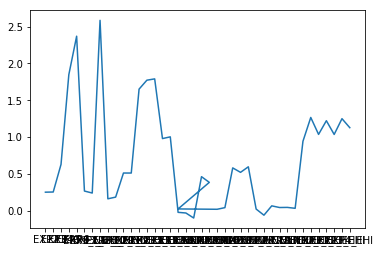

In [143]:
plt.plot(dellta_17O_excess_A)

 # $\delta^{18}O$ of CO2 fully equilibrated with cytosolic water 

In [147]:
### d18O of CO2 fully equilibrated with cytosolic water 
Mesophyl_coductance["d18O_ce"]=Water_evaporation_site["d18O_e"]+ e_w # CO2 in cyctol fully equilibrated with local cyctolic water

In [148]:
Mesophyl_coductance["d18O_ce"]

EXP2               NaN
EXP3               NaN
EXP4               NaN
EXP5               NaN
EXP6               NaN
EXP3_NL      50.668952
EXP3_NH      50.463664
EXP1_EL_1    51.547952
EXP2_NH      52.192664
EXP1_NH      51.692757
EXP2_NL      50.679354
EXP1_NL      53.239324
EXP1_ELS     50.652061
EXP2_ELS     51.768146
EXP3_ELS     50.783576
EXP2_EHS     53.366816
EXP3_EHS     53.175757
EXP1_NLM     51.761146
EXP2_NHM     55.788664
EXP3_NHM     53.850681
EXP1_EHM     54.084713
EXP2_EHM     52.830659
EXP1_NLM     56.470681
EXP2_NLM     51.581061
EXP3_NLM     51.889061
EXP1_ELM     52.563771
EXP2_ELM     52.824812
EXP3_ELM     52.466812
EXP1_NLI     45.986494
EXP2_NLI     46.638891
EXP3_NLI     45.528196
EXP1_NHI     49.339604
EXP2_NHI     50.248185
EXP3_NHI     50.583888
EXP1_ELI     46.190601
EXP2_ELI     46.204891
EXP3_ELI     46.952891
EXP1_EHI     49.518185
EXP2_EHI     50.599185
EXP3_EHI     54.262072
EXP4_EHI     49.534952
Name: d18O_ce, dtype: float64

# $\delta^{18}O$ of CO2 not  equilibrated with cytosolic water

In [149]:
Mesophyl_coductance["d18o_co"]=Photo_summary["d18O_out"]-a18w_w*(1-Mesophyl_coductance["C_c"]/Photo_summary["CO2_o"]/1000000)

# $\delta^{18}O$  of CO2 in the intercellular air spaces ignoring ternarry correction

In [150]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
Mesophyl_coductance["d18o_io"]=Mesophyl_coductance["d18O_ass"]*(1-(Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(alpha_ac_18)+ ((Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(Photo_summary["d18O_out"]-a18_bar)+a18_bar
# The oxygen isotopic composition of CO2 in the intercellular air spaces including ternarry correction
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
#Mesophyl_coductance["d18o_io"]=Mesophyl_coductance["d18O_ass"]*(1-(Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(alpha_ac_18)+ ((Photo_summary["CO2_o"]/(1000000)*Gas_exchange["C_i"]))*(Photo_summary["d18O_out"]-a18_bar)+a18_bar

In [151]:
t_18=alpha_ac_18*Gas_exchange["E"]/(2*g_ac)

In [152]:
Mesophyl_coductance["d18o_io"]

EXP2         46.642028
EXP3         50.212564
EXP4         50.280282
EXP5         52.778365
EXP6         52.094212
EXP3_NL      49.082863
EXP3_NH      45.731188
EXP1_EL_1    52.358666
EXP2_NH      49.127028
EXP1_NH      44.225078
EXP2_NL      50.348019
EXP1_NL      49.924982
EXP1_ELS     42.511337
EXP2_ELS     47.611482
EXP3_ELS     46.251017
EXP2_EHS     44.271639
EXP3_EHS     40.769946
EXP1_NLM     44.530942
EXP2_NHM     43.178541
EXP3_NHM     39.855782
EXP1_EHM     37.870317
EXP2_EHM     39.106494
EXP1_NLM     43.149007
EXP2_NLM     48.262848
EXP3_NLM     45.557656
EXP1_ELM     48.468055
EXP2_ELM     46.209043
EXP3_ELM     44.756548
EXP1_NLI     44.141360
EXP2_NLI     43.397234
EXP3_NLI     42.460760
EXP1_NHI     42.681717
EXP2_NHI     43.555663
EXP3_NHI     46.059556
EXP1_ELI     41.514698
EXP2_ELI     40.305745
EXP3_ELI     40.633020
EXP1_EHI     38.941714
EXP2_EHI     40.382856
EXP3_EHI     42.284241
EXP4_EHI     40.634817
Name: d18o_io, dtype: float64

# $\delta^{18}O$  of CO2 in the intercellular air spaces including ternarry correction

In [153]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
#Mesophyl_coductance["d18o_io"]=Mesophyl_coductance["d18O_ass"]*(1-(Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(alpha_ac_18)+ ((Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(Photo_summary["d18O_out"]-a18_bar)+a18_bar
# The oxygen isotopic composition of CO2 in the intercellular air spaces including ternarry correction
Mesophyl_coductance["d18o_i"]=(Mesophyl_coductance["d18o_io"]+t_18*(Mesophyl_coductance["d18O_ass"]*((Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"]))+1)-Photo_summary["d18O_out"]*((Photo_summary["CO2_o"]/1000000)/Gas_exchange["C_i"])))/(1+t_18)

In [154]:
Mesophyl_coductance["d18o_i"]

EXP2         46.012762
EXP3         49.478027
EXP4         49.568352
EXP5         51.951559
EXP6         51.447520
EXP3_NL      48.587474
EXP3_NH      45.208741
EXP1_EL_1    51.840578
EXP2_NH      48.505535
EXP1_NH      43.826692
EXP2_NL      49.802781
EXP1_NL      49.413430
EXP1_ELS     42.160369
EXP2_ELS     47.064478
EXP3_ELS     45.787223
EXP2_EHS     43.744767
EXP3_EHS     40.307789
EXP1_NLM     44.186551
EXP2_NHM     42.800043
EXP3_NHM     39.534417
EXP1_EHM     37.548791
EXP2_EHM     38.741283
EXP1_NLM     42.770874
EXP2_NLM     47.845686
EXP3_NLM     45.204659
EXP1_ELM     47.928897
EXP2_ELM     45.764255
EXP3_ELM     44.364658
EXP1_NLI     43.860004
EXP2_NLI     43.142167
EXP3_NLI     42.227950
EXP1_NHI     42.332089
EXP2_NHI     43.132080
EXP3_NHI     45.511751
EXP1_ELI     41.233961
EXP2_ELI     40.072995
EXP3_ELI     40.378728
EXP1_EHI     38.626676
EXP2_EHI     40.027586
EXP3_EHI     41.843885
EXP4_EHI     40.280739
Name: d18o_i, dtype: float64

# $\delta^{18}O$ of CO2 at cytosol(d18O_c) given by Cernusak et al., 2004, using degree of equliburum

is the sum of equiliburated and non-equiliburated CO2 

In [155]:
#Mesophyl_coductance["Theta"]=(Mesophyl_coductance["d18o_co"]/Mesophyl_coductance["d18O_ce"])
### Assuming Theta =1
Theta=1
# the isotopic composition of CO2 at cytosol(d18O_c) given by Cernusak et al., 2004
#Mesophyl_coductance["d18O_c"]=Theta*Mesophyl_coductance["d18O_ce"]+(1-Theta)*Mesophyl_coductance["d18o_co"]
Mesophyl_coductance["d18O_c"]=Mesophyl_coductance["d18O_ce"]

## calculating concentartion of CO2 in the mesophyll (for C4 plants) and chlorplast (C3 PLANTS) and mesophyll conductance USING

$\delta^{18}O$

#### assuming Theta=1

In [156]:
#Mesophyl_coductance["c_m"]=Gas_exchange["C_i"]*((Mesophyl_coductance["d18o_i"]-a_18w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000))/(Mesophyl_coductance["d18O_c"]-a_17w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000)))
Mesophyl_coductance["c_m"]=Gas_exchange["C_i"]*((Mesophyl_coductance["d18o_i"]-a_18w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000))/(Mesophyl_coductance["d18O_c"]-a_18w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000)))

In [157]:
Mesophyl_coductance["gm_D18O"]=Gas_exchange["A"]/(Gas_exchange["C_i"]-Mesophyl_coductance["c_m"])

In [158]:
Mesophyl_coductance["c_m"]

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      0.000293
EXP3_NH      0.000295
EXP1_EL_1    0.000358
EXP2_NH      0.000287
EXP1_NH      0.000278
EXP2_NL      0.000335
EXP1_NL      0.000341
EXP1_ELS     0.000320
EXP2_ELS     0.000322
EXP3_ELS     0.000324
EXP2_EHS     0.000253
EXP3_EHS     0.000237
EXP1_NLM     0.000172
EXP2_NHM     0.000137
EXP3_NHM     0.000093
EXP1_EHM     0.000109
EXP2_EHM     0.000121
EXP1_NLM     0.000114
EXP2_NLM     0.000165
EXP3_NLM     0.000174
EXP1_ELM     0.000163
EXP2_ELM     0.000153
EXP3_ELM     0.000132
EXP1_NLI     0.000255
EXP2_NLI     0.000245
EXP3_NLI     0.000250
EXP1_NHI     0.000240
EXP2_NHI     0.000226
EXP3_NHI     0.000253
EXP1_ELI     0.000239
EXP2_ELI     0.000254
EXP3_ELI     0.000241
EXP1_EHI     0.000216
EXP2_EHI     0.000224
EXP3_EHI     0.000238
EXP4_EHI     0.000237
Name: c_m, dtype: float64

# Parameters for $\Delta^{17}O$, note that this is for $\delta^{17}$O

In [159]:
a_17s=4.444 # fractionation of C18OO due to diffusion through stomata in per mill 
a_17b=2.964 # fractionation of C18OO due to diffusion through boundary layer in per mill
a_17w=0.382 #summed discrimination againist c18OO during liquid phase diffusion and dissolution in per mill 
# weighted fractionation as  C17OO  diffusion through stomata and the boundary layer in series
a17_bar=(((Photo_summary["CO2_o"]/1000000)-c_s)*a_17b+(c_s-Gas_exchange["C_i"])*a_17s/(Photo_summary["CO2_o"]-Gas_exchange["C_i"]))*1000000  
alpha_ac_17=1+a17_bar/1000
#a17w_w is the waited fractionation of c17OO across boundary layer, stomata, cell wall and plasma membrane in series
a17w_w=((Gas_exchange["C_i"]-Mesophyl_coductance["C_c"])*a_17w+((Photo_summary["CO2_o"]/1000000)-Gas_exchange["C_i"])*a_17s+(Photo_summary["CO2_o"]/1000000-c_s)*a_17b)/(Photo_summary["CO2_o"]/1000000-Mesophyl_coductance["C_c"]) 

# $\delta^{17}O$ of assimilated CO2

In [160]:
Mesophyl_coductance["d17O_ass"]=1000*((Photo_summary["d17O_out "]-Observed_discrimination["D17O_obs"])/(1000+Observed_discrimination["D17O_obs"]))

In [178]:
Mesophyl_coductance["d17O_Excess_A"]=1000*np.log(Mesophyl_coductance["d17O_ass"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["d18O_ass"]/1000+1)



# $\delta^{17}O$ of of CO2 fully equilibrated with cytosolic water

In [179]:
### d17O of CO2 fully equilibrated with cytosolic water 
lamda_CO2_H2O=0.5229 # Barkan and Luz, 2012, Hofmann,2012
Mesophyl_coductance["d17O_ce"]=1000*(np.exp(lamda_CO2_H2O*(np.log(Mesophyl_coductance["d18O_ce"]/1000+1)))-1)

In [180]:
Mesophyl_coductance["d17O_ce"]
Mesophyl_coductance["D17O_excess_c"]=1000*np.log(Mesophyl_coductance["d17O_ce"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["d18O_ce"]/1000+1)


# $\delta^{17}O$ of CO2 in the intercellular air spaces ignoring ternarry correction

In [181]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
Mesophyl_coductance["d17o_io"]=Mesophyl_coductance["d17O_ass"]*(1-(Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(alpha_ac_17)+ ((Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(Photo_summary["d17O_out "]-a17_bar)+a17_bar

In [182]:
t_17=alpha_ac_17*Gas_exchange["E"]/(2*g_ac)

In [183]:
Mesophyl_coductance["d17o_io"]

EXP2         22.810510
EXP3         23.995441
EXP4         25.391153
EXP5         25.539586
EXP6         26.506423
EXP3_NL      24.479868
EXP3_NH      22.487946
EXP1_EL_1    26.619772
EXP2_NH      23.893964
EXP1_NH      21.909671
EXP2_NL      25.405300
EXP1_NL      25.411576
EXP1_ELS     21.920978
EXP2_ELS     24.221841
EXP3_ELS     23.574573
EXP2_EHS     21.682303
EXP3_EHS     20.188248
EXP1_NLM     20.772381
EXP2_NHM     17.919797
EXP3_NHM     13.931388
EXP1_EHM     14.344253
EXP2_EHM     15.267993
EXP1_NLM     16.119705
EXP2_NLM     21.748824
EXP3_NLM     21.156777
EXP1_ELM     22.337703
EXP2_ELM     21.154484
EXP3_ELM     18.817316
EXP1_NLI     21.866624
EXP2_NLI     21.535648
EXP3_NLI     21.064883
EXP1_NHI     21.175689
EXP2_NHI     21.247768
EXP3_NHI     22.969007
EXP1_ELI     20.995442
EXP2_ELI     20.370801
EXP3_ELI     20.591884
EXP1_EHI     19.632559
EXP2_EHI     20.323158
EXP3_EHI     21.499446
EXP4_EHI     20.511375
Name: d17o_io, dtype: float64

# $\delta^{17}O$  of CO2 in the intercellular air spaces including ternarry correction

In [184]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces including ternarry correction
Mesophyl_coductance["d17o_i"]=(Mesophyl_coductance["d17o_io"]+t_17*(Mesophyl_coductance["d17O_ass"]*((Photo_summary["CO2_o"]/1000000*Gas_exchange["C_i"])+1)-Photo_summary["d17O_out "]*((Photo_summary["CO2_o"]/1000000)/Gas_exchange["C_i"])))/(1+t_17/1000)

# $\delta^{17}O$ of CO2 not  equilibrated with cytosolic water

In [185]:
Mesophyl_coductance["d17o_co"]=Photo_summary["d17O_out "]-a17w_w*(1-Mesophyl_coductance["C_c"]/Photo_summary["CO2_o"]/1000000)

# $\delta^{17}O$ of CO2 at cytosol(d17O_c) given by Cernusak et al., 2004, using degree of equliburum

is the sum of equiliburated and non-equiliburated CO2 

In [186]:
#Mesophyl_coductance["Theta"]=(Mesophyl_coductance["d18o_co"]/Mesophyl_coductance["d18O_ce"])
### Assuming Theta =1
Theta=1
# the isotopic composition of CO2 at cytosol(d18O_c) given by Cernusak et al., 2004
Mesophyl_coductance["d17O_c"]=Theta*Mesophyl_coductance["d17O_ce"]+(1-Theta)*Mesophyl_coductance["d17o_co"]
#Mesophyl_coductance["d18O_c"]=Mesophyl_coductance["d18O_ce"]

## calculating concentartion of CO2 in the mesophyll (for C4 plants) and chlorplast (C3 PLANTS) and mesophyll conductance USING

$\delta^{17}O$

#### assuming Theta=1

In [187]:
Mesophyl_coductance["c_m17"]=Gas_exchange["C_i"]*((Mesophyl_coductance["d17o_i"]-a_17w-Mesophyl_coductance["d17O_ass"]*(1+a_17w/1000))/(Mesophyl_coductance["d17O_c"]-a_17w-Mesophyl_coductance["d17O_ass"]*(1+a_17w/1000)))

In [188]:
Mesophyl_coductance["gm_D17O"]=Gas_exchange["A"]/(Gas_exchange["C_i"]-Mesophyl_coductance["c_m17"])

In [189]:
Mesophyl_coductance["gm_D17O"]

EXP2               NaN
EXP3               NaN
EXP4               NaN
EXP5               NaN
EXP6               NaN
EXP3_NL       0.691540
EXP3_NH       0.614735
EXP1_EL_1    11.748404
EXP2_NH       0.808078
EXP1_NH       0.411742
EXP2_NL       1.826526
EXP1_NL       0.844708
EXP1_ELS      0.355435
EXP2_ELS      0.594973
EXP3_ELS      0.583678
EXP2_EHS      0.450846
EXP3_EHS      0.283763
EXP1_NLM      0.205980
EXP2_NHM      0.236322
EXP3_NHM      0.199945
EXP1_EHM      0.227657
EXP2_EHM      0.246557
EXP1_NLM      0.238250
EXP2_NLM      0.298805
EXP3_NLM      0.226724
EXP1_ELM      0.348148
EXP2_ELM      0.270362
EXP3_ELM      0.261105
EXP1_NLI      0.354213
EXP2_NLI      0.276313
EXP3_NLI      0.235694
EXP1_NHI      0.196839
EXP2_NHI      0.230846
EXP3_NHI      0.257312
EXP1_ELI      0.240712
EXP2_ELI      0.210061
EXP3_ELI      0.194910
EXP1_EHI      0.133113
EXP2_EHI      0.178729
EXP3_EHI      0.158908
EXP4_EHI      0.204454
Name: gm_D17O, dtype: float64

In [190]:
Mesophyl_coductance["D13_OBC"]=(1/(1-t))*(a_b*(Photo_summary["CO2_o"]-c_s*1000000)/(Photo_summary["CO2_o"])+ a_s*(c_s*1000000-Gas_exchange["C_i"]*1000000)/(Photo_summary["CO2_o"]))+((1+t)/(1-t))*(a_m*1000000*(Gas_exchange["C_i"]-Mesophyl_coductance["C_c"])/Photo_summary["CO2_o"]+b*(Mesophyl_coductance["C_c"]*1000000/Photo_summary["CO2_o"])-(alpha_b/alpha_e)*e*(Rd/(Gas_exchange["A"]*1000000+Rd)*(Mesophyl_coductance["C_c"]*1000000-tawu)/Photo_summary["CO2_o"])-(alpha_b/alpha_f)*f*(tawu/Photo_summary["CO2_o"]))






In [191]:
Mesophyl_coductance["D13_OBC"]

EXP2         16.835628
EXP3         16.791403
EXP4         21.035429
EXP5         19.174247
EXP6         22.606241
EXP3_NL      18.600458
EXP3_NH      19.386559
EXP1_EL_1    24.163609
EXP2_NH      20.509728
EXP1_NH      17.140087
EXP2_NL      22.077374
EXP1_NL      22.518377
EXP1_ELS     19.962345
EXP2_ELS     20.862293
EXP3_ELS     20.858942
EXP2_EHS     15.197841
EXP3_EHS     12.708885
EXP1_NLM      2.559797
EXP2_NHM      2.180831
EXP3_NHM      3.088841
EXP1_EHM      3.130461
EXP2_EHM      3.058520
EXP1_NLM      2.418718
EXP2_NLM      2.880413
EXP3_NLM      2.646802
EXP1_ELM      3.021599
EXP2_ELM      2.911559
EXP3_ELM      2.886575
EXP1_NLI     13.799907
EXP2_NLI     14.034080
EXP3_NLI     13.125054
EXP1_NHI     12.155395
EXP2_NHI     12.138914
EXP3_NHI     13.703041
EXP1_ELI     17.200669
EXP2_ELI     17.479349
EXP3_ELI     16.711692
EXP1_EHI     13.023179
EXP2_EHI     14.267557
EXP3_EHI     15.809130
EXP4_EHI     14.106244
Name: D13_OBC, dtype: float64

In [192]:
Mesophyl_coductance

,D13_i,rm,D13C_gm,C_c,d17O_trans,d18O_trans,d18O_es,d17O_es,d18O_ass,d18O_ce,d18o_co,d18o_io,d18o_i,d18O_c,c_m,gm_D18O,d17O_ass,d17O_ce,d17o_io,d17o_i,d17o_co,d17O_c,c_m17,gm_D17O,D13_OBC,D17O_excess_c,d17O_Excess_A
EXP2,22.909839,2.871209,0.348285,0.000240,NaN,NaN,NaN,NaN,-1.088425,NaN,33.530756,46.642028,46.012762,NaN,NaN,NaN,-0.320622,NaN,22.810510,22.648341,17.282352,NaN,NaN,NaN,16.835628,NaN,0.254328
EXP3,20.663599,1.964689,0.508986,0.000234,NaN,NaN,NaN,NaN,2.426915,NaN,31.471105,50.212564,49.478027,NaN,NaN,NaN,1.537644,NaN,23.995441,23.800570,16.241702,NaN,NaN,NaN,16.791403,NaN,0.256604
EXP4,24.071728,2.727990,0.366570,0.000305,NaN,NaN,NaN,NaN,-15.734119,NaN,35.848194,50.280282,49.568352,NaN,NaN,NaN,-7.712542,NaN,25.391153,25.215481,18.473666,NaN,NaN,NaN,21.035429,NaN,0.631228
EXP5,21.772725,1.116027,0.896036,0.000270,NaN,NaN,NaN,NaN,-2.622206,NaN,33.811173,52.778365,51.951559,NaN,NaN,NaN,0.461445,NaN,25.539586,25.335213,17.854418,NaN,NaN,NaN,19.174247,NaN,1.847682
EXP6,24.272939,1.391507,0.718646,0.000326,NaN,NaN,NaN,NaN,-15.522828,NaN,37.096181,52.094212,51.447520,NaN,NaN,NaN,-5.874262,NaN,26.506423,26.352423,19.480319,NaN,NaN,NaN,22.606241,NaN,2.368749
EXP3_NL,21.719186,2.966241,0.337127,0.000260,-2.438,-4.721,8.985,4.743,0.102116,50.668952,31.967335,49.082863,48.587474,50.668952,0.000293,1.188019,0.323745,26.182297,24.479868,24.351766,16.516419,26.182297,0.000283,0.691540,18.600458,-0.252078,0.269778
EXP3_NH,22.986226,1.790737,0.558429,0.000277,-2.847,-5.510,9.041,4.773,-0.403659,50.463664,32.155298,45.731188,45.208741,50.463664,0.000295,0.849944,0.029431,26.077449,22.487946,22.352934,16.590773,26.077449,0.000281,0.614735,19.386559,-0.251081,0.242605
EXP1_EL_1,24.415017,0.216324,4.622699,0.000352,-1.528,-2.962,9.864,5.206,-16.793821,51.547952,35.664233,52.358666,51.840578,51.547952,0.000358,-11.132887,-6.338490,26.631125,26.619772,26.497352,18.685413,26.631125,0.000355,11.748404,24.163609,-0.256343,2.583775
EXP2_NH,21.760249,0.615425,1.624893,0.000291,-1.819,-3.522,10.770,5.683,-1.447086,52.192664,30.371667,49.127028,48.505535,52.192664,0.000287,1.375048,-0.599919,26.960208,23.893964,23.733158,15.700548,26.960208,0.000272,0.808078,20.509728,-0.259469,0.164515
EXP1_NH,23.301664,3.322184,0.301007,0.000243,-1.308,-2.535,10.210,5.388,2.313922,51.692757,33.232414,44.225078,43.826692,51.692757,0.000278,0.500053,1.408822,26.705047,21.909671,21.805498,17.155609,26.705047,0.000267,0.411742,17.140087,-0.257045,0.187490


# Calculating mean cc,cm gm_D18O and gm_D13C

In [193]:
SF=Mesophyl_coductance[:17] 
    #Maize_high=Maize[(Maize['PFD'] >= 500)]
SF1=SF[(SF["gm_D18O"]>=0)]
SF2=SF1[(SF1["gm_D18O"]<3)]
SF3=SF2[(SF2["gm_D18O"]<1)]
MZ=Mesophyl_coductance[17:28]
IV=Mesophyl_coductance[28:]

In [194]:
SF3

,D13_i,rm,D13C_gm,C_c,d17O_trans,d18O_trans,d18O_es,d17O_es,d18O_ass,d18O_ce,d18o_co,d18o_io,d18o_i,d18O_c,c_m,gm_D18O,d17O_ass,d17O_ce,d17o_io,d17o_i,d17o_co,d17O_c,c_m17,gm_D17O,D13_OBC,D17O_excess_c,d17O_Excess_A
EXP3_NH,22.986226,1.790737,0.558429,0.000277,-2.847,-5.510,9.041,4.773,-0.403659,50.463664,32.155298,45.731188,45.208741,50.463664,0.000295,0.849944,0.029431,26.077449,22.487946,22.352934,16.590773,26.077449,0.000281,0.614735,19.386559,-0.251081,0.242605
EXP1_NH,23.301664,3.322184,0.301007,0.000243,-1.308,-2.535,10.210,5.388,2.313922,51.692757,33.232414,44.225078,43.826692,51.692757,0.000278,0.500053,1.408822,26.705047,21.909671,21.805498,17.155609,26.705047,0.000267,0.411742,17.140087,-0.257045,0.187490
EXP1_NL,25.021598,2.000401,0.499900,0.000324,-1.307,-2.535,11.434,6.032,-19.620595,53.239324,38.237714,49.924982,49.413430,53.239324,0.000341,0.950392,-9.899494,27.494256,25.411576,25.283581,19.724409,27.494256,0.000339,0.844708,22.518377,-0.264539,0.513835
EXP1_ELS,25.441563,4.495621,0.222439,0.000289,-2.245,-4.352,8.867,4.681,-14.752281,50.652061,34.927553,42.511337,42.160369,50.652061,0.000320,0.367022,-6.176761,26.173671,21.920978,21.835184,18.358079,26.173671,0.000318,0.355435,19.962345,-0.251996,1.651314
EXP2_ELS,23.946551,2.749909,0.363648,0.000301,-2.004,-3.883,10.064,5.311,-16.211240,51.768146,33.367112,47.611482,47.064478,51.768146,0.000322,0.679186,-6.833786,26.743531,24.221841,24.090639,17.540661,26.743531,0.000319,0.594973,20.862293,-0.257411,1.772431
EXP3_ELS,24.376745,2.914441,0.343119,0.000300,-2.205,-4.274,9.039,4.771,-15.607038,50.783576,33.982519,46.251017,45.787223,50.783576,0.000324,0.657982,-6.494189,26.240836,23.574573,23.462926,17.837695,26.240836,0.000321,0.583678,20.858942,-0.252634,1.790130
EXP2_EHS,21.900120,3.033746,0.329625,0.000212,-1.779,-3.443,11.864,6.259,-0.000966,53.366816,30.096273,44.271639,43.744767,53.366816,0.000253,0.565353,0.980979,27.559290,21.682303,21.546532,15.984515,27.559290,0.000238,0.450846,15.197841,-0.265157,0.981008
EXP3_EHS,22.343537,5.154789,0.193994,0.000179,-1.931,-3.738,11.693,6.169,3.011229,53.175757,29.465618,40.769946,40.307789,53.175757,0.000237,0.328747,2.595202,27.461829,20.188248,20.067524,15.660400,27.461829,0.000223,0.283763,12.708885,-0.264232,1.004300


In [195]:
mSF,sSF=SF3.max(),SF3.min()

In [196]:
mSF,sSF

(D13_i            25.441563
 rm                5.154789
 D13C_gm           0.558429
 C_c               0.000324
 d17O_trans       -1.307000
 d18O_trans       -2.535000
 d18O_es          11.864000
 d17O_es           6.259000
 d18O_ass          3.011229
 d18O_ce          53.366816
 d18o_co          38.237714
 d18o_io          49.924982
 d18o_i           49.413430
 d18O_c           53.366816
 c_m               0.000341
 gm_D18O           0.950392
 d17O_ass          2.595202
 d17O_ce          27.559290
 d17o_io          25.411576
 d17o_i           25.283581
 d17o_co          19.724409
 d17O_c           27.559290
 c_m17             0.000339
 gm_D17O           0.844708
 D13_OBC          22.518377
 D17O_excess_c    -0.251081
 d17O_Excess_A     1.790130
 dtype: float64, D13_i            21.900120
 rm                1.790737
 D13C_gm           0.193994
 C_c               0.000179
 d17O_trans       -2.847000
 d18O_trans       -5.510000
 d18O_es           8.867000
 d17O_es           4.681000
 d18

In [197]:
IV

,D13_i,rm,D13C_gm,C_c,d17O_trans,d18O_trans,d18O_es,d17O_es,d18O_ass,d18O_ce,d18o_co,d18o_io,d18o_i,d18O_c,c_m,gm_D18O,d17O_ass,d17O_ce,d17o_io,d17o_i,d17o_co,d17O_c,c_m17,gm_D17O,D13_OBC,D17O_excess_c,d17O_Excess_A
EXP1_NLI,19.579462,7.270694,0.137538,0.000189,-4.146,-8.023,4.127,2.181,12.463156,45.986494,29.336972,44.141360,43.860004,45.986494,0.000255,0.650892,6.587053,23.788355,21.866624,21.779611,15.199521,23.788355,0.000240,0.354213,13.799907,-0.229298,0.025576
EXP2_NLI,19.762289,6.842279,0.146150,0.000192,-3.331,-6.450,4.793,2.533,13.432755,46.638891,29.370972,43.397234,43.142167,46.638891,0.000245,0.408192,7.012084,24.122205,21.535648,21.455223,15.233810,24.122205,0.000231,0.276313,14.034080,-0.232478,-0.057667
EXP3_NLI,20.034245,9.283871,0.107714,0.000180,-4.393,-8.502,3.662,1.936,14.143325,45.528196,29.622141,42.460760,42.227950,45.528196,0.000250,0.357328,7.512330,23.553773,21.064883,20.991562,15.326870,23.553773,0.000234,0.235694,13.125054,-0.227063,0.068894
EXP1_NHI,21.150995,9.227491,0.108372,0.000167,-4.494,-8.688,7.696,4.064,12.762612,49.339604,31.245643,42.681717,42.332089,49.339604,0.000240,0.242599,6.765180,25.503177,21.175689,21.071388,16.160910,25.503177,0.000226,0.196839,12.155395,-0.245621,0.046379
EXP2_NHI,20.067673,6.883799,0.145269,0.000165,-4.558,-8.806,8.665,4.574,12.849805,50.248185,30.199756,43.555663,43.132080,50.248185,0.000226,0.306704,6.812597,25.967385,21.247768,21.117104,15.626592,25.967385,0.000208,0.230846,12.138914,-0.250035,0.048020
EXP3_NHI,20.355249,8.384549,0.119267,0.000190,-4.597,-8.878,9.061,4.783,8.683078,50.583888,30.664531,46.059556,45.511751,50.583888,0.000253,0.328048,4.611190,26.138853,22.969007,22.811667,15.887800,26.138853,0.000243,0.257312,13.703041,-0.251665,0.035716
EXP1_ELI,19.824606,3.313815,0.301767,0.000240,-4.258,-8.239,4.365,2.307,10.059158,46.190601,25.729997,41.514698,41.233961,46.190601,0.000239,0.296275,6.248547,23.892813,20.995442,20.911831,13.933590,23.892813,0.000230,0.240712,17.200669,-0.230293,0.944406
EXP2_ELI,21.444459,4.433074,0.225577,0.000247,-3.062,-5.932,4.359,2.304,8.832742,46.204891,27.383958,40.305745,40.072995,46.204891,0.000254,0.255908,5.928010,23.900126,20.370801,20.306942,14.690945,23.900126,0.000242,0.210061,17.479349,-0.230363,1.267296
EXP3_ELI,20.667648,4.797226,0.208454,0.000235,-2.826,-5.474,5.107,2.698,9.660759,46.952891,26.738209,40.633020,40.378728,46.952891,0.000241,0.229186,6.132798,24.282851,20.591884,20.518687,14.423681,24.282851,0.000231,0.194910,16.711692,-0.234008,1.037669
EXP1_EHI,21.622989,9.055845,0.110426,0.000181,-4.406,-8.520,7.935,4.190,11.661719,49.518185,28.680278,38.941714,38.626676,49.518185,0.000216,0.153609,7.371949,25.594432,19.632559,19.542850,15.337228,25.594432,0.000202,0.133113,13.023179,-0.246489,1.223147


In [198]:
mIV,sIV=IV.max(),IV.min()

In [199]:
mIV,sIV

(D13_i            22.102781
 rm                9.283871
 D13C_gm           0.301767
 C_c               0.000247
 d17O_trans       -0.982000
 d18O_trans       -1.901000
 d18O_es          12.699000
 d17O_es           6.698000
 d18O_ass         14.143325
 d18O_ce          54.262072
 d18o_co          31.245643
 d18o_io          46.059556
 d18o_i           45.511751
 d18O_c           54.262072
 c_m               0.000255
 gm_D18O           0.650892
 d17O_ass          7.512330
 d17O_ce          28.015858
 d17o_io          22.969007
 d17o_i           22.811667
 d17o_co          16.160910
 d17O_c           28.015858
 c_m17             0.000243
 gm_D17O           0.354213
 D13_OBC          17.479349
 D17O_excess_c    -0.227063
 d17O_Excess_A     1.267296
 dtype: float64, D13_i            19.579462
 rm                3.313815
 D13C_gm           0.107714
 C_c               0.000165
 d17O_trans       -4.597000
 d18O_trans       -8.878000
 d18O_es           3.662000
 d17O_es           1.936000
 d18

In [200]:
mMZ,sMZ=MZ.max(),MZ.min()

In [201]:
mMZ,sMZ

(D13_i            16.290323
 rm               12.614309
 D13C_gm           0.203705
 C_c               0.000027
 d17O_trans        2.326000
 d18O_trans        4.507000
 d18O_es          15.028000
 d17O_es           7.922000
 d18O_ass         21.934821
 d18O_ce          56.470681
 d18o_co          29.366397
 d18o_io          48.468055
 d18o_i           47.928897
 d18O_c           56.470681
 c_m               0.000174
 gm_D18O           0.792388
 d17O_ass         11.425320
 d17O_ce          29.141426
 d17o_io          22.337703
 d17o_i           22.137286
 d17o_co          15.196279
 d17O_c           29.141426
 c_m17             0.000146
 gm_D17O           0.348148
 D13_OBC           3.130461
 D17O_excess_c    -0.256504
 d17O_Excess_A     0.598270
 dtype: float64, D13_i            13.188371
 rm                4.909049
 D13C_gm           0.079275
 C_c               0.000014
 d17O_trans       -1.393000
 d18O_trans       -2.696000
 d18O_es           9.796000
 d17O_es           5.170000
 d18

## cc/ca

In [121]:
C_c_c_a=Mesophyl_coductance["C_c"]/(Photo_summary["CO2_o"]/1000000)

In [122]:
Observed_discrimination["cc_ca"]=C_c_c_a

# cm_17/ca

In [123]:
c_m_c_a17=(Mesophyl_coductance["c_m17"]*1000000)/Photo_summary["CO2_o"]

In [124]:
Observed_discrimination["cm_ca17"]=c_m_c_a17

In [125]:
Observed_discrimination["cm_ca17"]

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      0.711710
EXP3_NH      0.698542
EXP1_EL_1    0.871721
EXP2_NH      0.676090
EXP1_NH      0.668437
EXP2_NL      0.828632
EXP1_NL      0.847663
EXP1_ELS     0.795229
EXP2_ELS     0.788112
EXP3_ELS     0.800546
EXP2_EHS     0.596522
EXP3_EHS     0.551788
EXP1_NLM     0.356636
EXP2_NHM     0.216858
EXP3_NHM     0.050690
EXP1_EHM     0.118132
EXP2_EHM     0.158181
EXP1_NLM     0.128893
EXP2_NLM     0.329933
EXP3_NLM     0.365142
EXP1_ELM     0.343919
EXP2_ELM     0.311280
EXP3_ELM     0.227317
EXP1_NLI     0.600056
EXP2_NLI     0.579605
EXP3_NLI     0.585576
EXP1_NHI     0.563239
EXP2_NHI     0.517624
EXP3_NHI     0.595435
EXP1_ELI     0.571459
EXP2_ELI     0.602617
EXP3_ELI     0.571291
EXP1_EHI     0.503140
EXP2_EHI     0.524892
EXP3_EHI     0.563735
EXP4_EHI     0.564843
Name: cm_ca17, dtype: float64

# cm_18/ca

In [126]:

c_m_c_a18=(Mesophyl_coductance["c_m"]*1000000)/Photo_summary["CO2_o"]

In [127]:
Observed_discrimination["cm_ca18"]=c_m_c_a18

In [128]:
Observed_discrimination["cm_ca18"]

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      0.734735
EXP3_NH      0.731356
EXP1_EL_1    0.879105
EXP2_NH      0.713649
EXP1_NH      0.697336
EXP2_NL      0.841025
EXP1_NL      0.853650
EXP1_ELS     0.799171
EXP2_ELS     0.796599
EXP3_ELS     0.809037
EXP2_EHS     0.632516
EXP3_EHS     0.584457
EXP1_NLM     0.426086
EXP2_NHM     0.338937
EXP3_NHM     0.229460
EXP1_EHM     0.269718
EXP2_EHM     0.300360
EXP1_NLM     0.285377
EXP2_NLM     0.414229
EXP3_NLM     0.437121
EXP1_ELM     0.405025
EXP2_ELM     0.376479
EXP3_ELM     0.330911
EXP1_NLI     0.637158
EXP2_NLI     0.615130
EXP3_NLI     0.624579
EXP1_NHI     0.597059
EXP2_NHI     0.562233
EXP3_NHI     0.619412
EXP1_ELI     0.593833
EXP2_ELI     0.630336
EXP3_ELI     0.594260
EXP1_EHI     0.537611
EXP2_EHI     0.554310
EXP3_EHI     0.581387
EXP4_EHI     0.591158
Name: cm_ca18, dtype: float64

In [129]:
Sunflower=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['M'])]
#######################################
Maize=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['S'])]
########################################
Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])&~Observed_discrimination['Plant'].isin(['S'])]

In [130]:
Sunflower_Normal=Sunflower.loc[~Sunflower["Enrich"].isin(["E"])&~Sunflower["Enrich"].isin(["E1"])&~Sunflower["Enrich"].isin(["E2"])&~Sunflower["Enrich"].isin(["E3"])]
Sunflower_enriched=Sunflower.loc[~Sunflower["Enrich"].isin(["N"])]   
###############
Maize_enriched=Maize.loc[~Maize["Enrich"].isin(["N"])] 
Maize_Normal=Maize.loc[~Maize["Enrich"].isin(["E"])] 
#########################
Ivy_enriched=Ivy.loc[~Ivy["Enrich"].isin(["N"])] 
Ivy_Normal=Ivy.loc[~Ivy["Enrich"].isin(["E2"])] 

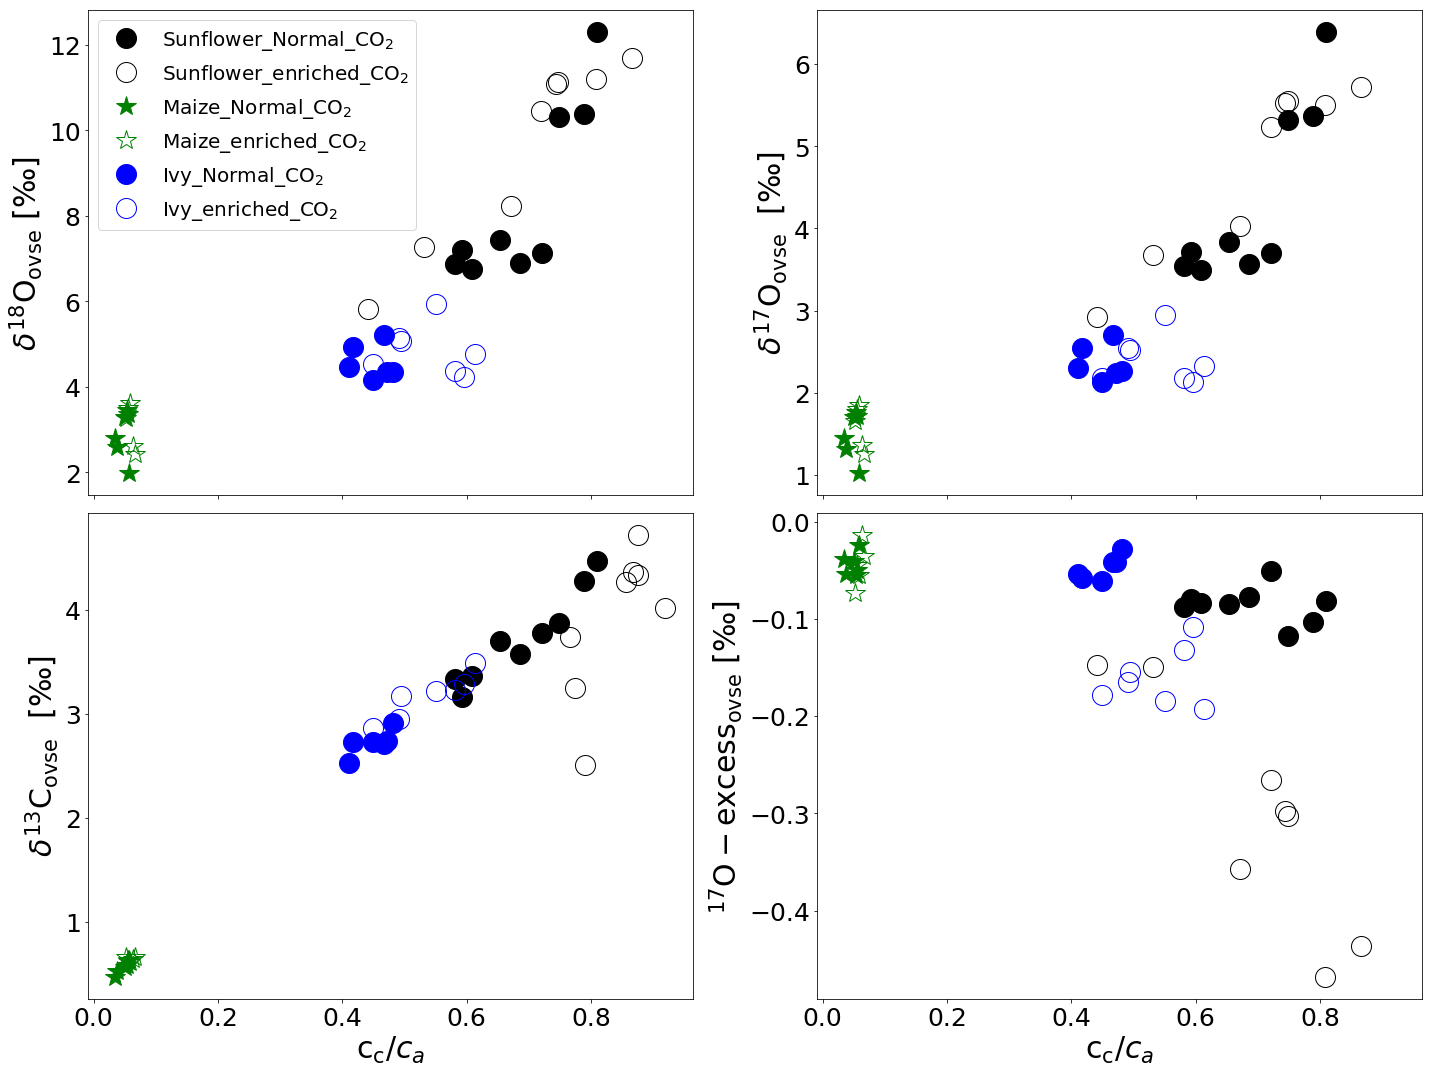

In [131]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight###
ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["Dd18O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["Dd18O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["Dd18O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["Dd18O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["Dd18O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["Dd18O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")



#########################



#/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{ovse}}$ "+u"[\u2030]",fontsize=30)
#####maize####
##################################
ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["Dd17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["Dd17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["Dd17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["Dd17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["Dd17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["Dd17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")






#######Low light Maize
#####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################
#### Low light sunflower
######################


#######################


#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{ovse}}$ "+u" [\u2030]",fontsize=30)
################################################
#################################################

################################################
#################################################


ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["Dd13C"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd13C"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["Dd13C"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["Dd13C"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["Dd13C"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["Dd13C"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")




#######Low light Maize
####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################


#ax3.legend(fontsize=20)

#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{ovse}}$ "+u" [\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################
################################################
#################################################

#####################
######################
##################################
ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["DD17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["DD17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["DD17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["DD17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["DD17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["DD17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")





#######Low light Maize

#########################



######################


ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O-excess_{ovse}}$"+ u" [\u2030]",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference_Only_plant_Cc_ca.eps")
plt.show()







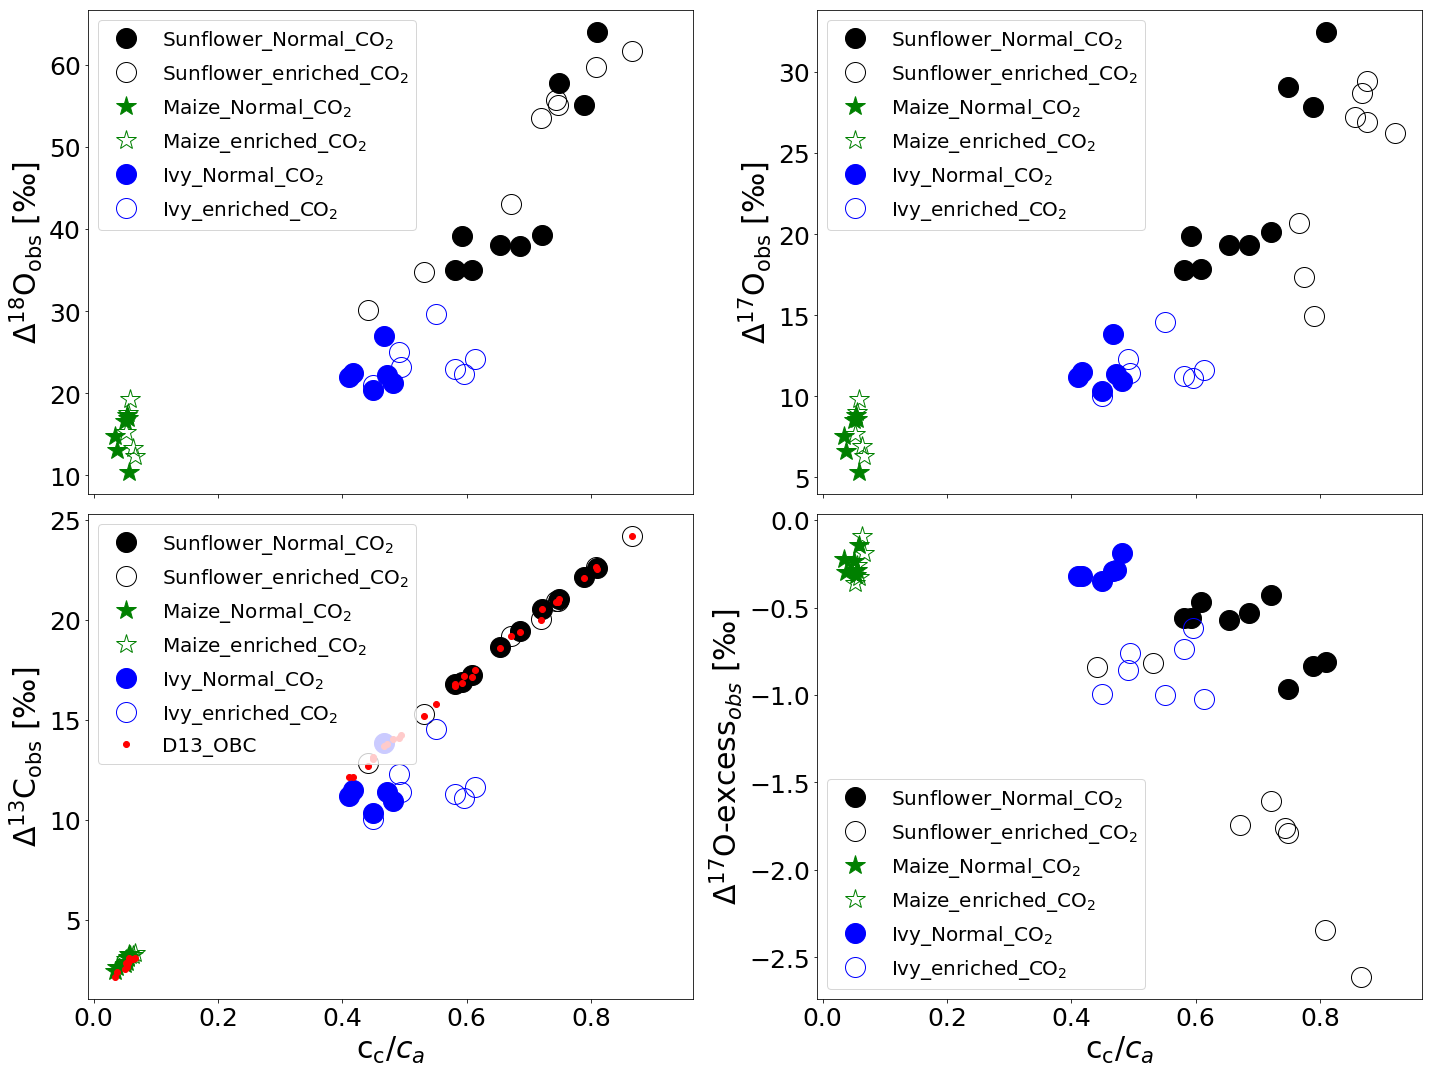

In [132]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_excess"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D17O_excess"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_excess"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_excess"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_excess"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_excess"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")


######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_ccca.eps")
plt.show()






# using the following equation to fit for discrimination in 18O

# $$\Delta^{18}O_{obs}=\frac{\overline{a}+\eta\Delta^{18}O_{ea}}{1-\frac{\eta\Delta^{18}O_{ea}}{1000}}$$

# $$\eta=\frac{c_m}{c_a-c_m}$$

# $$\Delta^{18}_{ea}=1000\frac{\delta^{18}O_{cequ}-\delta^{18}O_o}{1000+\delta^{18}O_o}$$

In [133]:
eta=(1000000*Mesophyl_coductance["c_m"])/(Photo_summary["CO2_o"]-1000000*Mesophyl_coductance["c_m"])
#delta18_ea=1000*(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])/(Photo_summary["d18O_out"]+1000)
delta18_ea=(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])

a18ww_cm=((Gas_exchange["C_i"]-Mesophyl_coductance["c_m"])*a_18w+((Photo_summary["CO2_o"]/1000000)-Gas_exchange["C_i"])*a_18s+(Photo_summary["CO2_o"]/1000000-c_s)*a_18b)/(Photo_summary["CO2_o"]/1000000-Mesophyl_coductance["c_m"]) 
#Delta_obs=(a18ww_cm+eta*delta18_ea)/(1-(eta*delta18_ea/1000))
Delta_obs=(a18ww_cm+eta*delta18_ea)
Mesophyl_coductance["D18_cm"]=Delta_obs


In [134]:
print(1-eta*delta18_ea/1000)

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      0.965292
EXP3_NH      0.964942
EXP1_EL_1    0.944169
EXP2_NH      0.964195
EXP1_NH      0.967148
EXP2_NL      0.949798
EXP1_NL      0.941196
EXP1_ELS     0.949613
EXP2_ELS     0.948562
EXP3_ELS     0.948794
EXP2_EHS     0.967908
EXP3_EHS     0.971969
EXP1_NLM     0.986725
EXP2_NHM     0.988509
EXP3_NHM     0.993648
EXP1_EHM     0.991018
EXP2_EHM     0.990175
EXP1_NLM     0.990691
EXP2_NLM     0.987529
EXP3_NLM     0.986138
EXP1_ELM     0.985300
EXP2_ELM     0.986737
EXP3_ELM     0.989200
EXP1_NLI     0.980625
EXP2_NLI     0.981323
EXP3_NLI     0.982103
EXP1_NHI     0.979594
EXP2_NHI     0.980536
EXP3_NHI     0.976032
EXP1_ELI     0.980183
EXP2_ELI     0.977808
EXP3_ELI     0.979246
EXP1_EHI     0.980725
EXP2_EHI     0.978715
EXP3_EHI     0.972380
EXP4_EHI     0.976910
dtype: float64


In [135]:
print(1/(1-eta*delta18_ea/1000))

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      1.035956
EXP3_NH      1.036332
EXP1_EL_1    1.059133
EXP2_NH      1.037135
EXP1_NH      1.033968
EXP2_NL      1.052855
EXP1_NL      1.062478
EXP1_ELS     1.053060
EXP2_ELS     1.054228
EXP3_ELS     1.053970
EXP2_EHS     1.033156
EXP3_EHS     1.028839
EXP1_NLM     1.013454
EXP2_NHM     1.011625
EXP3_NHM     1.006393
EXP1_EHM     1.009064
EXP2_EHM     1.009922
EXP1_NLM     1.009397
EXP2_NLM     1.012628
EXP3_NLM     1.014057
EXP1_ELM     1.014919
EXP2_ELM     1.013442
EXP3_ELM     1.010918
EXP1_NLI     1.019758
EXP2_NLI     1.019033
EXP3_NLI     1.018223
EXP1_NHI     1.020831
EXP2_NHI     1.019851
EXP3_NHI     1.024557
EXP1_ELI     1.020218
EXP2_ELI     1.022696
EXP3_ELI     1.021194
EXP1_EHI     1.019654
EXP2_EHI     1.021748
EXP3_EHI     1.028405
EXP4_EHI     1.023636
dtype: float64


# Similarly, for $\delta^{17}O$

# $$\Delta^{17}O_{obs}=\frac{\overline{a}+\eta\Delta^{17}O_{ea}}{1-\frac{\eta\Delta^{17}O_{ea}}{1000}}$$

# $$\eta=\frac{c_m}{c_a-c_m}$$

# $$\Delta^{17}_{ea}=1000\frac{\delta^{17}O_{cequ}-\delta^{17}O_o}{1000+\delta^{17}O_o}$$

In [136]:
eta_17=(1000000*Mesophyl_coductance["c_m17"])/(Photo_summary["CO2_o"]-1000000*Mesophyl_coductance["c_m17"])
#delta17_ea=1000*(Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])/(Photo_summary["d17O_out "]+1000)
delta17_ea=(Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])
#a18w_w is the waited fractionation of c18OO across boundary layer, stomata, cell wall and plasma membrane in series
a17ww_cm=((Gas_exchange["C_i"]-Mesophyl_coductance["c_m17"])*a_17w+((Photo_summary["CO2_o"]/1000000)-Gas_exchange["C_i"])*a_17s+(Photo_summary["CO2_o"]/1000000-c_s)*a_17b)/(Photo_summary["CO2_o"]/1000000-Mesophyl_coductance["c_m17"]) 
#Delta17_obs=(a17ww_cm+eta*delta17_ea)/(1-(eta*delta17_ea/1000))
Delta17_obs=(a17ww_cm+eta*delta17_ea)
Mesophyl_coductance["D17_cm"]=Delta17_obs

In [137]:
a17ww_cm

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      3.688813
EXP3_NH      2.884699
EXP1_EL_1    4.380054
EXP2_NH      3.337795
EXP1_NH      2.471462
EXP2_NL      3.909848
EXP1_NL      3.055618
EXP1_ELS     2.001631
EXP2_ELS     3.162279
EXP3_ELS     2.947623
EXP2_EHS     2.685596
EXP3_EHS     2.303588
EXP1_NLM     3.245020
EXP2_NHM     2.861520
EXP3_NHM     2.854089
EXP1_EHM     2.708007
EXP2_EHM     2.825030
EXP1_NLM     2.906934
EXP2_NLM     3.633359
EXP3_NLM     3.327016
EXP1_ELM     3.750049
EXP2_ELM     3.578468
EXP3_ELM     3.415470
EXP1_NLI     3.628742
EXP2_NLI     3.393073
EXP3_NLI     3.331452
EXP1_NHI     2.789343
EXP2_NHI     2.938957
EXP3_NHI     3.338812
EXP1_ELI     3.323819
EXP2_ELI     2.875440
EXP3_ELI     2.999933
EXP1_EHI     2.343035
EXP2_EHI     2.489424
EXP3_EHI     2.450888
EXP4_EHI     2.575846
dtype: float64

# Big Delta

In [138]:
Mesophyl_coductance["DD17_cm"]=1000*np.log(Mesophyl_coductance["D17_cm"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["D18_cm"]/1000+1)

In [139]:
Mesophyl_coductance["DD17_cm"]

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL     -0.477048
EXP3_NH     -0.515138
EXP1_EL_1   -2.218426
EXP2_NH     -0.692945
EXP1_NH     -0.442632
EXP2_NL     -0.249806
EXP1_NL     -0.234843
EXP1_ELS    -1.483623
EXP2_ELS    -1.467702
EXP3_ELS    -1.472243
EXP2_EHS    -1.258592
EXP3_EHS    -1.031181
EXP1_NLM    -0.597762
EXP2_NHM    -0.706380
EXP3_NHM    -0.784425
EXP1_EHM    -0.895644
EXP2_EHM    -0.955834
EXP1_NLM    -0.783525
EXP2_NLM    -0.720636
EXP3_NLM    -0.622785
EXP1_ELM    -0.966889
EXP2_ELM    -0.910570
EXP3_ELM    -0.958745
EXP1_NLI    -0.551962
EXP2_NLI    -0.528797
EXP3_NLI    -0.484274
EXP1_NHI    -0.424530
EXP2_NHI    -0.502498
EXP3_NHI    -0.470810
EXP1_ELI    -1.240724
EXP2_ELI    -1.252743
EXP3_ELI    -1.196013
EXP1_EHI    -0.942316
EXP2_EHI    -1.059651
EXP3_EHI    -1.098495
EXP4_EHI    -1.152573
Name: DD17_cm, dtype: float64

# USing cc/ca 

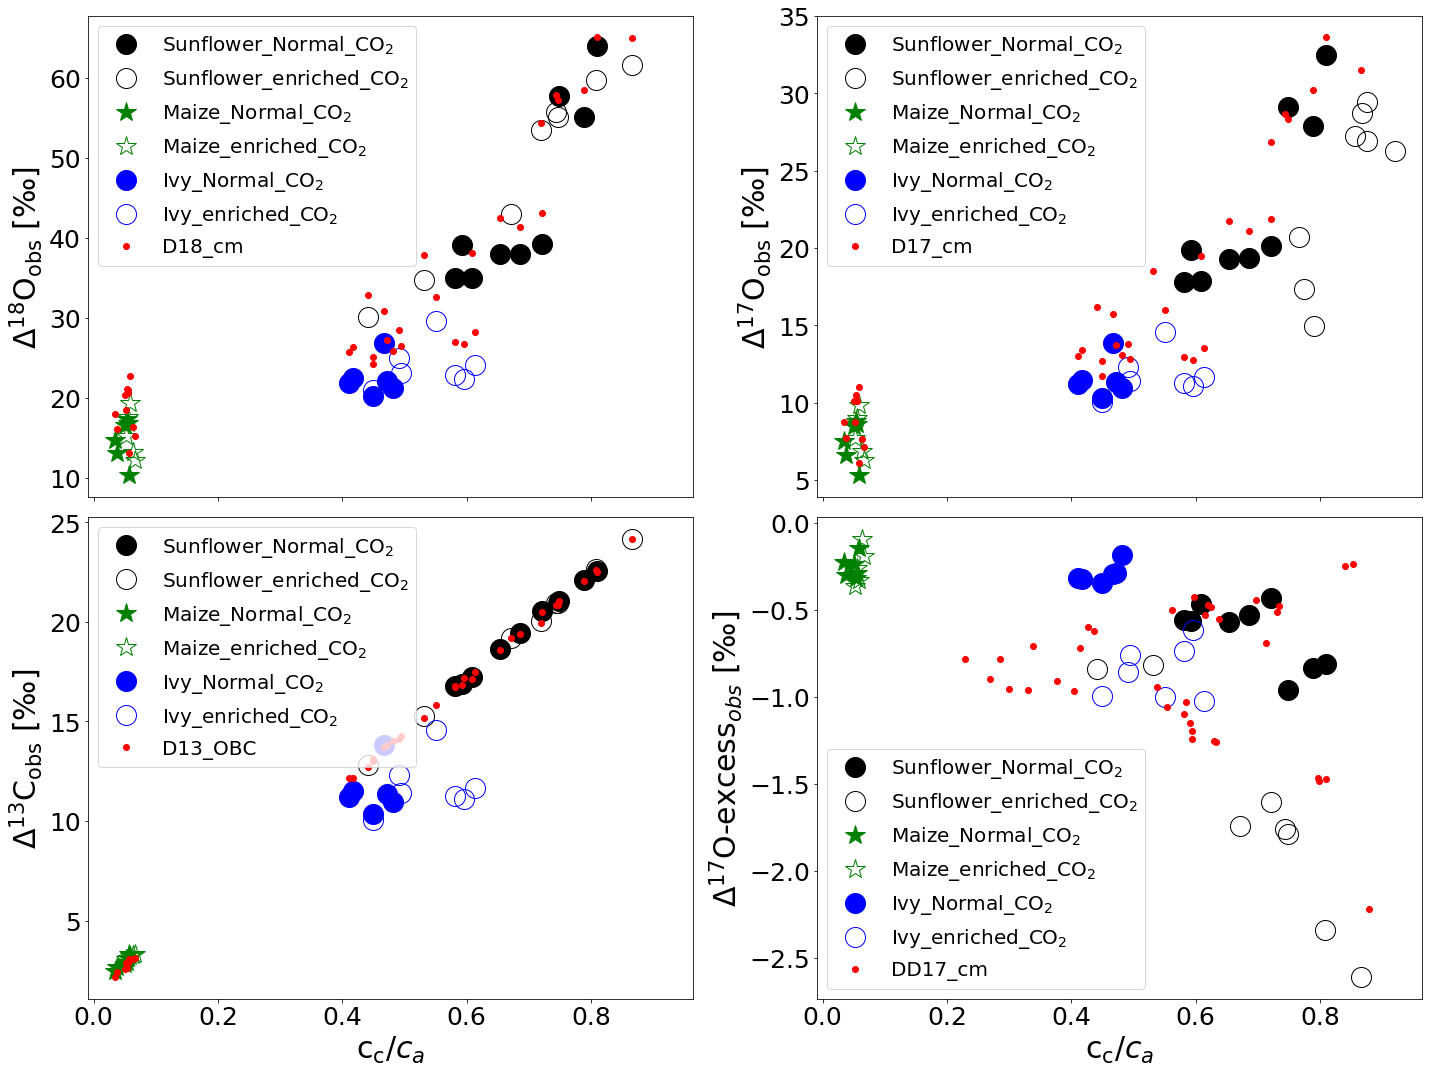

In [140]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
ax2.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_excess"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D17O_excess"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_excess"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_excess"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_excess"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_excess"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_ccca_#1.eps")
plt.show()







# Using cm/ca_18

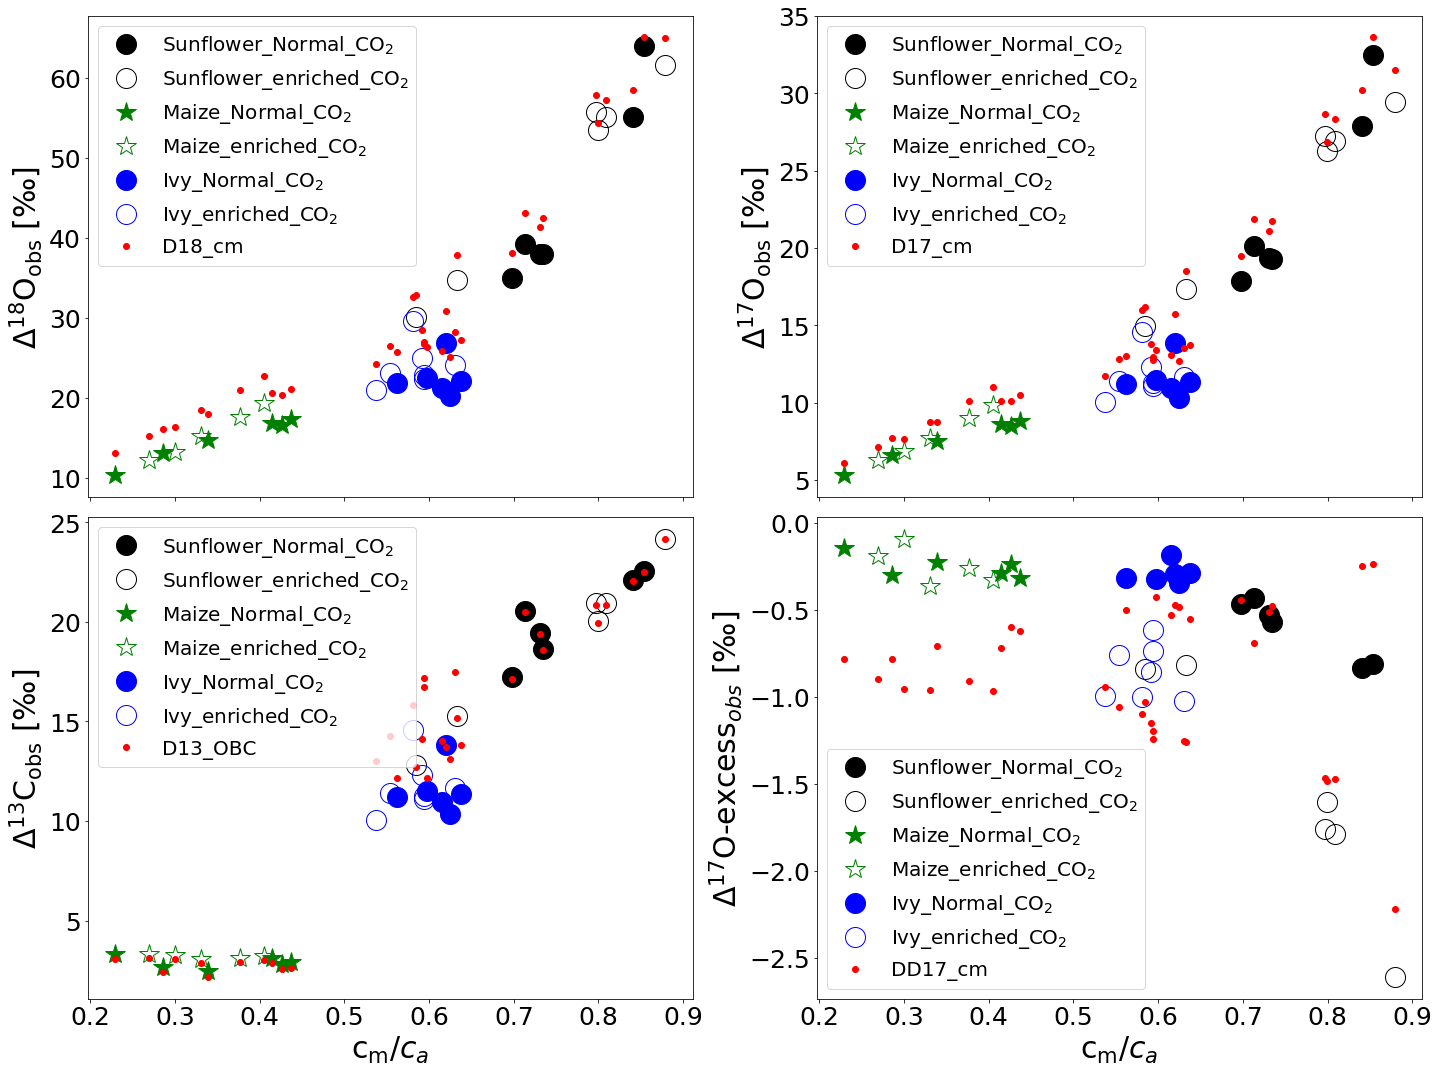

In [141]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
ax2.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_excess"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_excess"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_excess"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_cmca18_#1.eps")
plt.show()








# using cm_17/ca

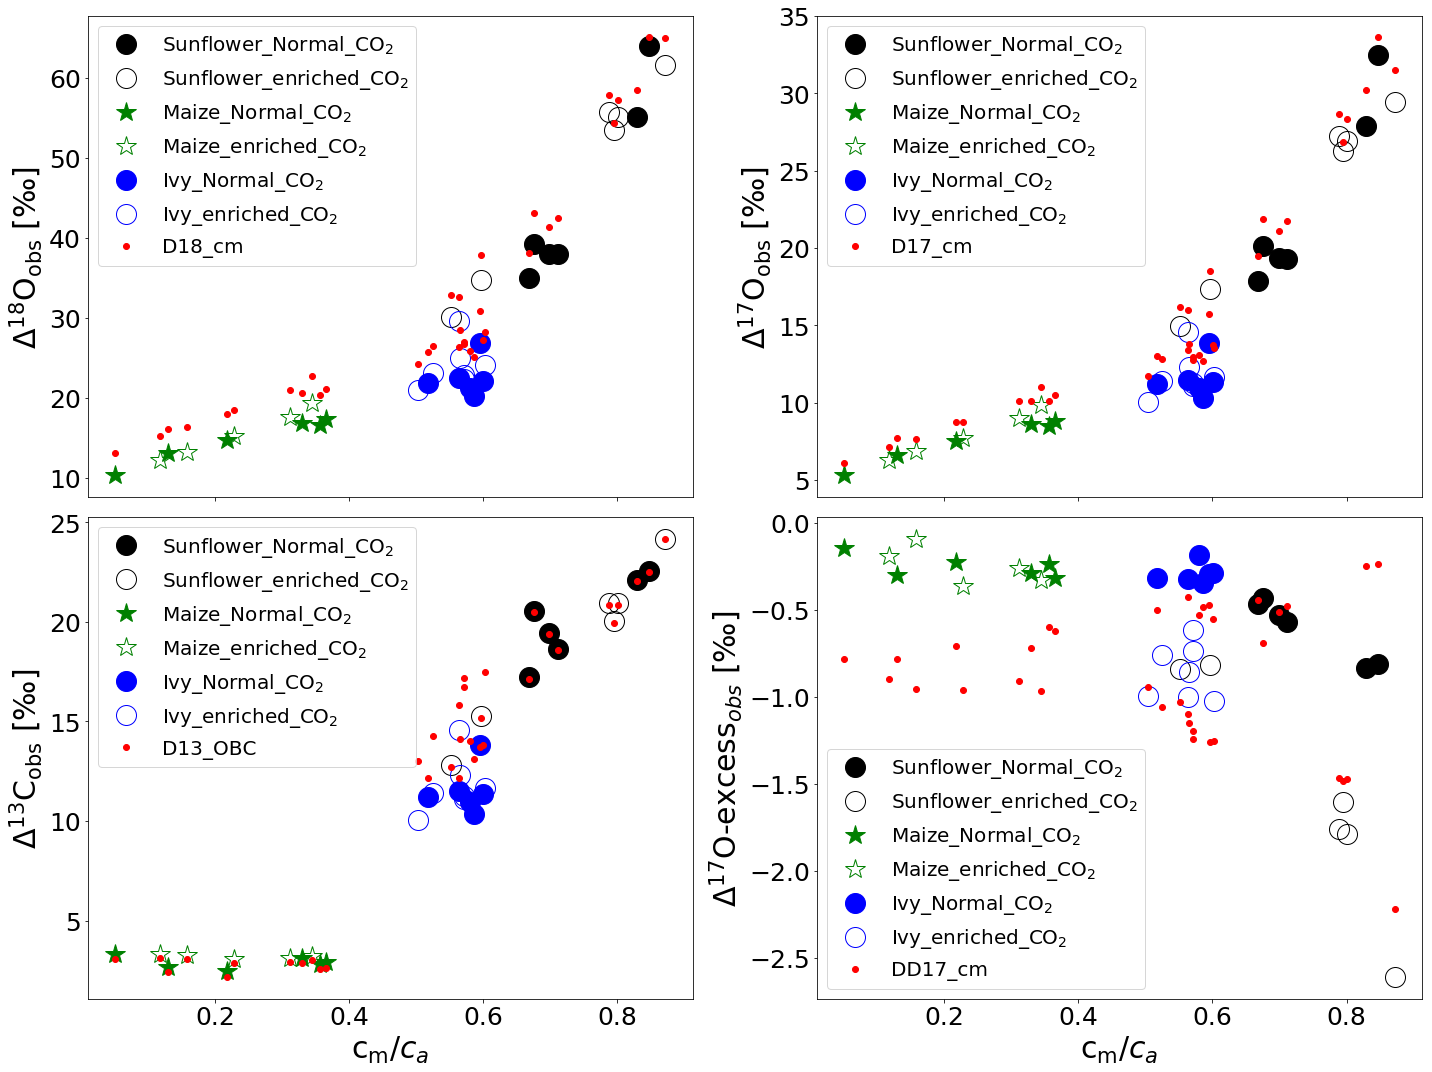

In [142]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D17O_excess"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D17O_excess"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D17O_excess"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D17O_excess"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D17O_excess"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D17O_excess"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_ccca17_#1.eps")
plt.show()









# Calculating degree of equilibrum   
# $$\theta=\frac{\Delta^{18}_{ca}+\frac{a18ww_{cm}}{\frac{c_m}{c_o-c_m}+1}}{\Delta^{18}_{ea}+\frac{a18ww_{cm}}{\frac{c_m}{c_o-c_m}+1}}$$

# $$\Delta^{18}_{ca}=1000\frac{\Delta^{18}_{obs}-a18ww_{cm}}{(1000-\Delta^{18}_{obs})\frac{c_m}{c_o-c_m}}$$

In [143]:
zeta_plus1=eta+1 ## eta cm/(co-cm, see above 
Dca_18=1000*(Observed_discrimination["D18O_obs"]-a18ww_cm)/((1000-Observed_discrimination["D18O_obs"])*eta)

In [144]:
Theta=(Dca_18+(a18ww_cm/zeta_plus1))/(delta18_ea+(a18ww_cm/zeta_plus1))## delta18_ea is for D18_ea, see above

In [145]:
Theta

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      0.916983
EXP3_NH      0.946274
EXP1_EL_1    1.002655
EXP2_NH      0.937883
EXP1_NH      0.944160
EXP2_NL      0.988188
EXP1_NL      1.045227
EXP1_ELS     1.035277
EXP2_ELS     1.012614
EXP3_ELS     1.013325
EXP2_EHS     0.941025
EXP3_EHS     0.935773
EXP1_NLM     0.781709
EXP2_NHM     0.770405
EXP3_NHM     0.651650
EXP1_EHM     0.726740
EXP2_EHM     0.745498
EXP1_NLM     0.737077
EXP2_NLM     0.779474
EXP3_NLM     0.787920
EXP1_ELM     0.820353
EXP2_ELM     0.802226
EXP3_ELM     0.772140
EXP1_NLI     0.807850
EXP2_NLI     0.809236
EXP3_NLI     0.799289
EXP1_NHI     0.856164
EXP2_NHI     0.847988
EXP3_NHI     0.877520
EXP1_ELI     0.831737
EXP2_ELI     0.858580
EXP3_ELI     0.848362
EXP1_EHI     0.870234
EXP2_EHI     0.881228
EXP3_EHI     0.928029
EXP4_EHI     0.889207
dtype: float64

In [146]:
Thata2=Dca_18/delta18_ea

In [147]:
Thata2

EXP2              NaN
EXP3              NaN
EXP4              NaN
EXP5              NaN
EXP6              NaN
EXP3_NL      0.903139
EXP3_NH      0.939179
EXP1_EL_1    1.003038
EXP2_NH      0.928740
EXP1_NH      0.937869
EXP2_NL      0.986547
EXP1_NL      1.049351
EXP1_ELS     1.037544
EXP2_ELS     1.013885
EXP3_ELS     1.014604
EXP2_EHS     0.934306
EXP3_EHS     0.929236
EXP1_NLM     0.731818
EXP2_NHM     0.725812
EXP3_NHM     0.566109
EXP1_EHM     0.674785
EXP2_EHM     0.694233
EXP1_NLM     0.681774
EXP2_NLM     0.719960
EXP3_NLM     0.738821
EXP1_ELM     0.780188
EXP2_ELM     0.758700
EXP3_ELM     0.718389
EXP1_NLI     0.758259
EXP2_NLI     0.763514
EXP3_NLI     0.748769
EXP1_NHI     0.831170
EXP2_NHI     0.820110
EXP3_NHI     0.855395
EXP1_ELI     0.796883
EXP2_ELI     0.834163
EXP3_ELI     0.821235
EXP1_EHI     0.852319
EXP2_EHI     0.865069
EXP3_EHI     0.920384
EXP4_EHI     0.873894
dtype: float64